In [1]:
### Importing all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC

In [2]:
%cd data

C:\Users\kpp919509\data


In [3]:
df = pd.read_csv('BANKRUPTCY_PREDICTION.csv')

In [4]:
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

In [5]:
# Checking shape
df.shape

(6819, 95)

In [6]:
# Checking is there any null value present
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Net Val

In [7]:
df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

In [8]:
## CHecking the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

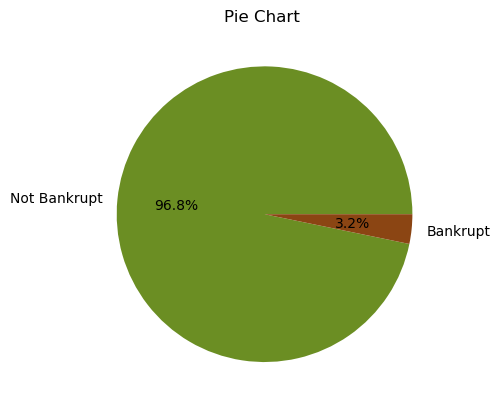

In [9]:
## Checking the dependent variable distribution by plotting pie chart
dep_variable=df['Bankrupt'].value_counts(normalize=True)*100
plt.pie(dep_variable,autopct='%1.1f%%',labels=['Not Bankrupt','Bankrupt'] ,colors=['olivedrab', 'saddlebrown'])
plt.title('Pie Chart ')
plt.show()

In [10]:
df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

 ROA(C) before interest and depreciation before interest


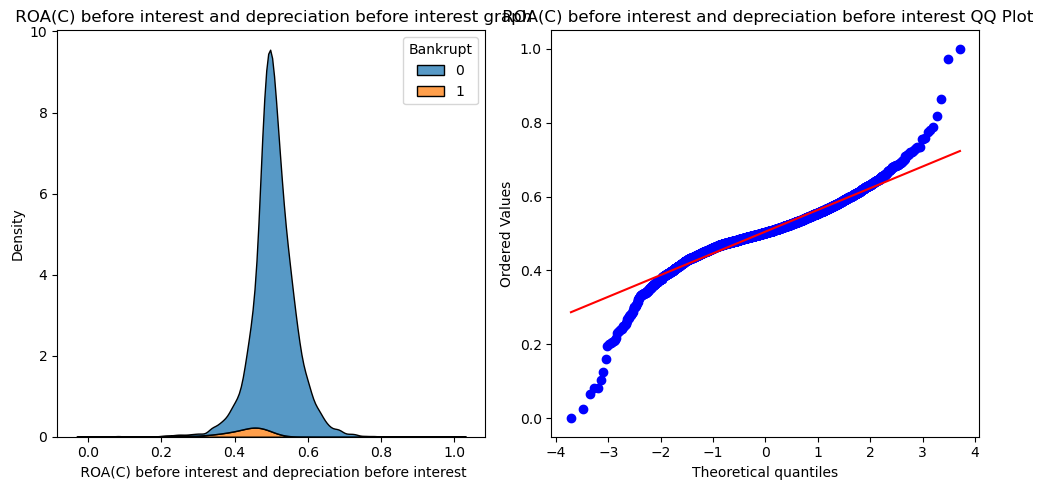

 ROA(A) before interest and % after tax


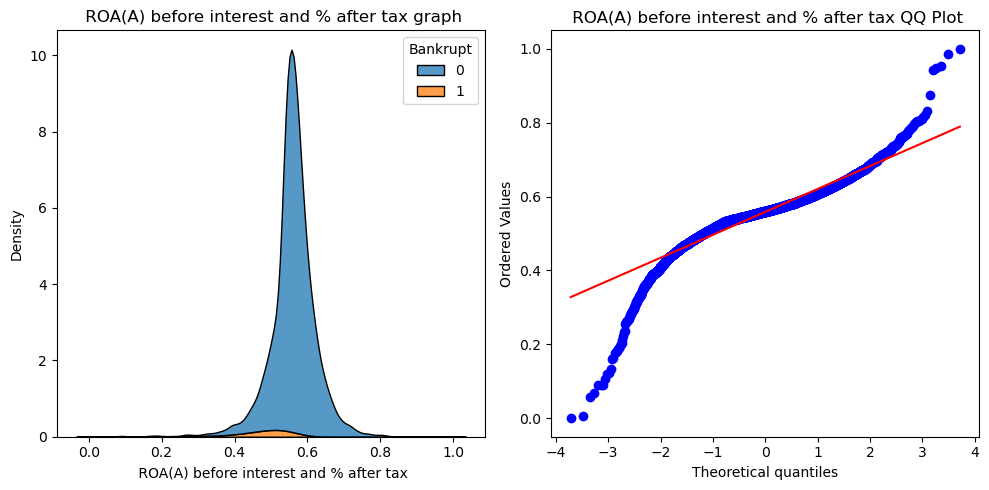

 ROA(B) before interest and depreciation after tax


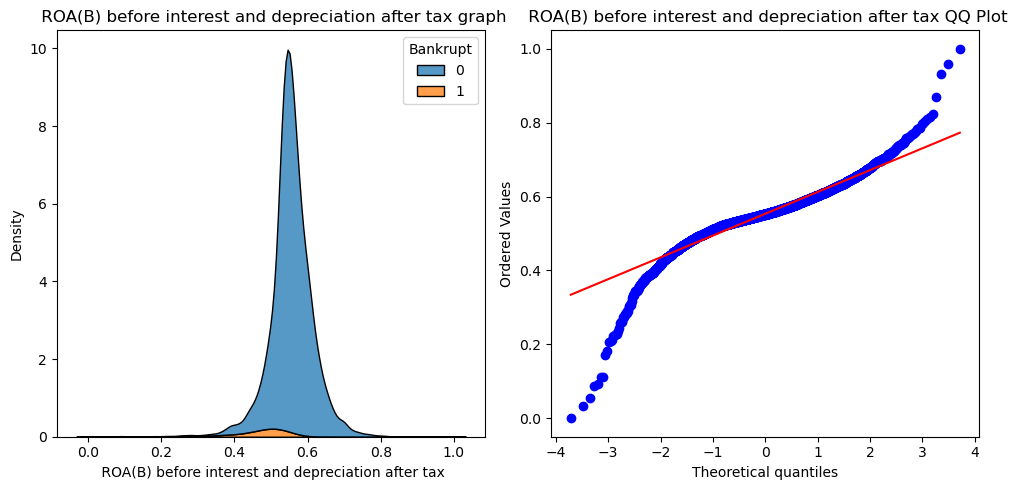

 Operating Gross Margin


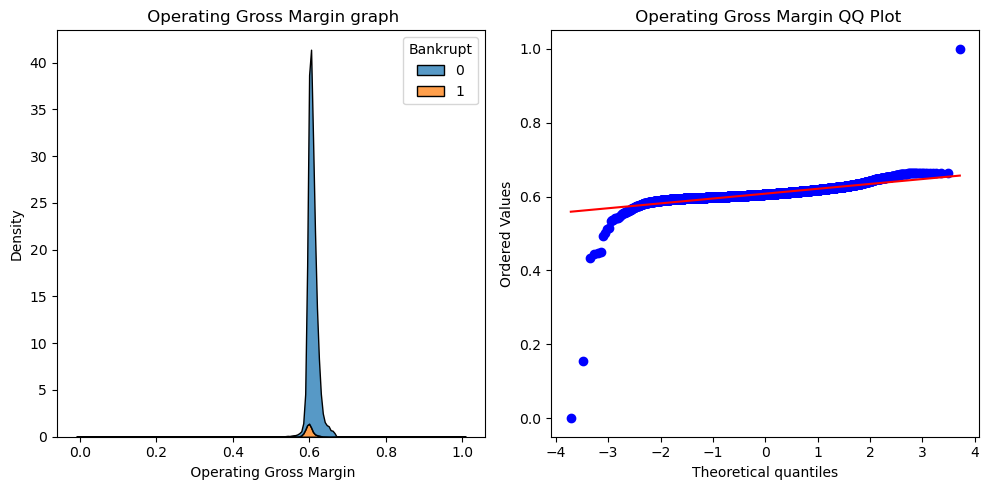

 Realized Sales Gross Margin


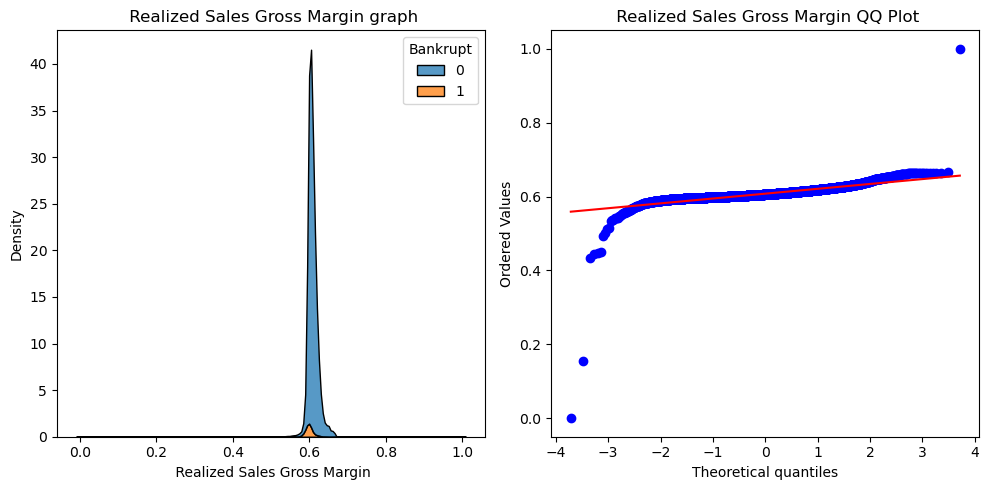

 Operating Profit Rate


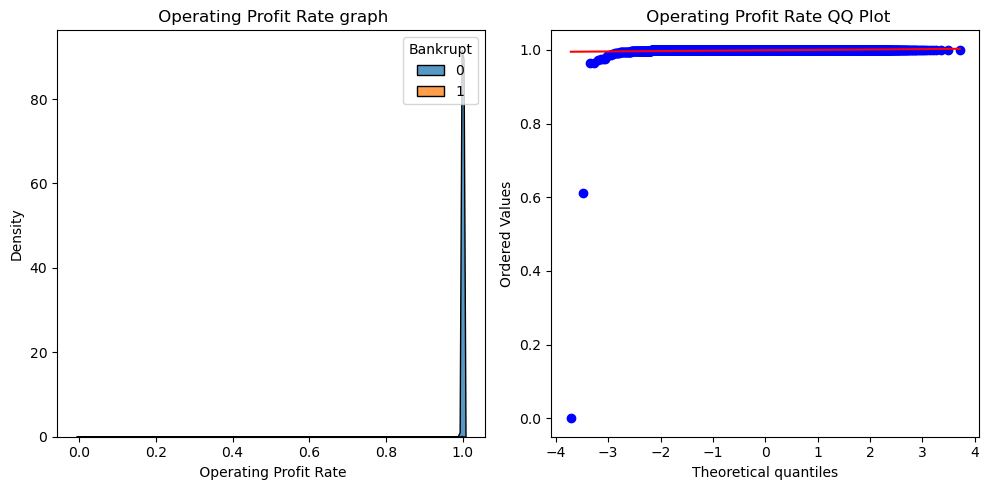

 Pre-tax net Interest Rate


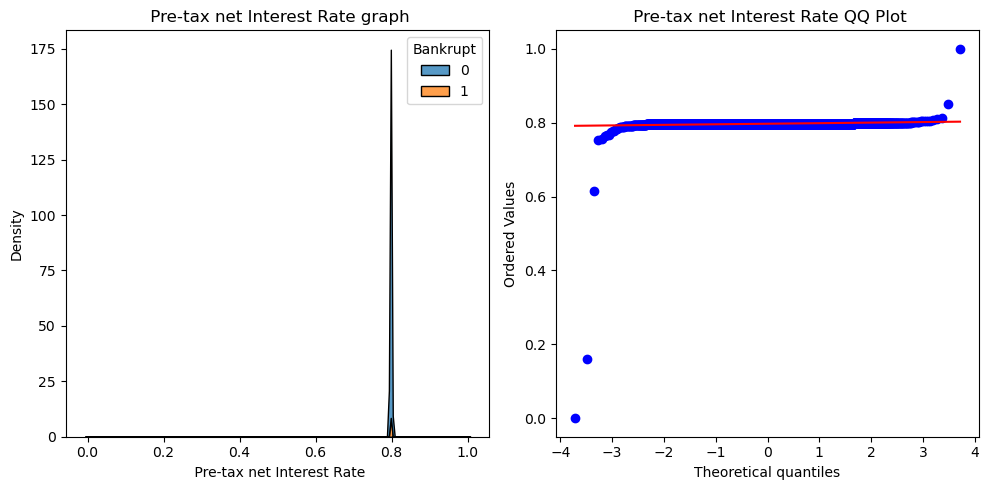

 After-tax net Interest Rate


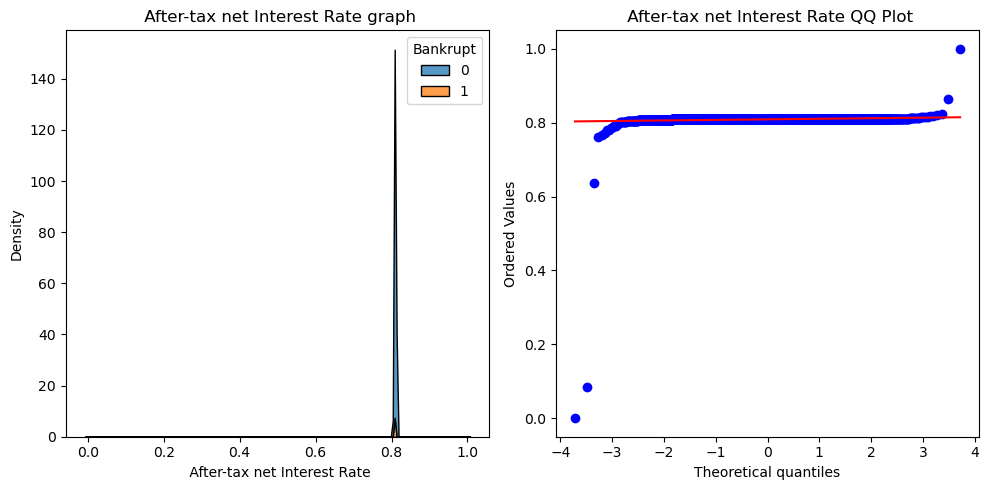

 Non-industry income and expenditure/revenue


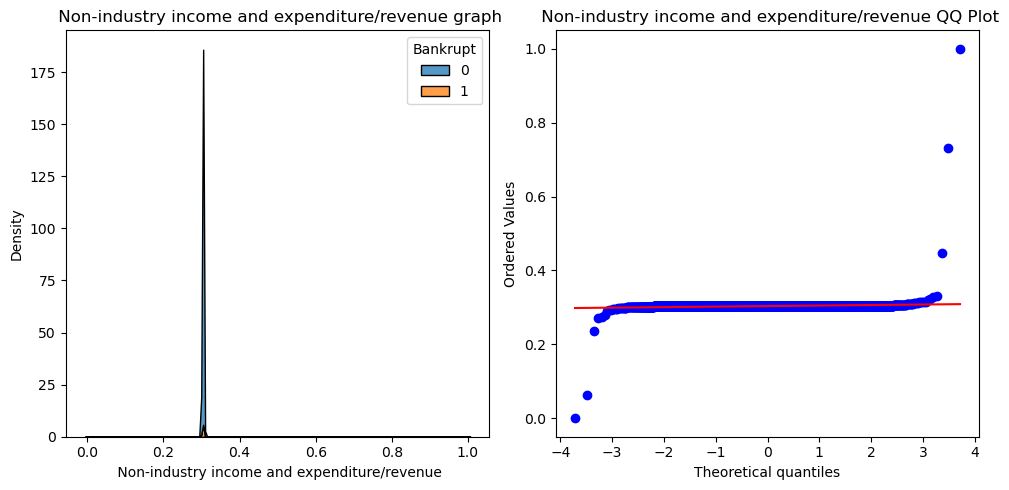

 Continuous interest rate (after tax)


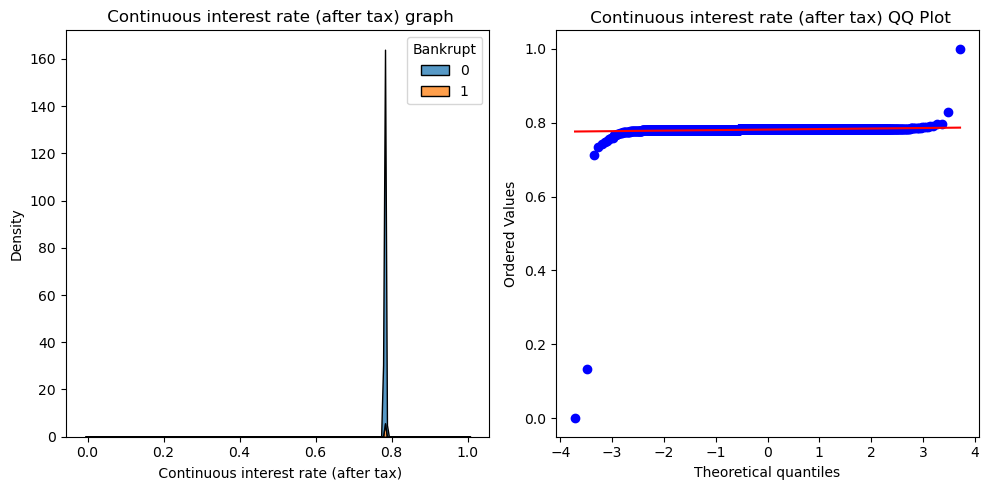

 Operating Expense Rate


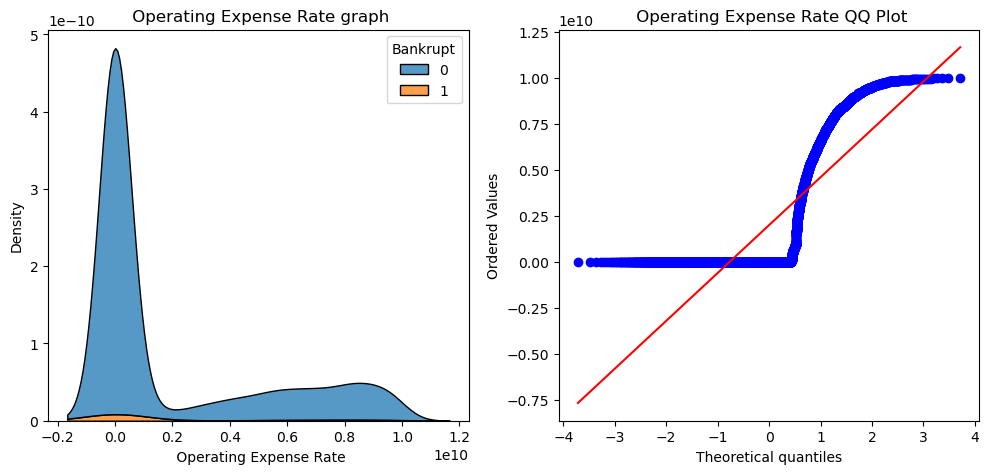

 Research and development expense rate


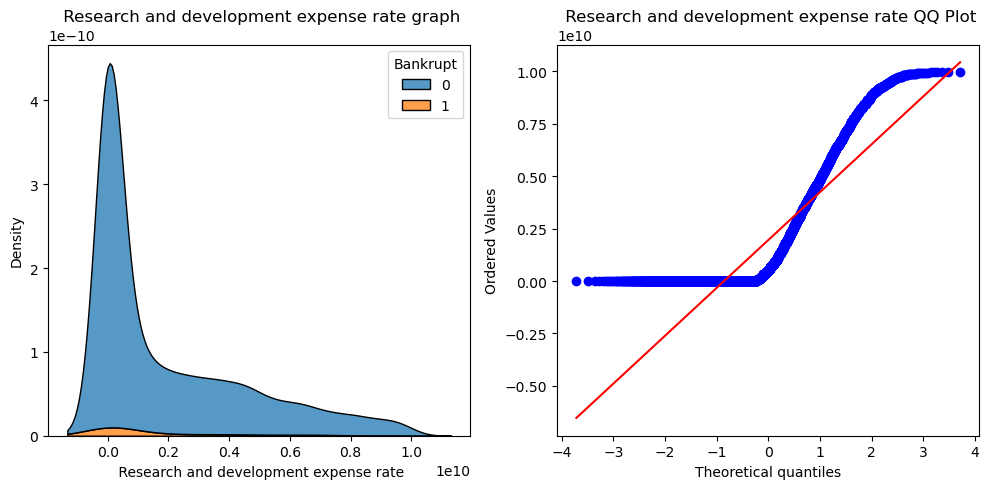

 Cash flow rate


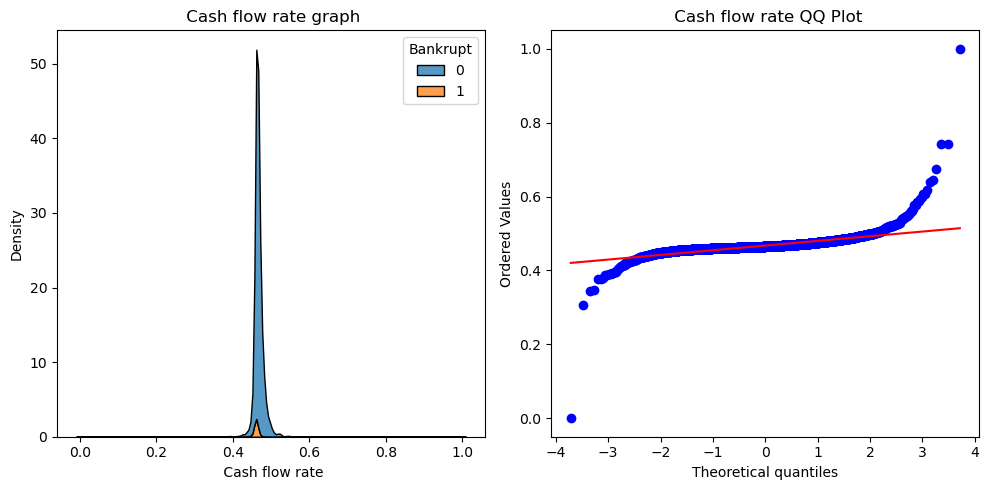

 Interest-bearing debt interest rate


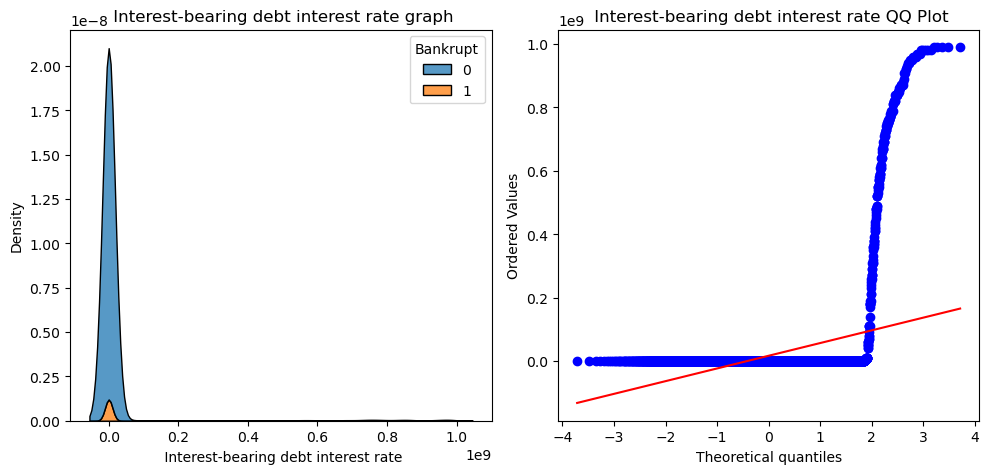

 Tax rate (A)


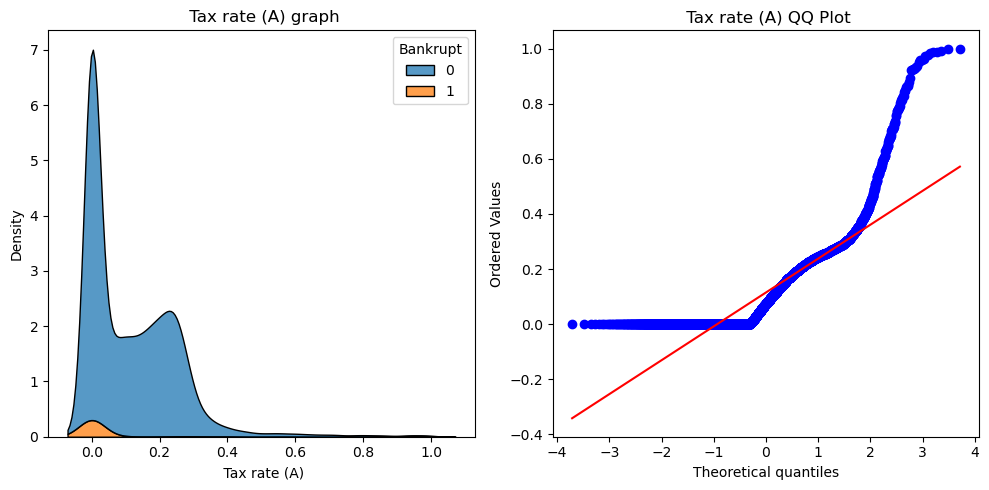

 Net Value Per Share (B)


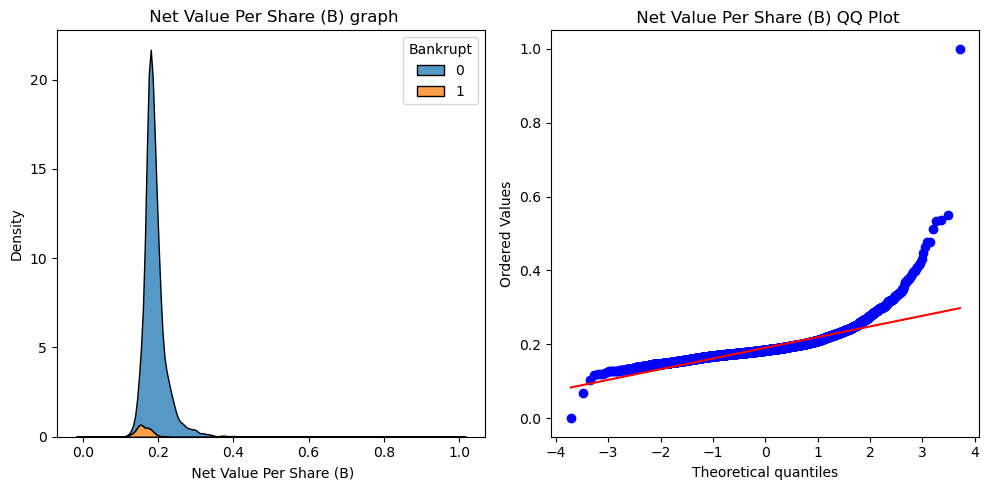

 Net Value Per Share (A)


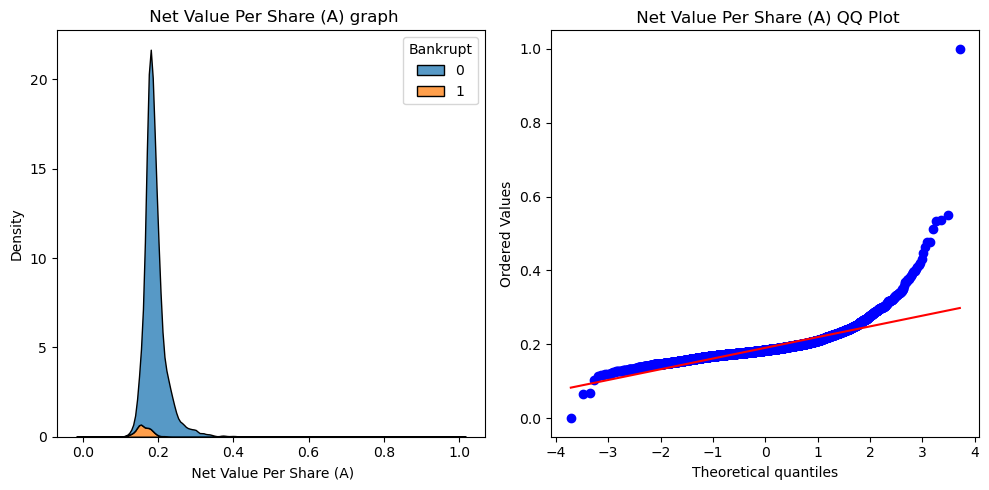

 Net Value Per Share (C)


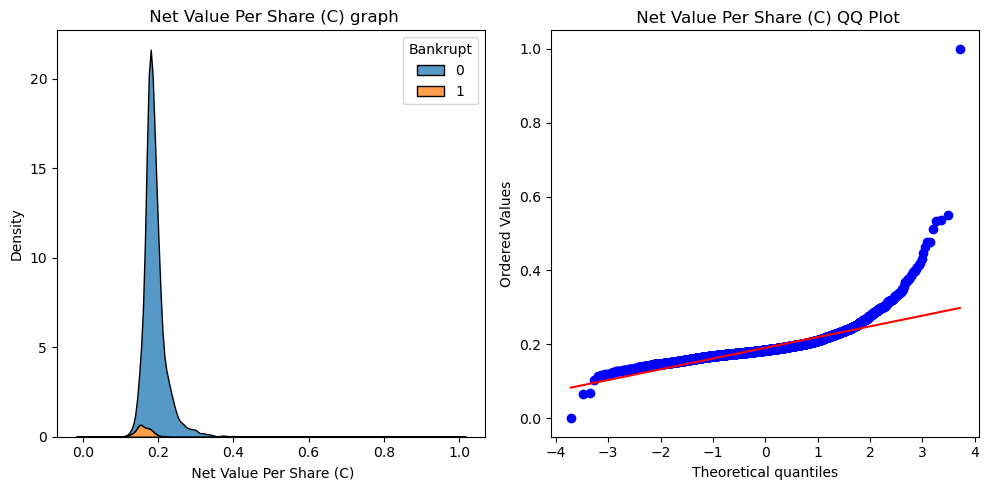

 Persistent EPS in the Last Four Seasons


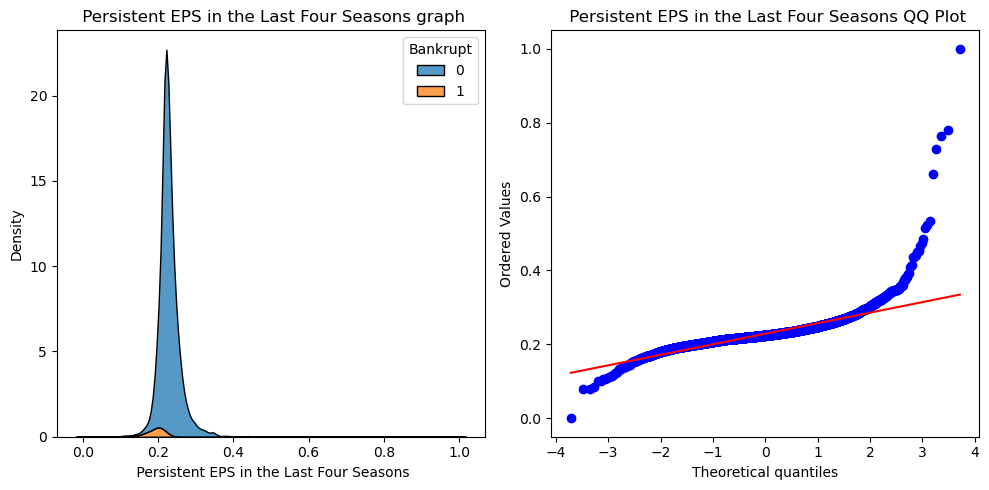

 Cash Flow Per Share


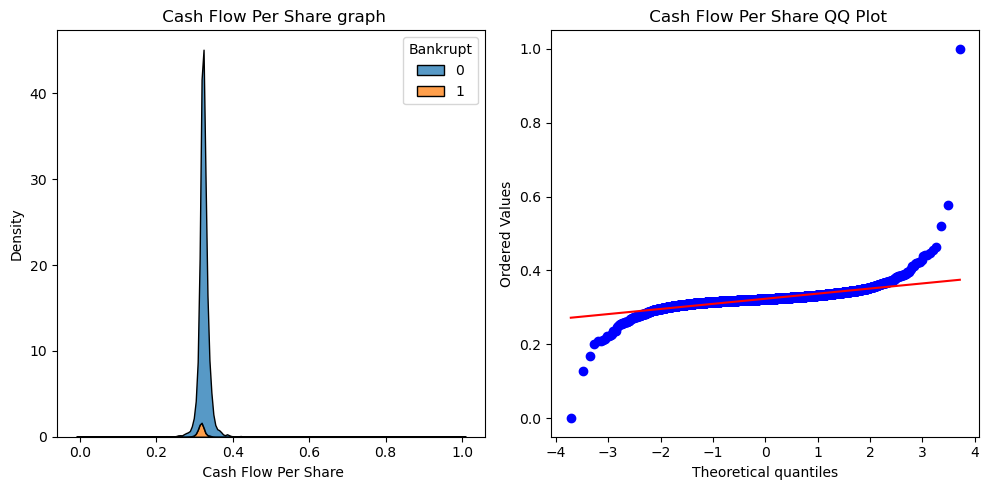

 Revenue Per Share (Yuan �


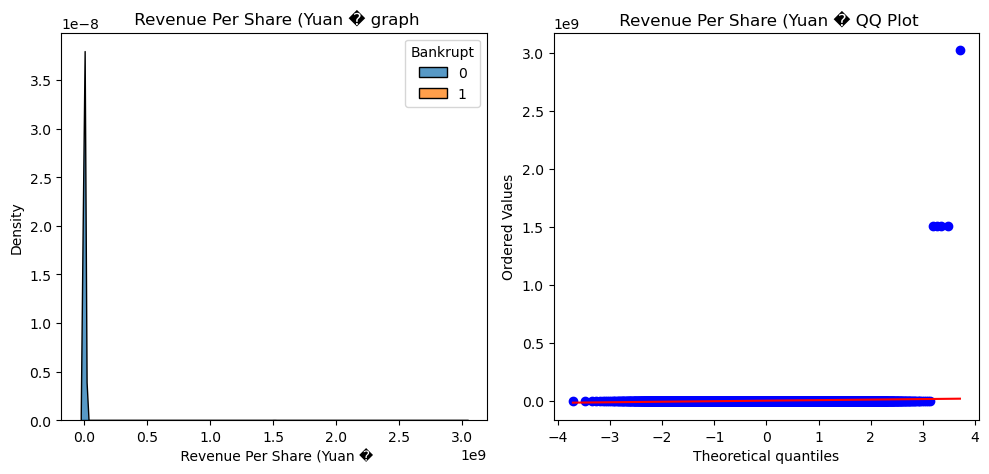

 Operating Profit Per Share (Yuan �


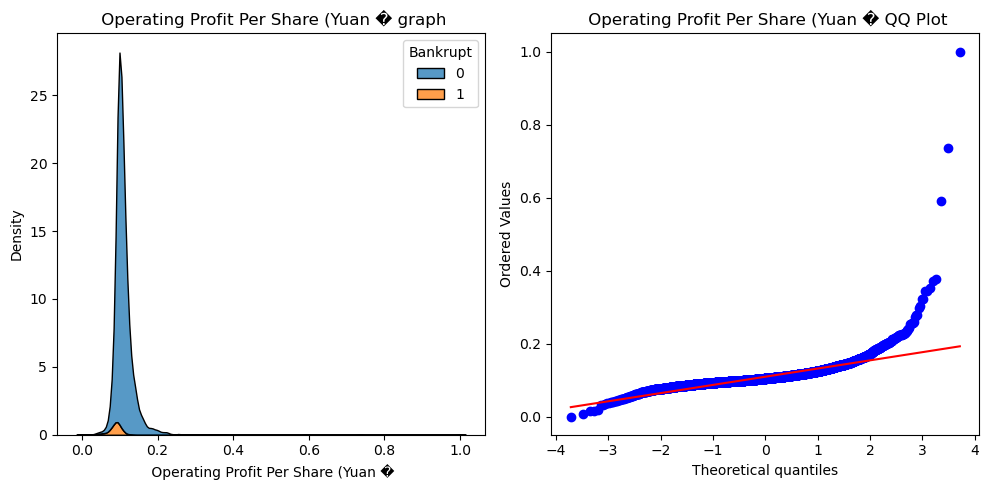

 Per Share Net profit before tax (Yuan �


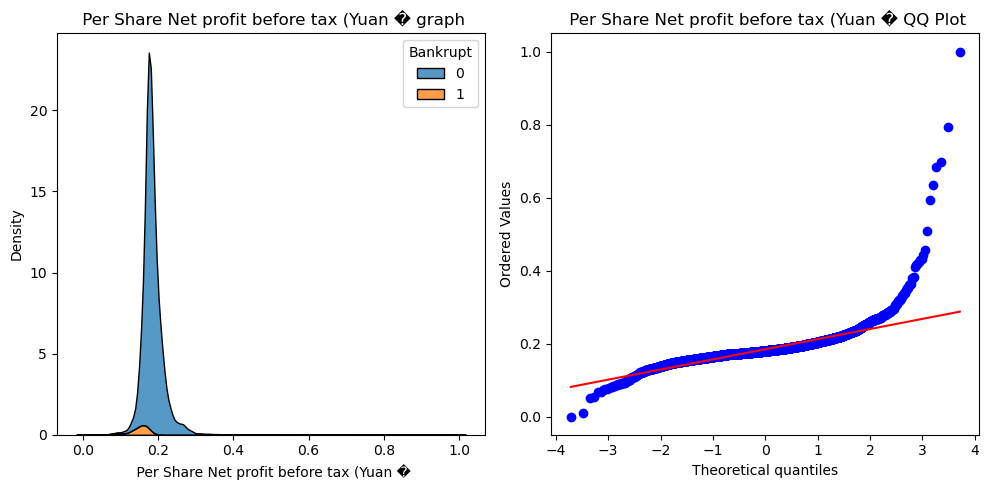

 Realized Sales Gross Profit Growth Rate


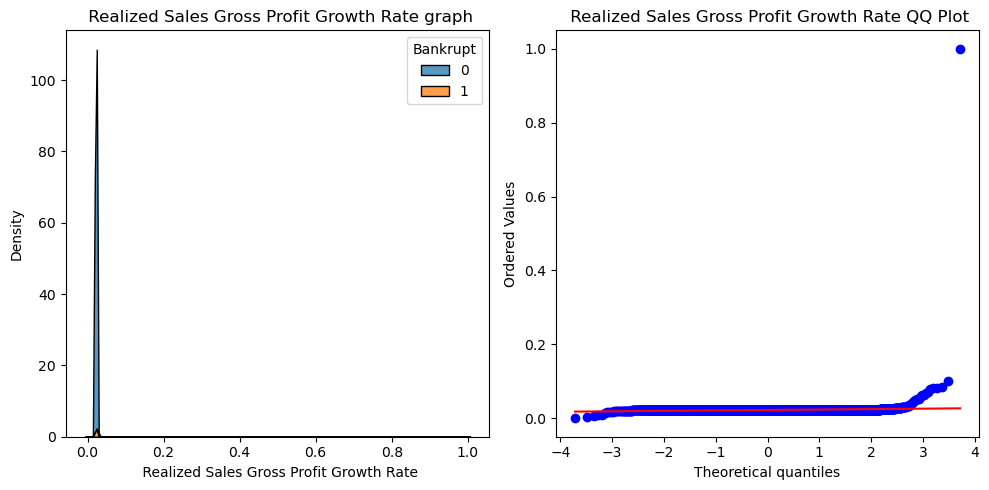

 Operating Profit Growth Rate


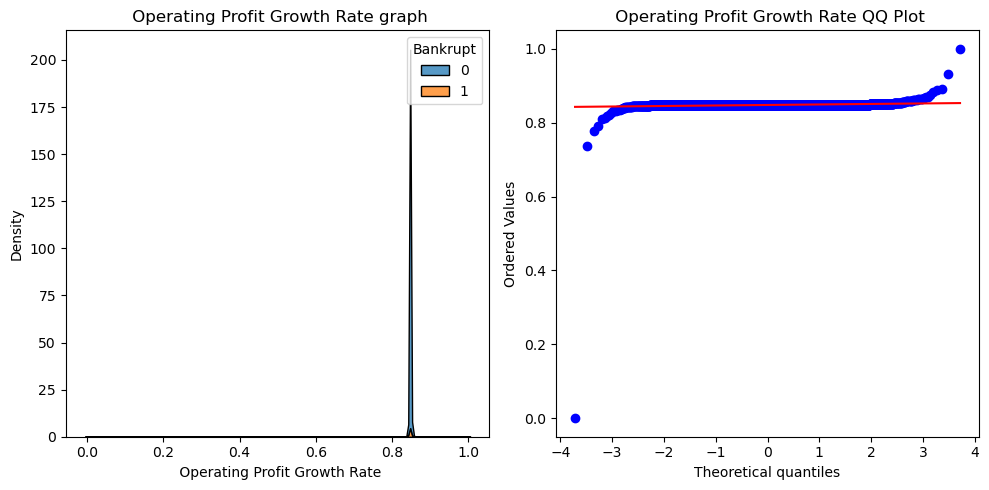

 After-tax Net Profit Growth Rate


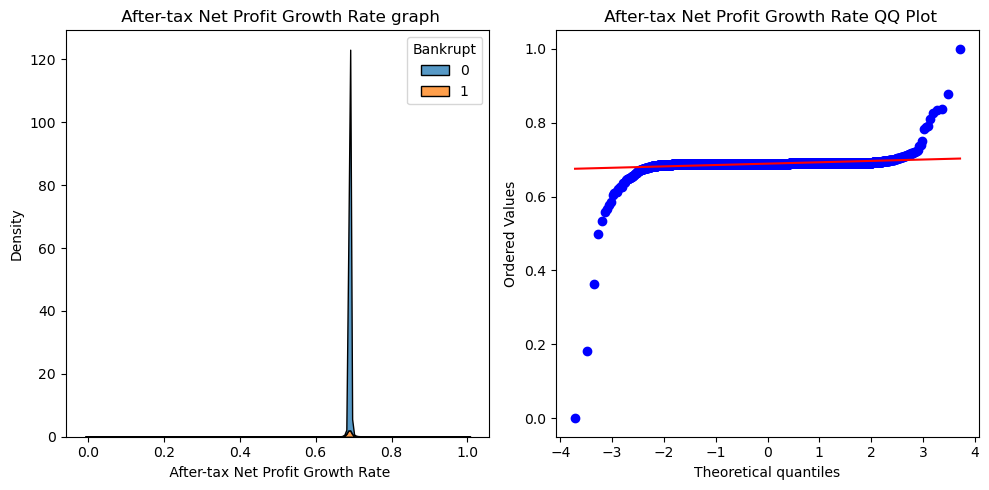

 Regular Net Profit Growth Rate


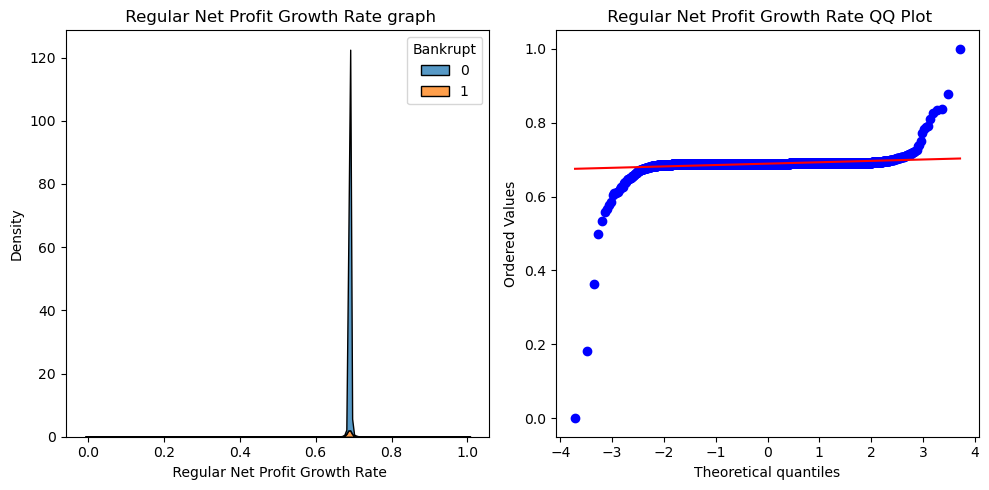

 Continuous Net Profit Growth Rate


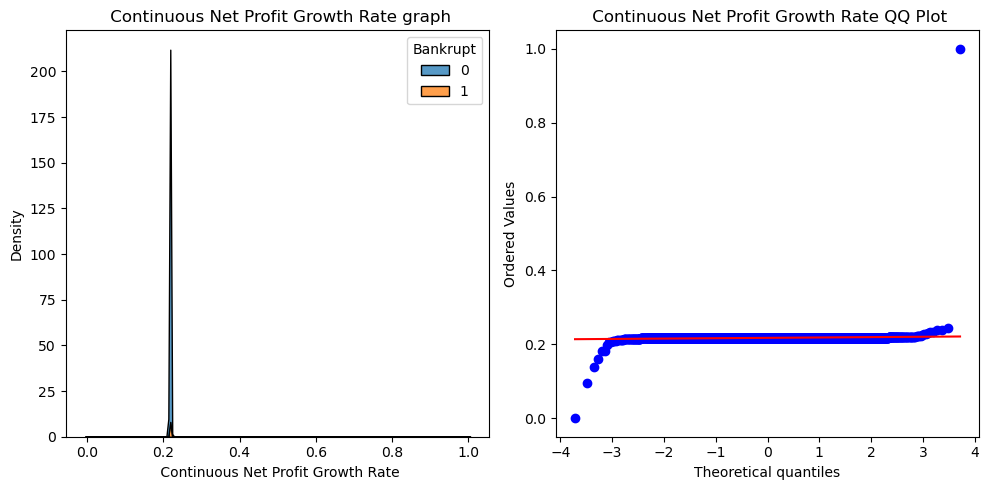

 Total Asset Growth Rate


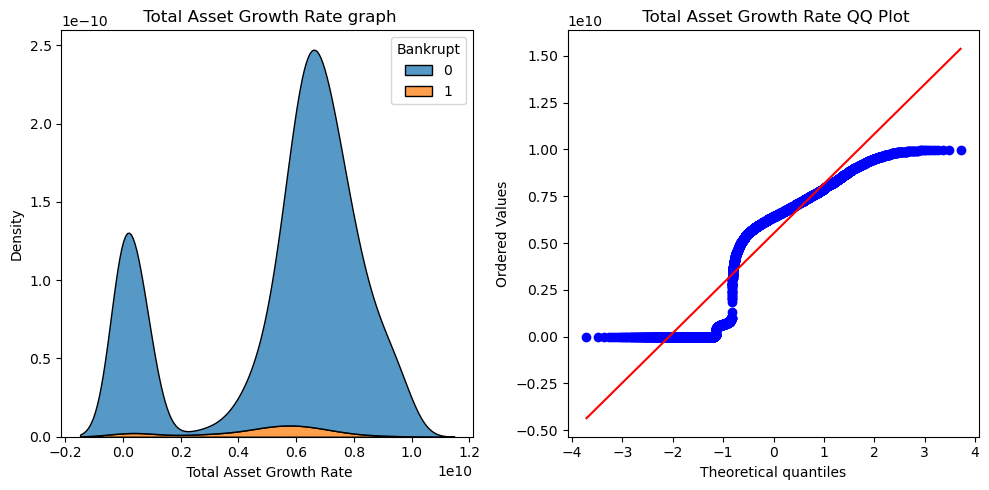

 Net Value Growth Rate


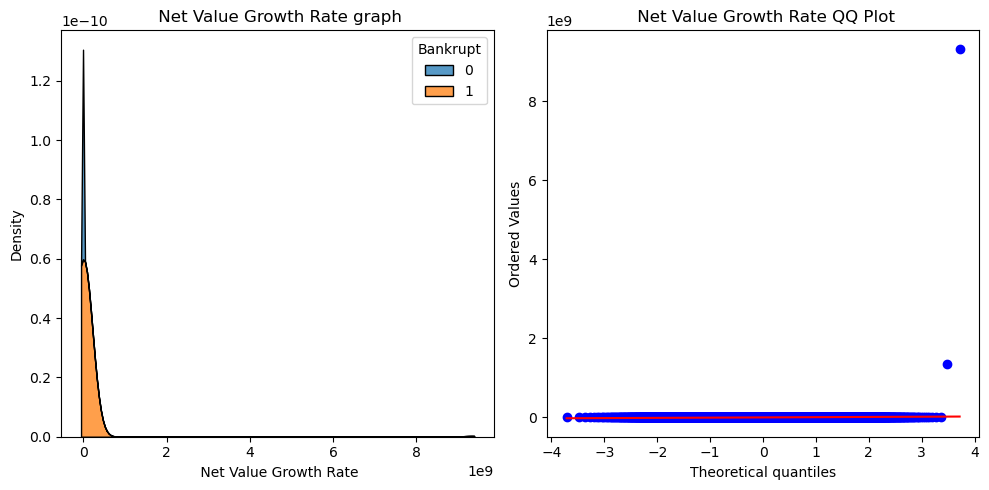

 Total Asset Return Growth Rate Ratio


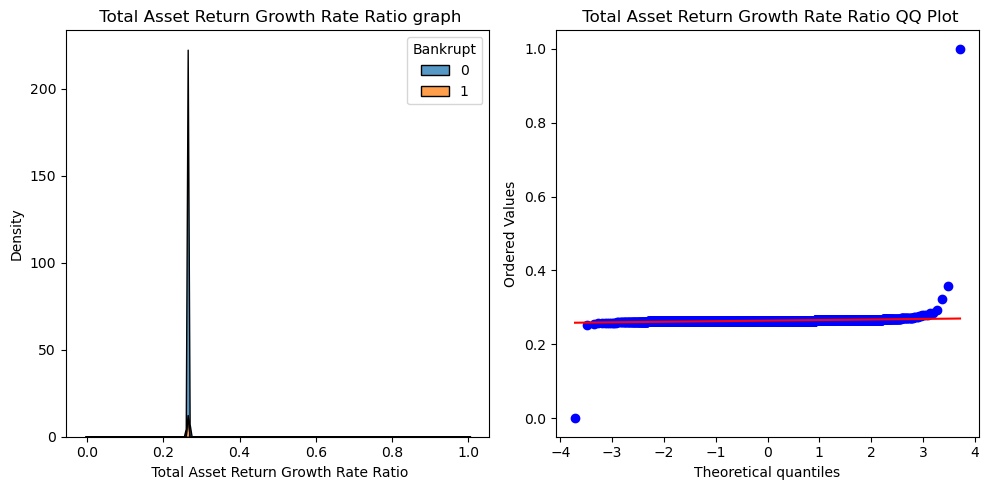

 Cash Reinvestment %


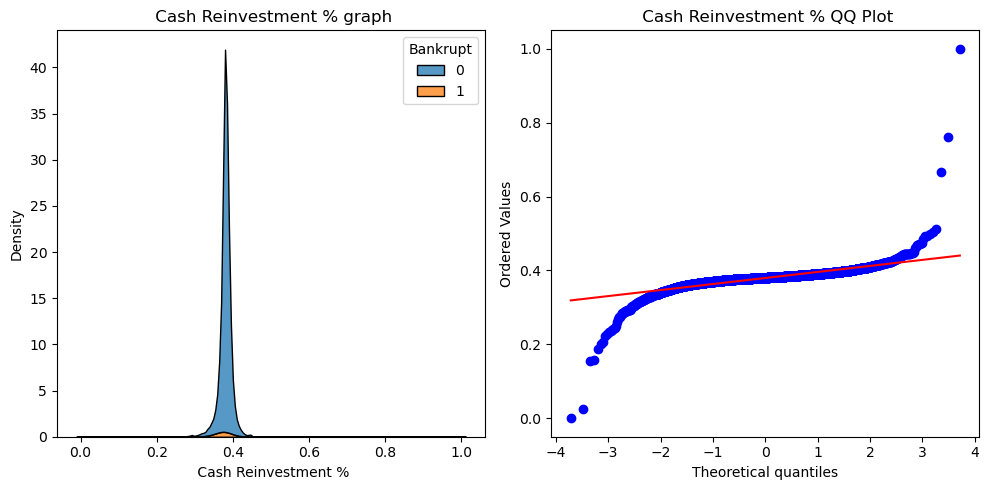

 Current Ratio


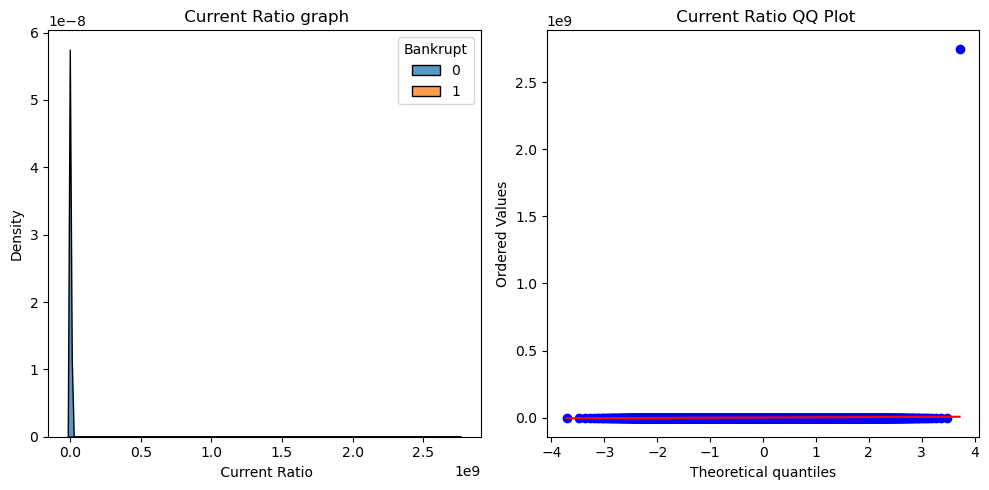

 Quick Ratio


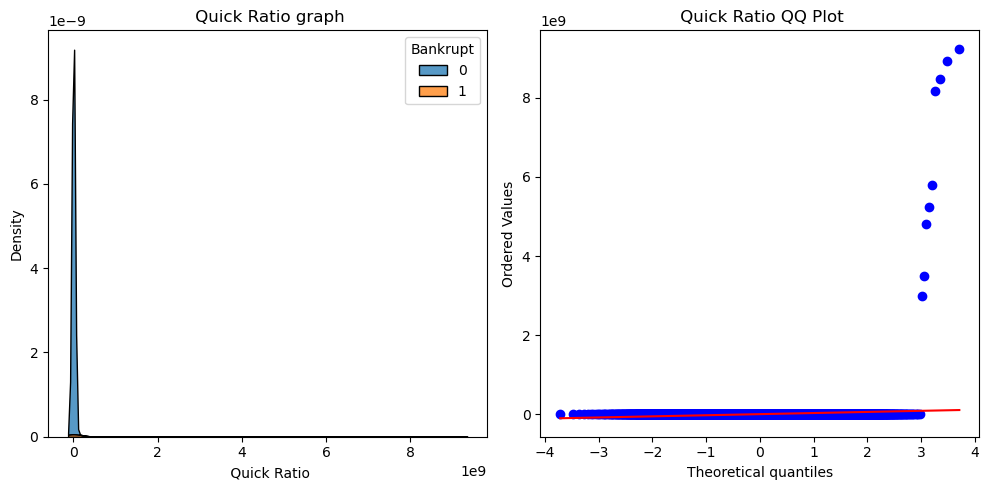

 Interest Expense Ratio


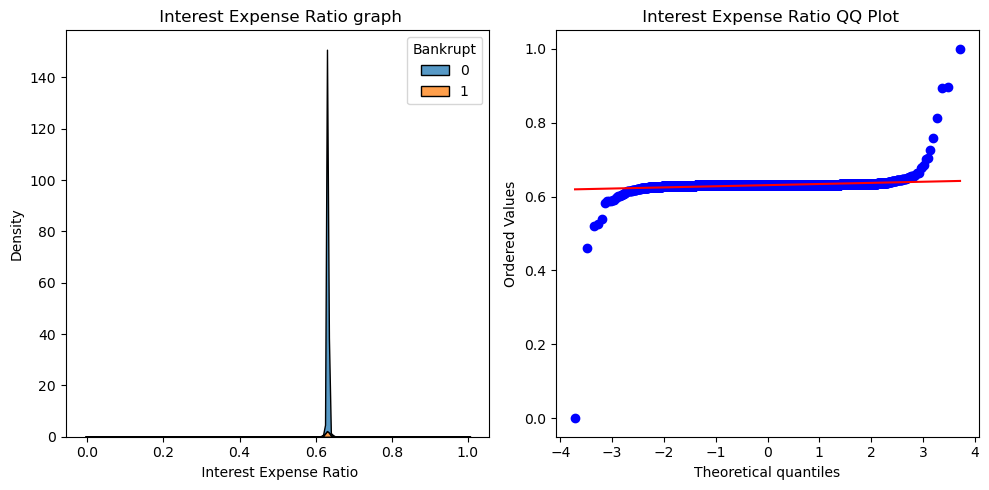

 Total debt/Total net worth


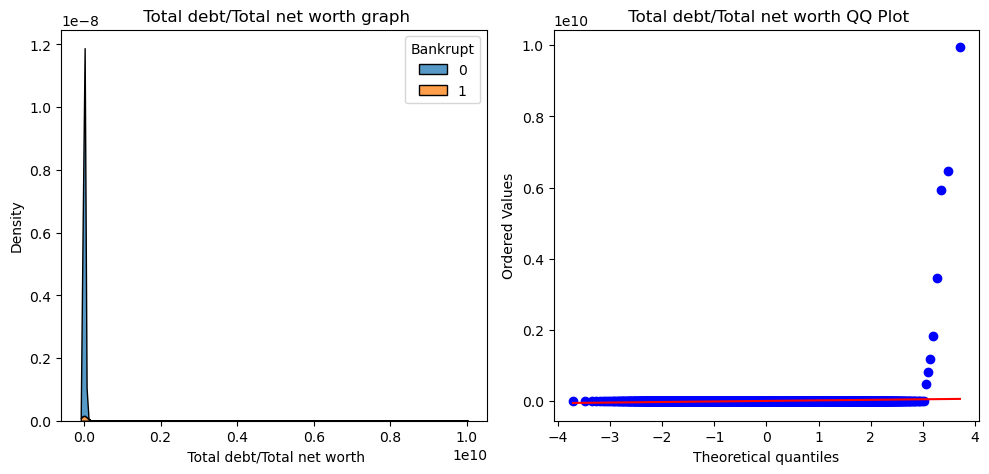

 Debt ratio %


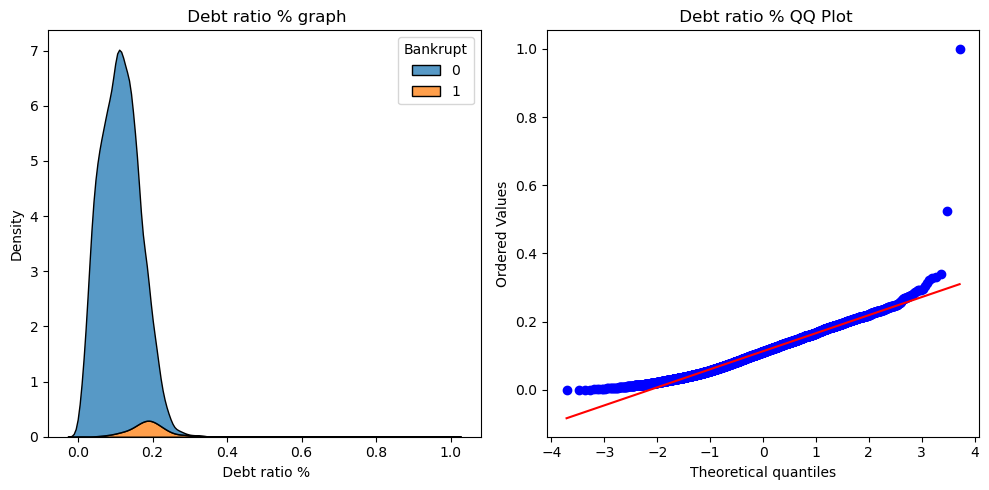

 Net worth/Assets


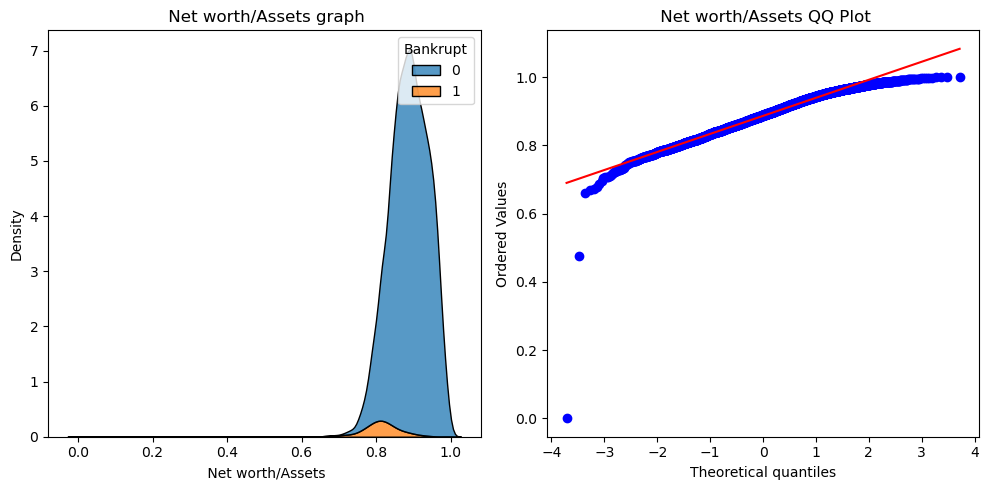

 Long-term fund suitability ratio (A)


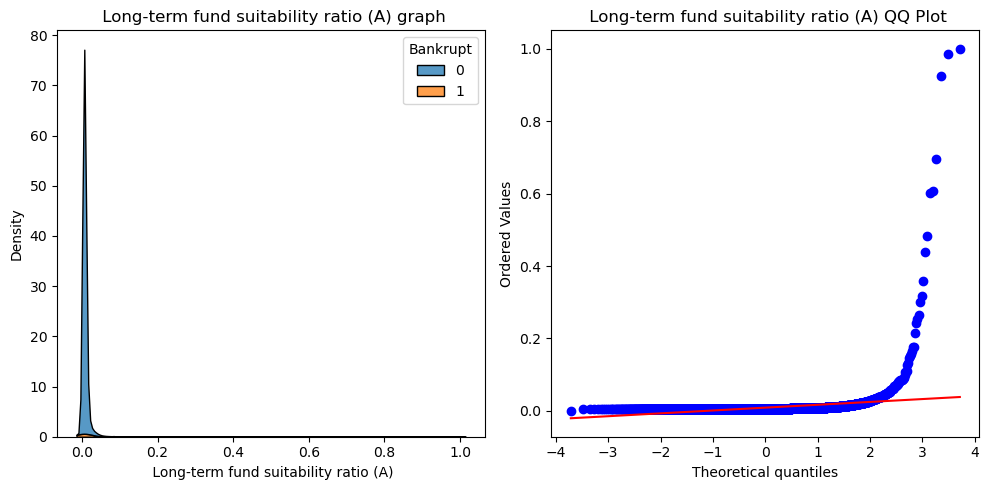

 Borrowing dependency


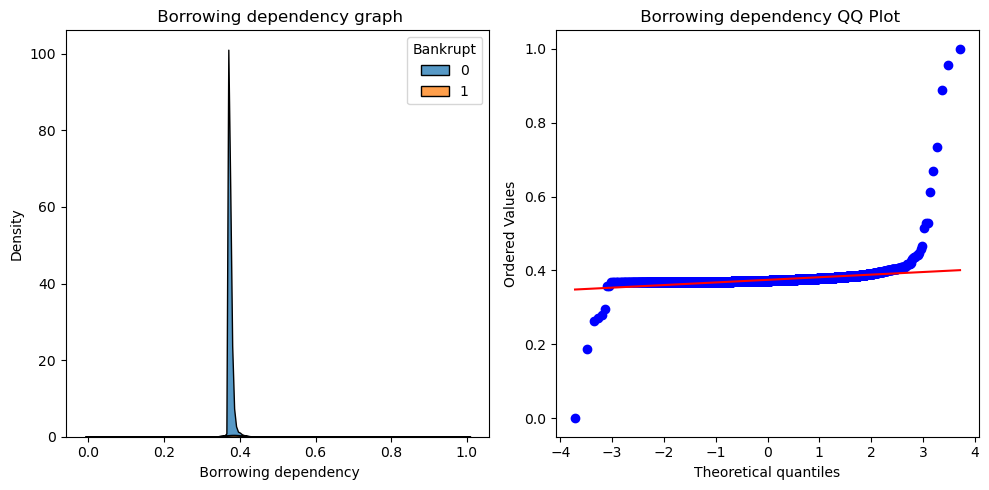

 Contingent liabilities/Net worth


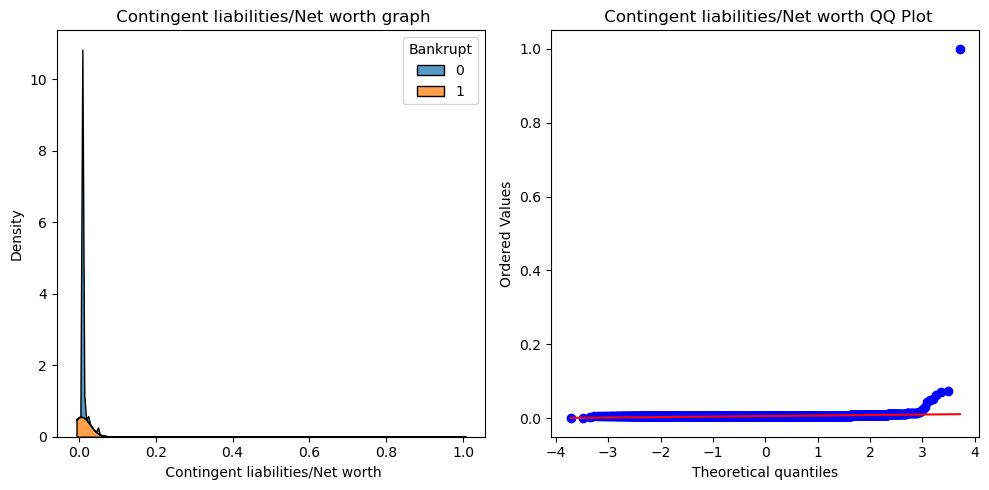

 Operating profit/Paid-in capital


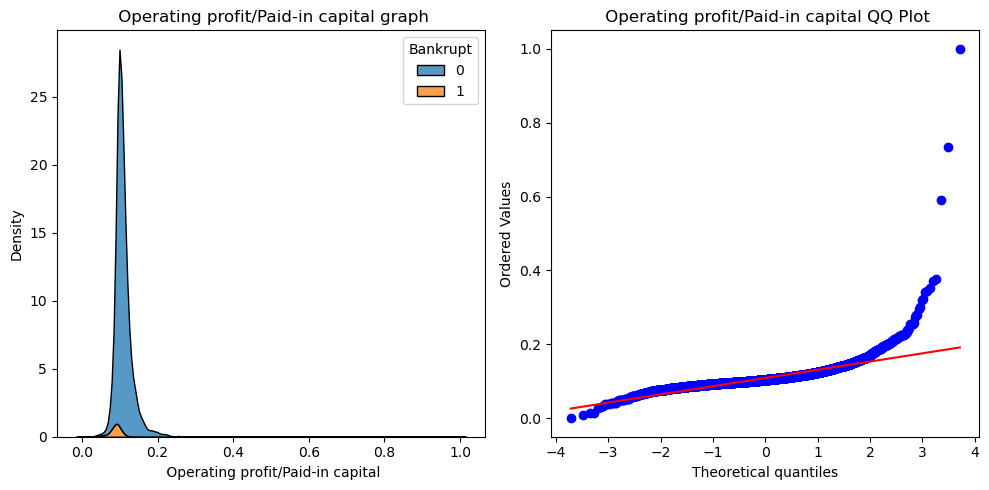

 Net profit before tax/Paid-in capital


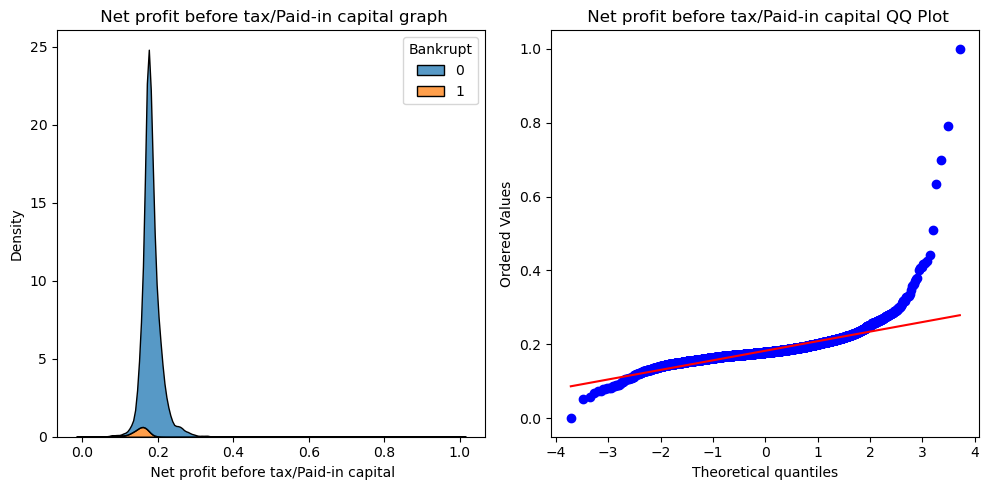

 Inventory and accounts receivable/Net value


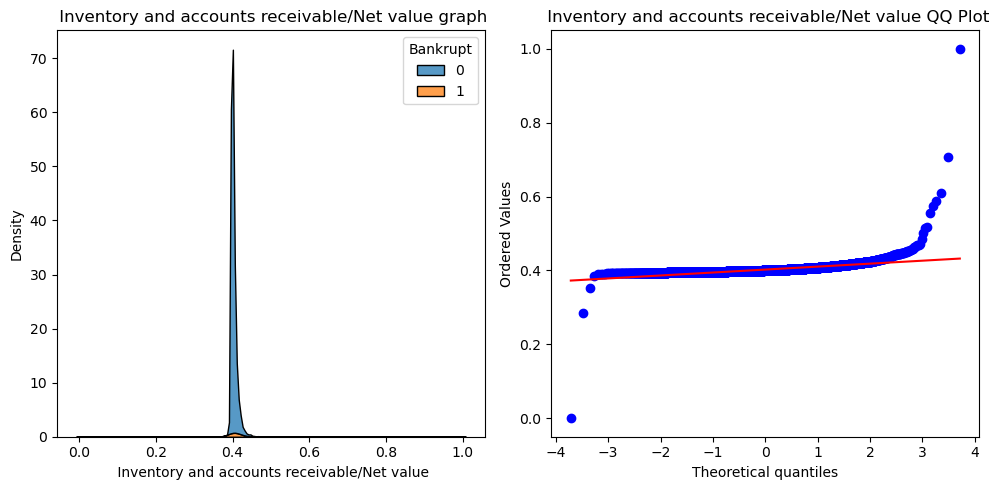

 Total Asset Turnover


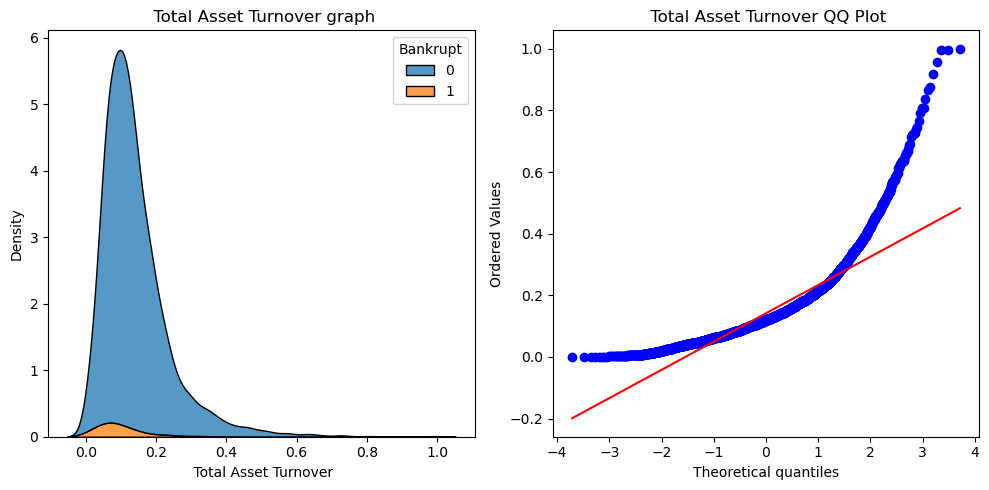

 Accounts Receivable Turnover


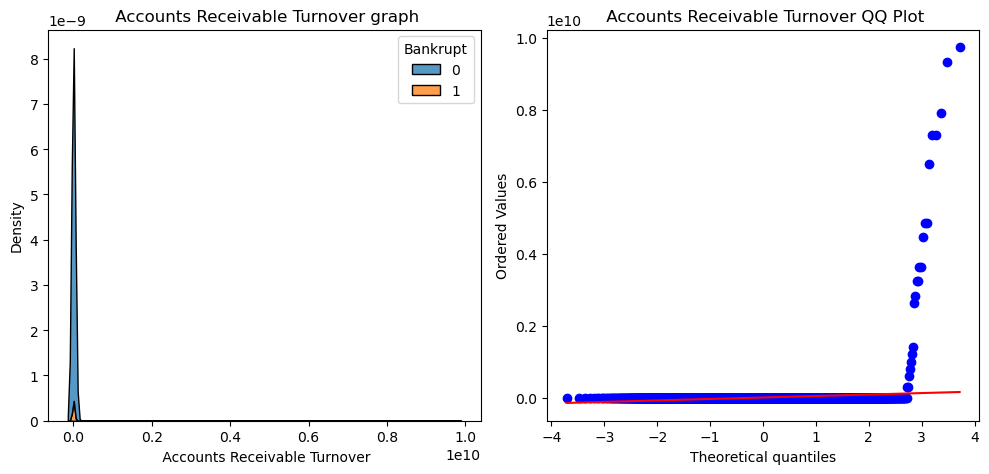

 Average Collection Days


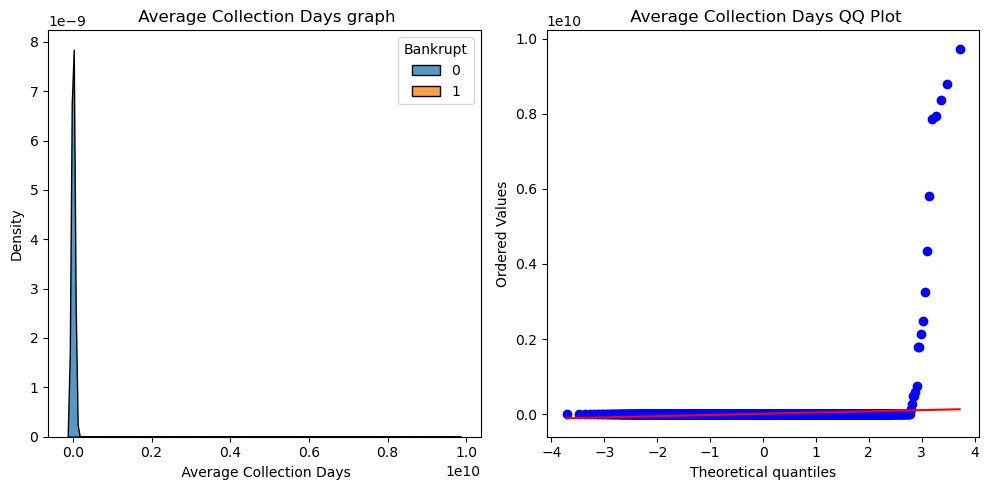

 Inventory Turnover Rate (times)


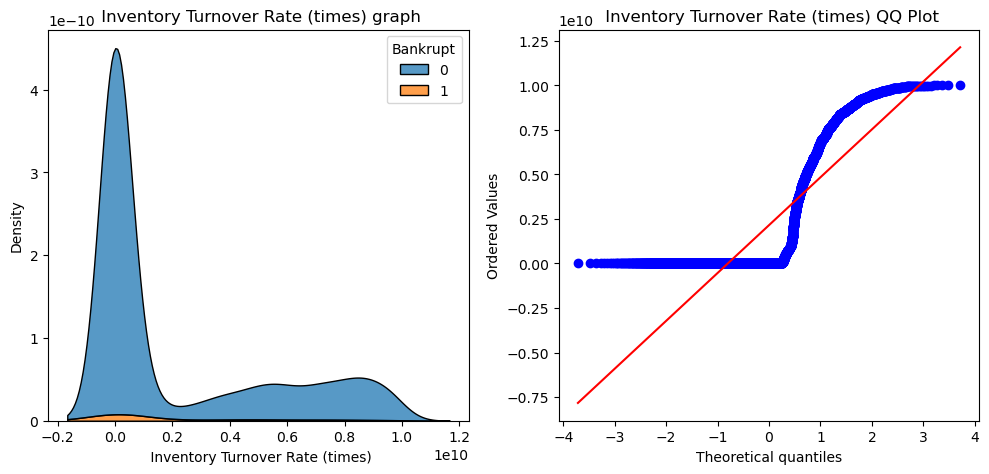

 Fixed Assets Turnover Frequency


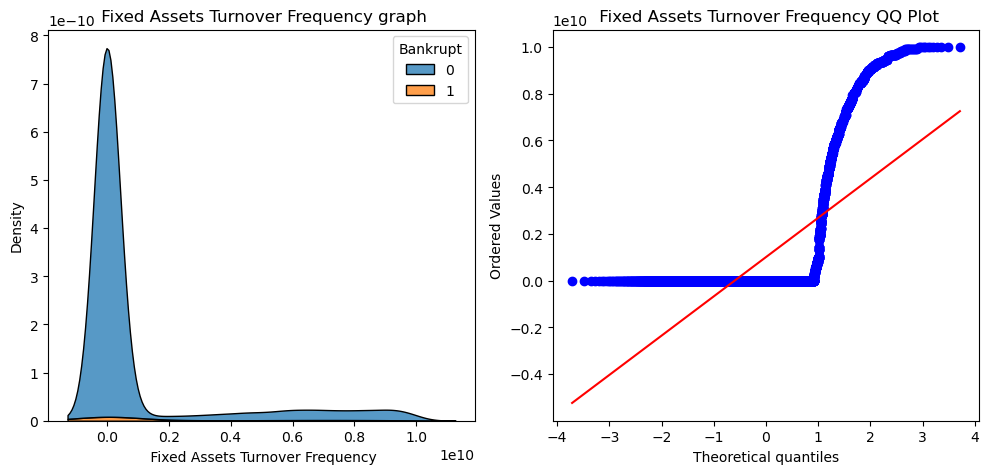

 Net Worth Turnover Rate (times)


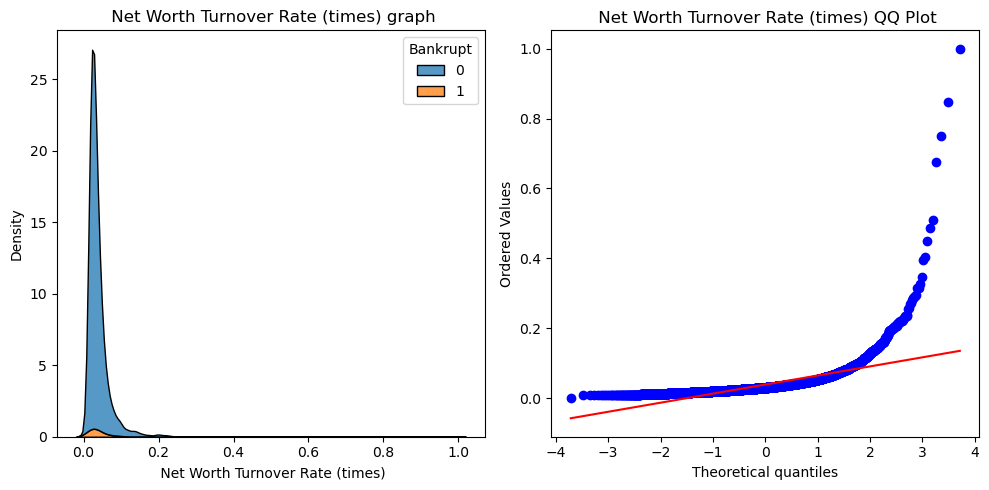

 Revenue per person


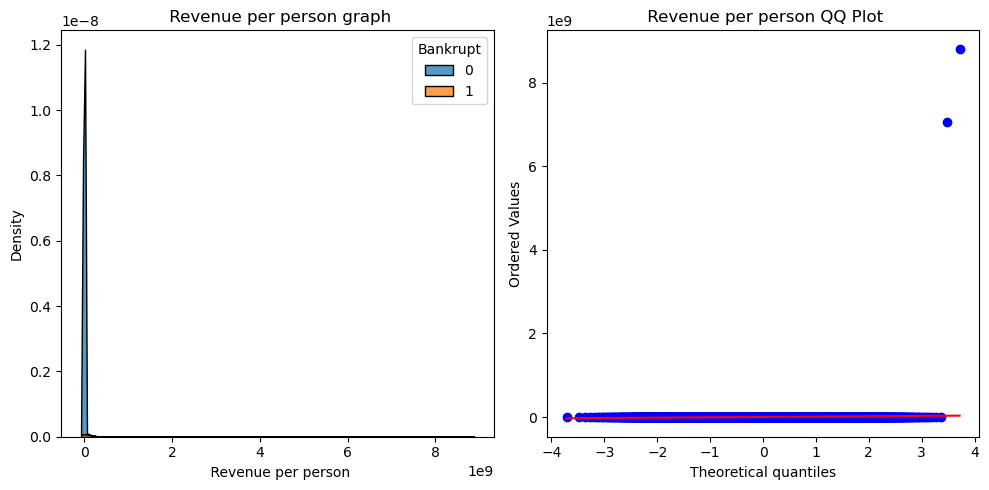

 Operating profit per person


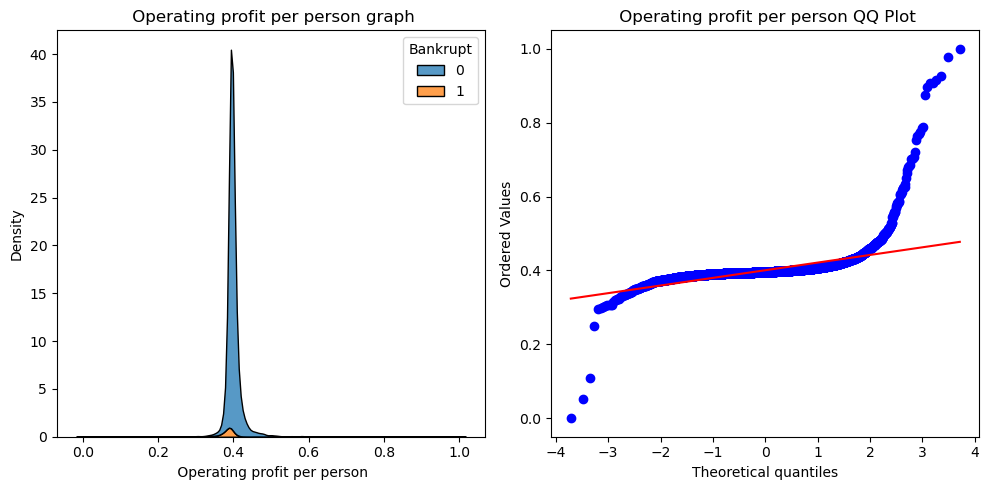

 Allocation rate per person


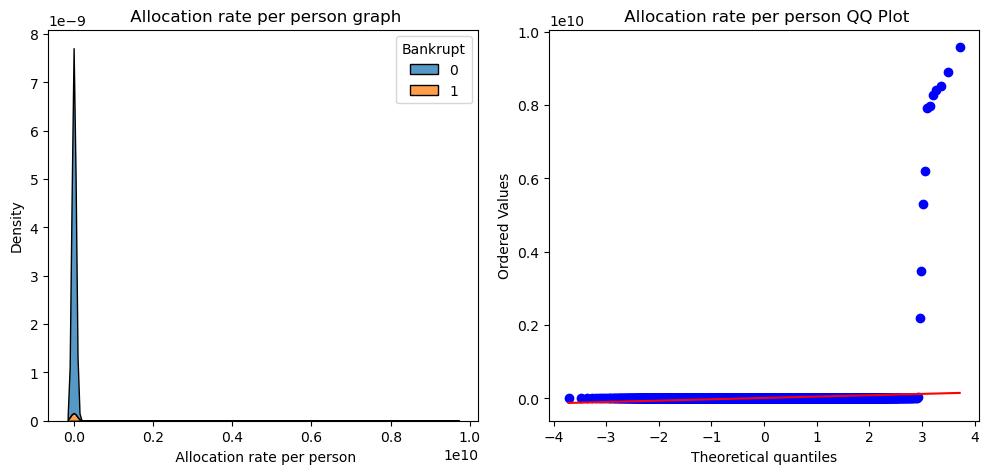

 Working Capital to Total Assets


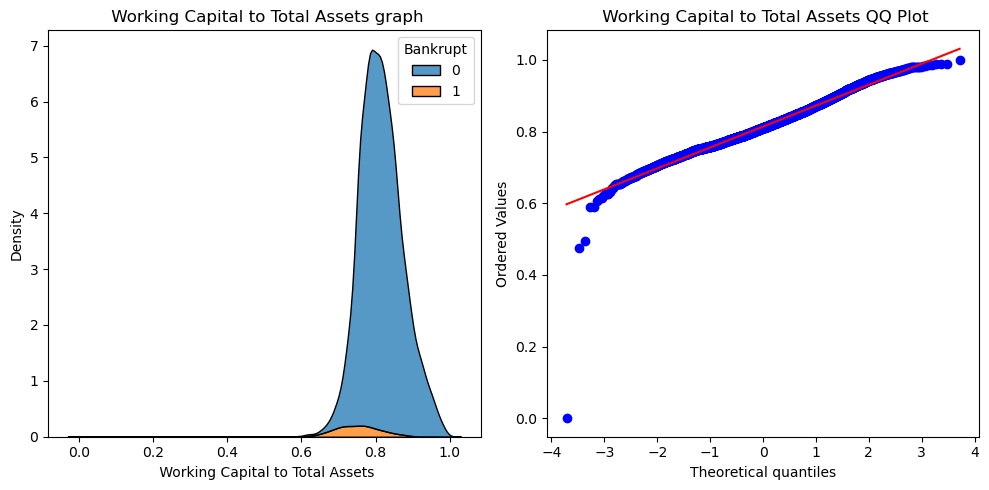

 Quick Assets/Total Assets


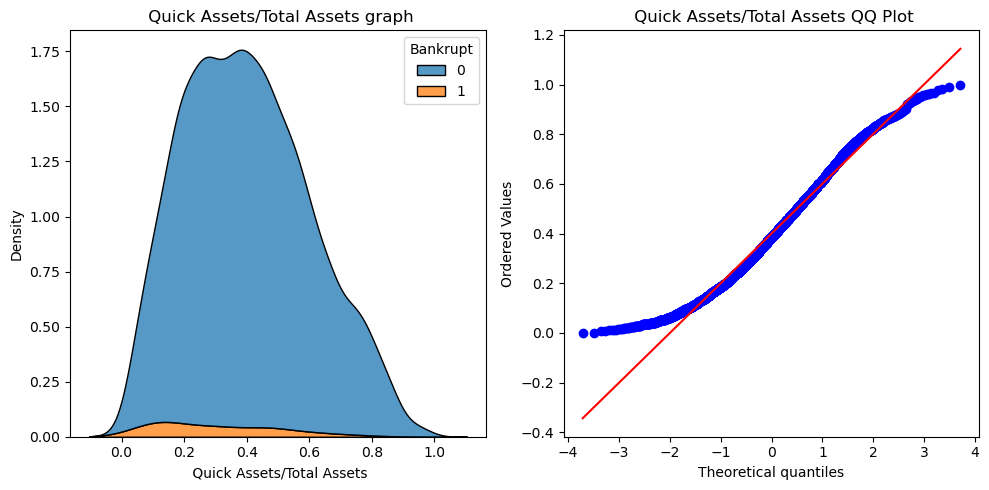

 Current Assets/Total Assets


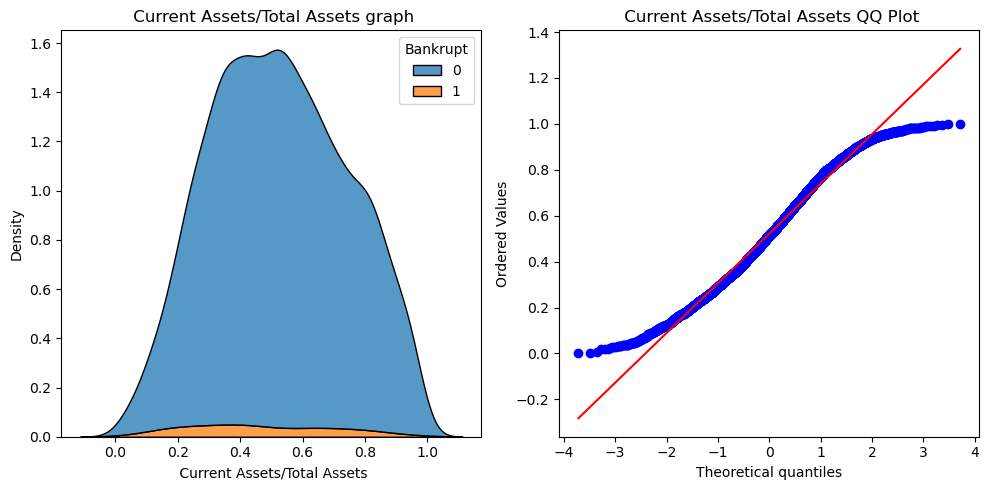

 Cash/Total Assets


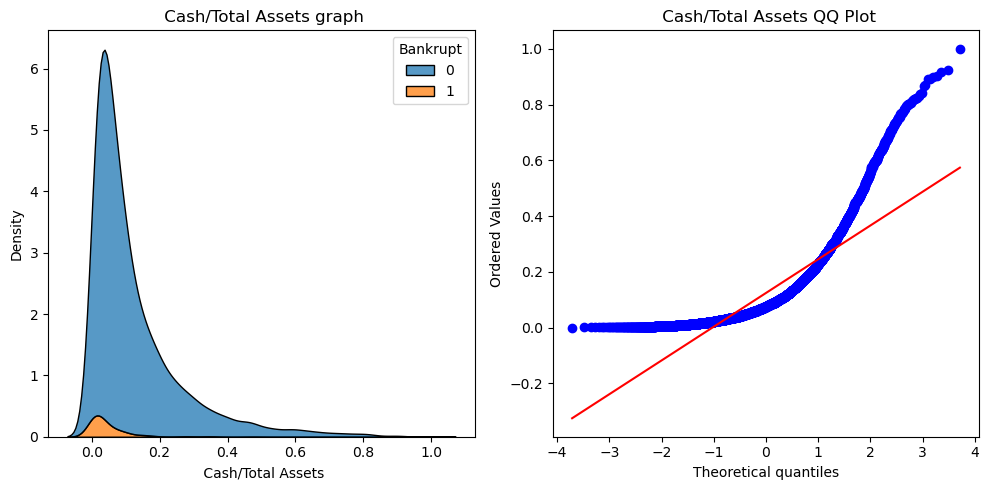

 Quick Assets/Current Liability


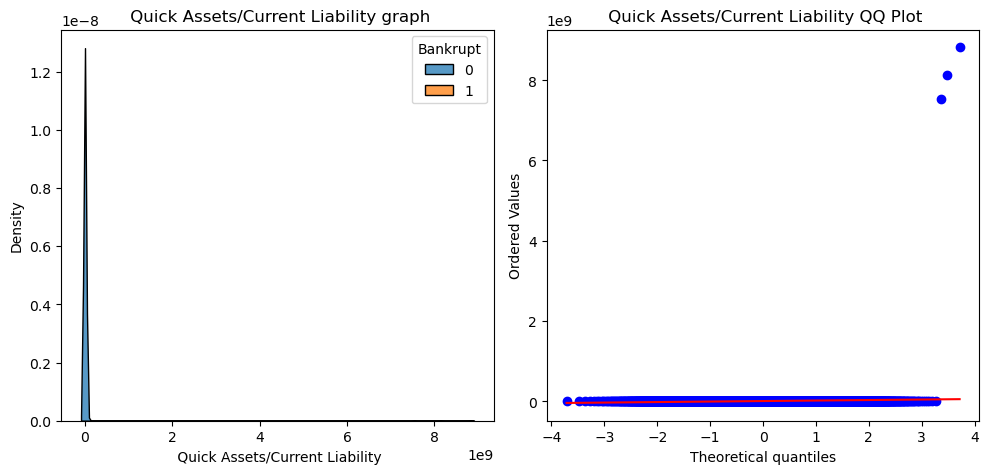

 Cash/Current Liability


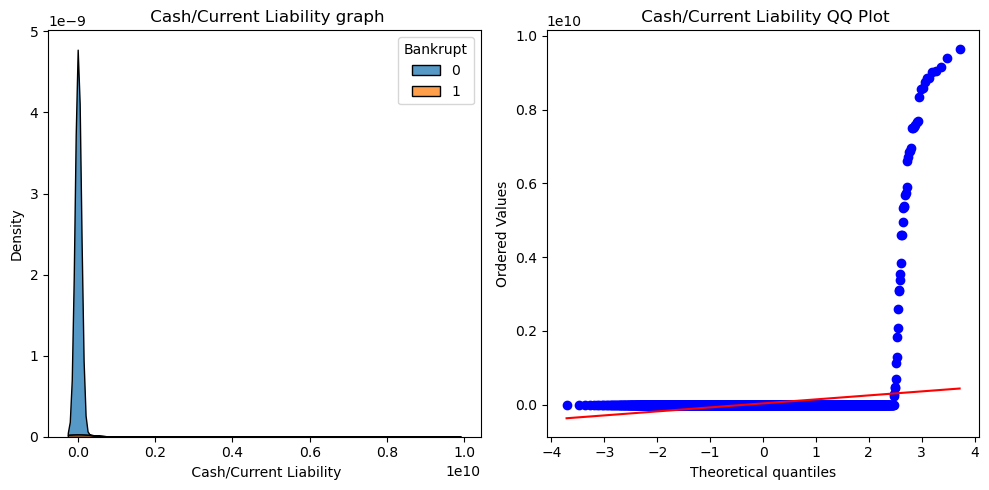

 Current Liability to Assets


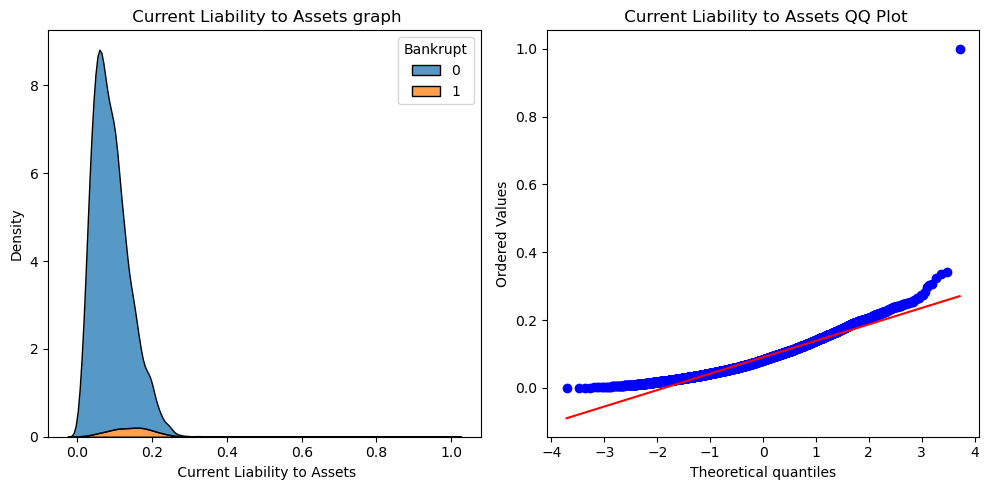

 Operating Funds to Liability


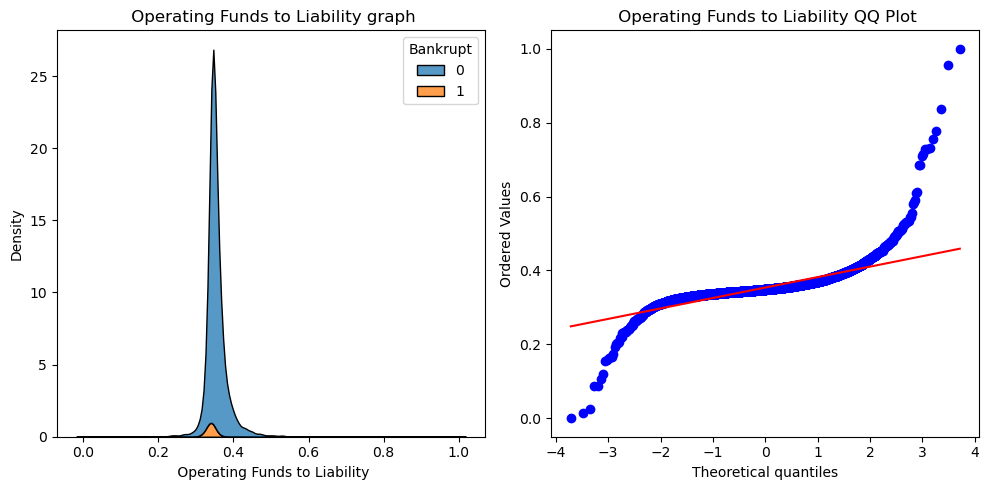

 Inventory/Working Capital


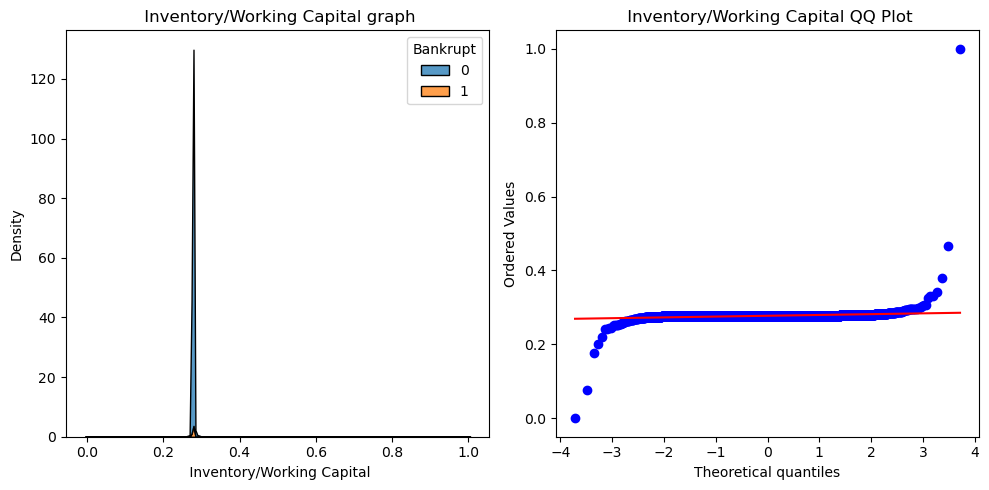

 Inventory/Current Liability


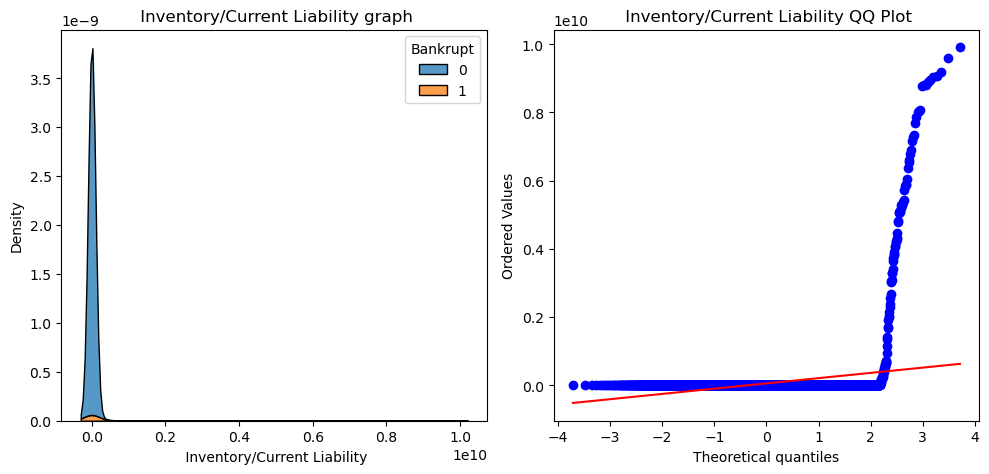

 Current Liabilities/Liability


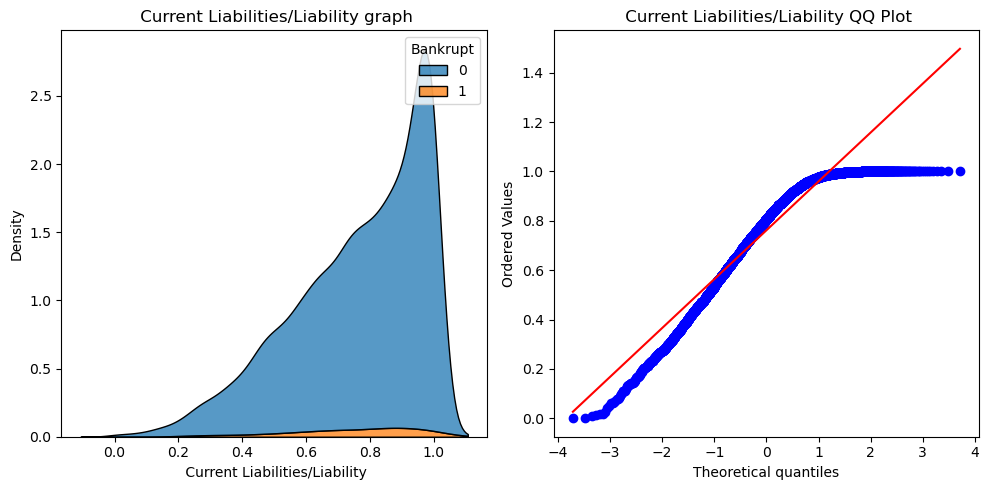

 Working Capital/Equity


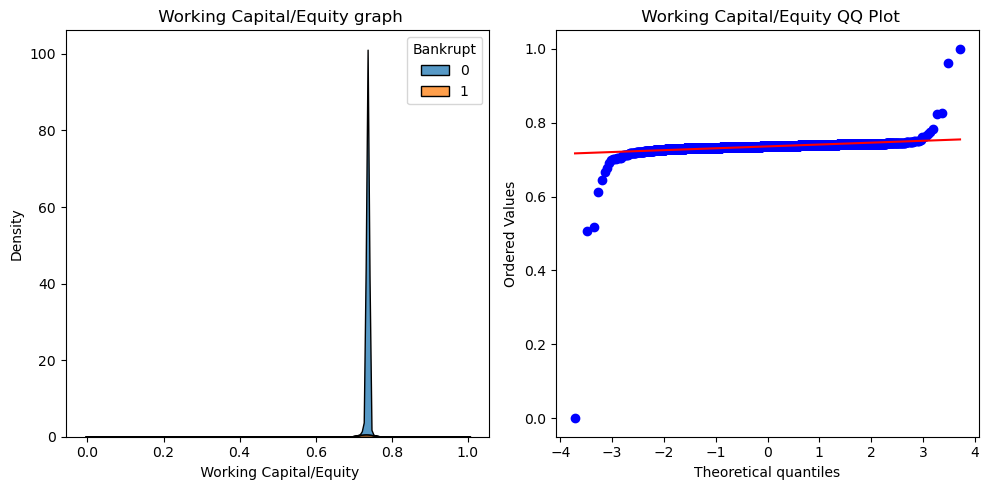

 Current Liabilities/Equity


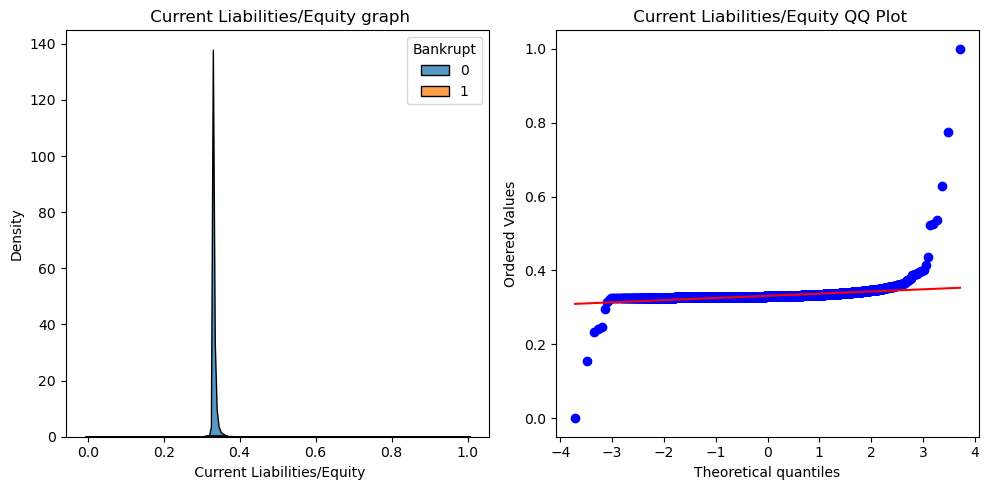

 Long-term Liability to Current Assets


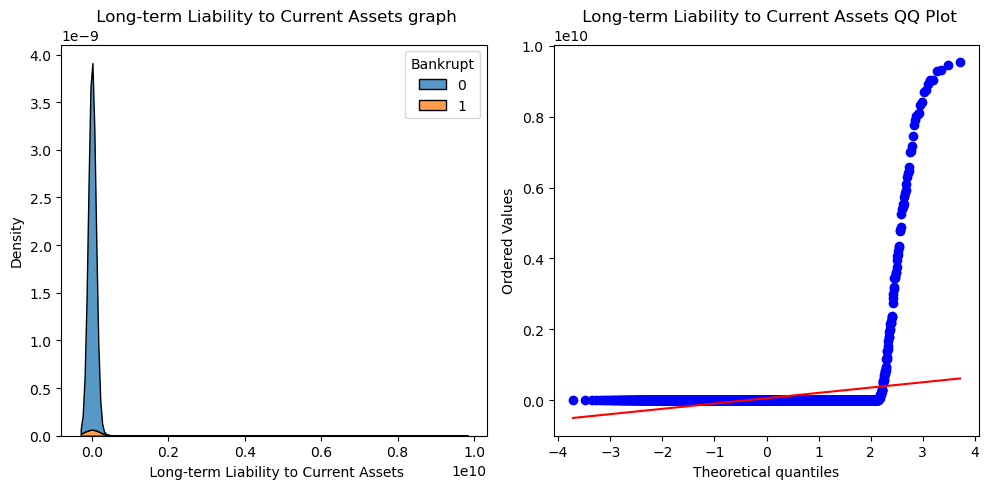

 Retained Earnings to Total Assets


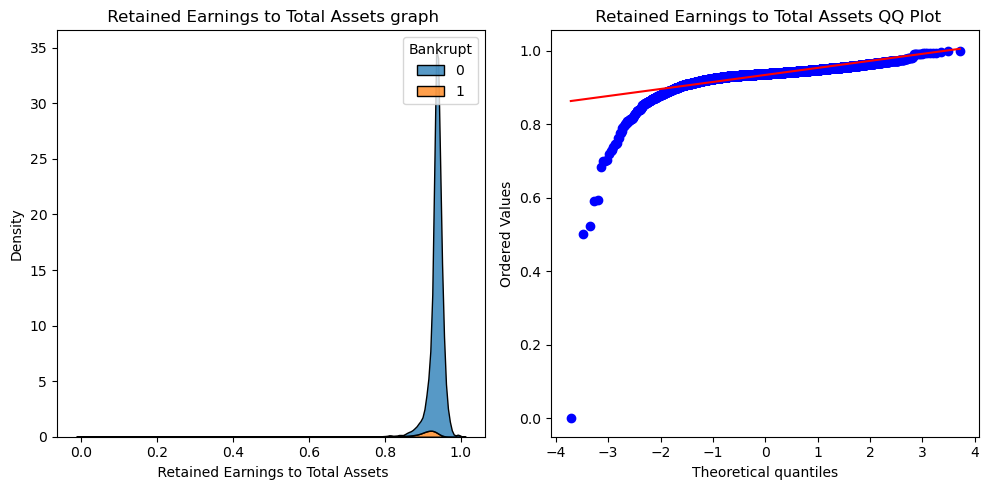

 Total income/Total expense


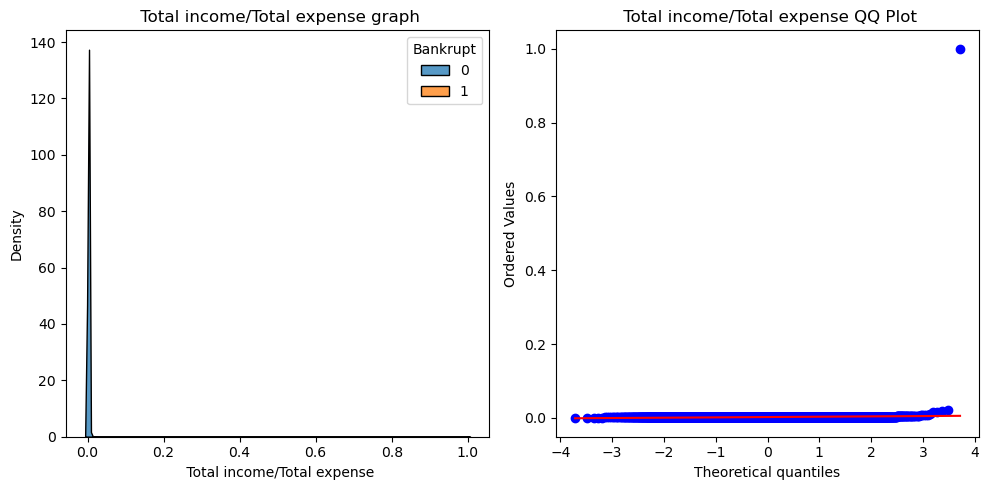

 Total expense/Assets


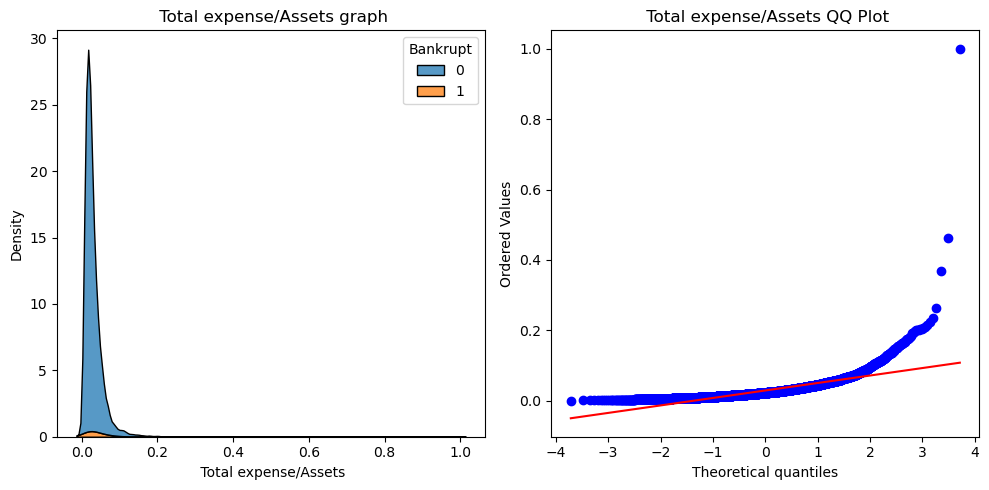

 Current Asset Turnover Rate


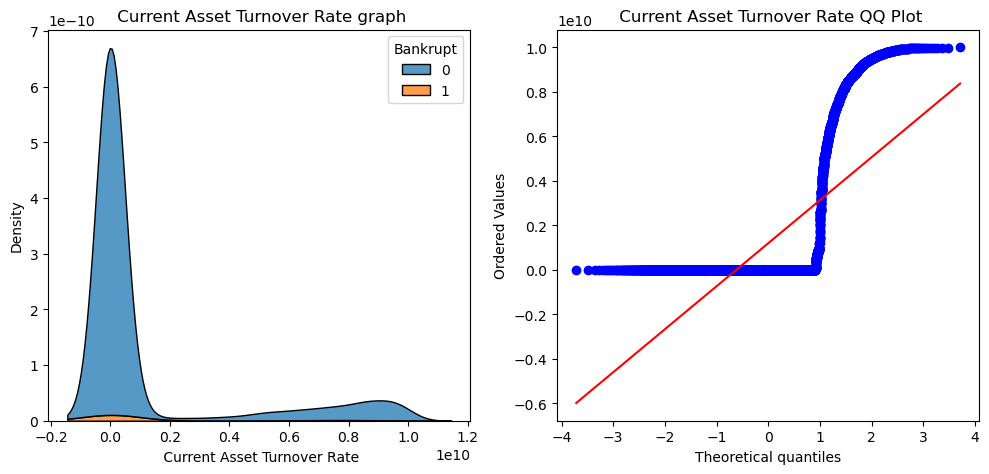

 Quick Asset Turnover Rate


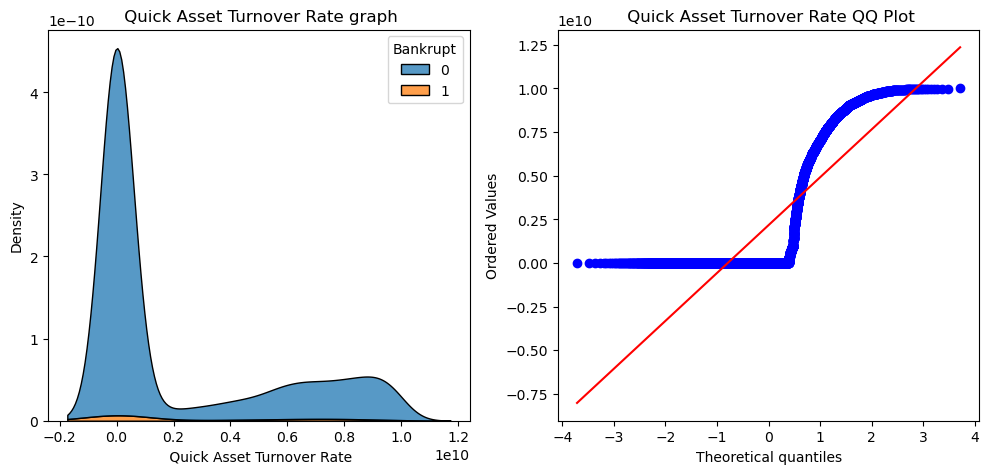

 Working capitcal Turnover Rate


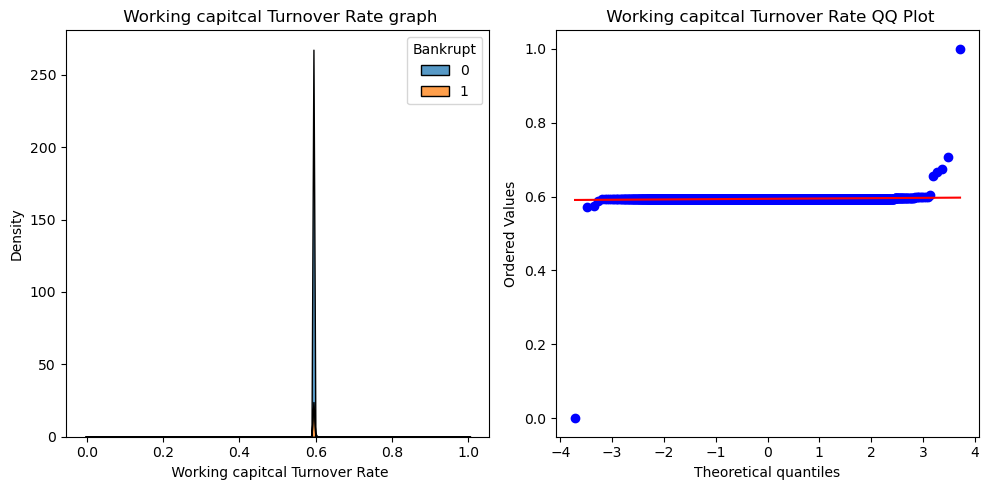

 Cash Turnover Rate


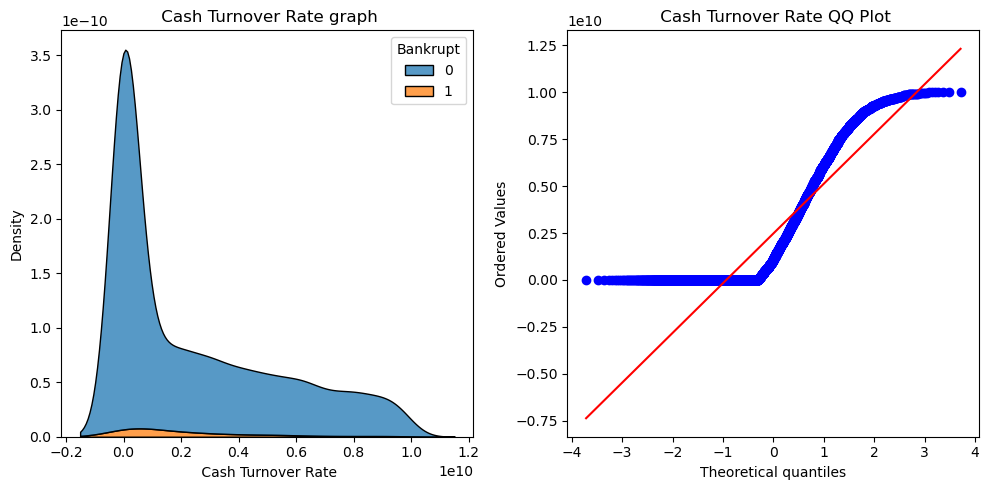

 Cash Flow to Sales


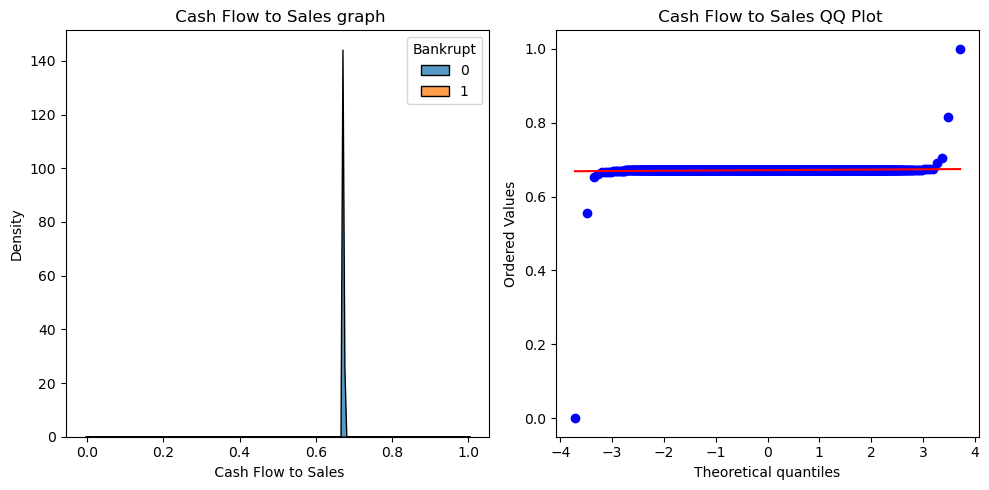

 Fixed Assets to Assets


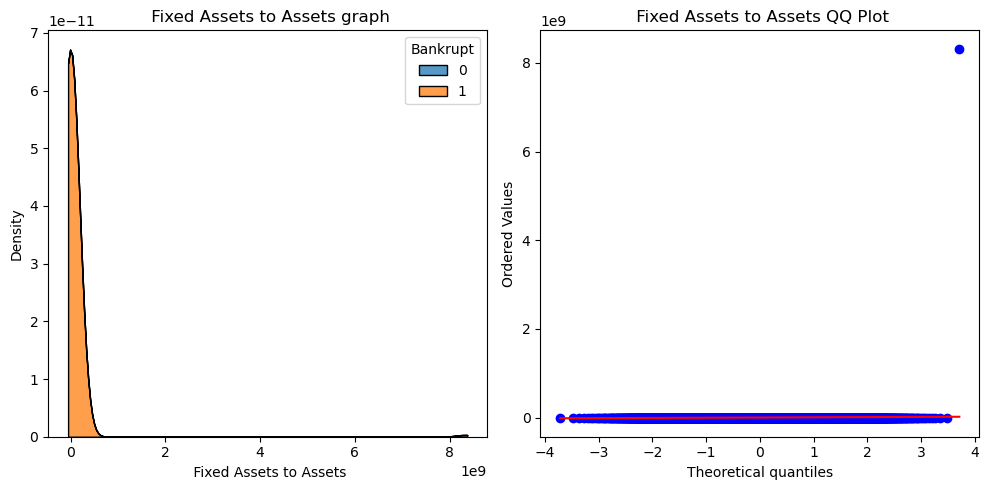

 Current Liability to Liability


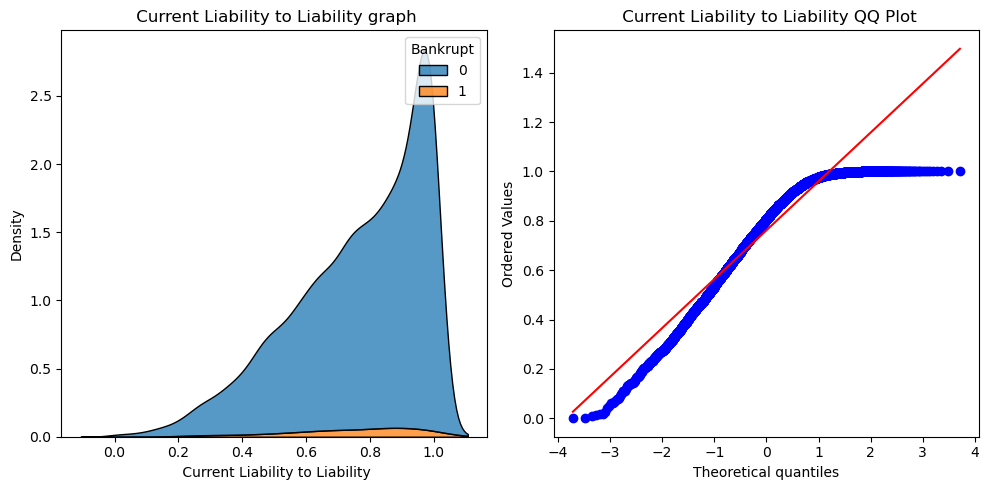

 Current Liability to Equity


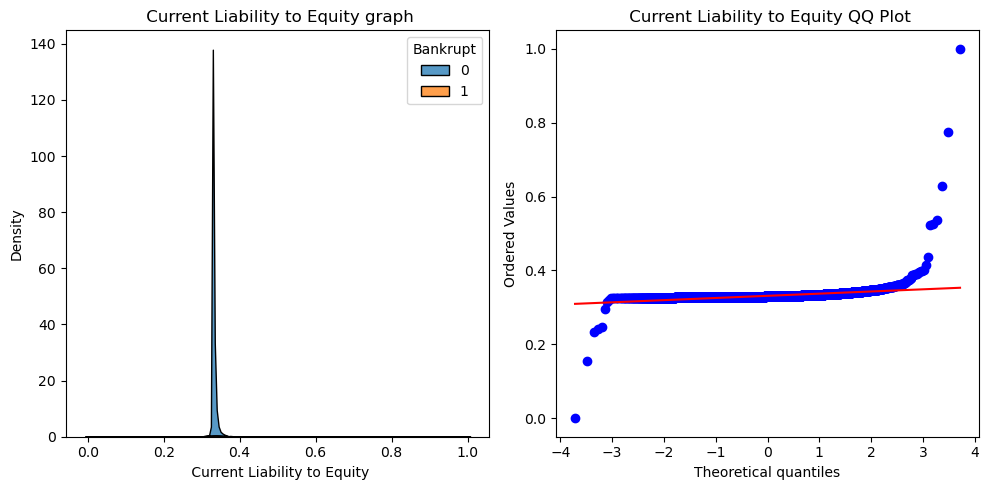

 Equity to Long-term Liability


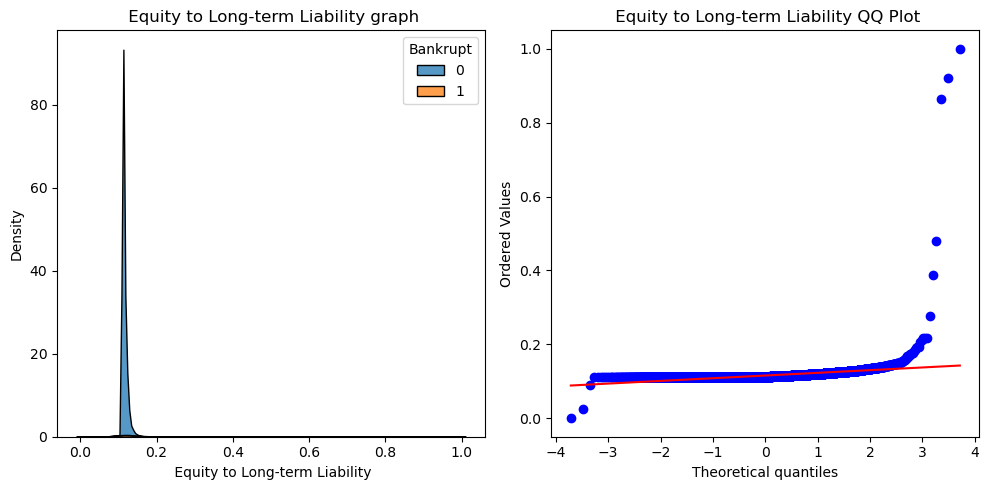

 Cash Flow to Total Assets


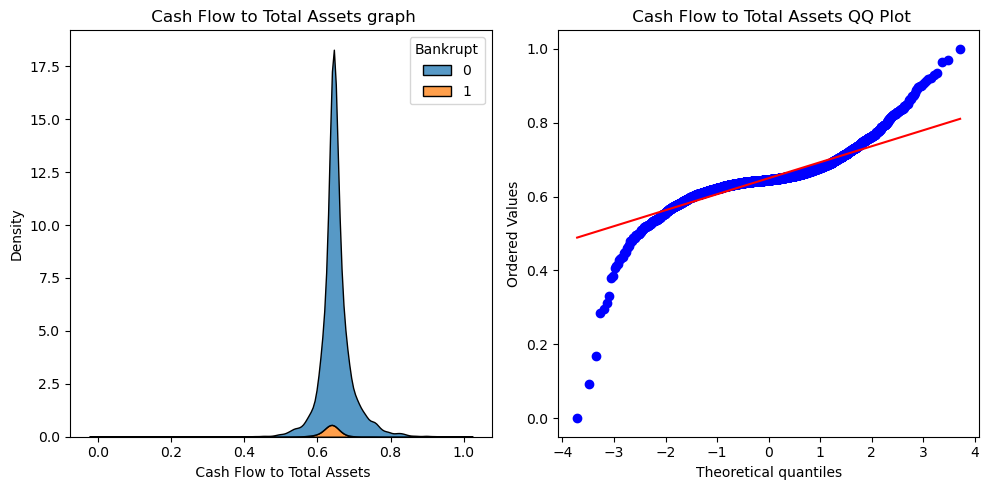

 Cash Flow to Liability


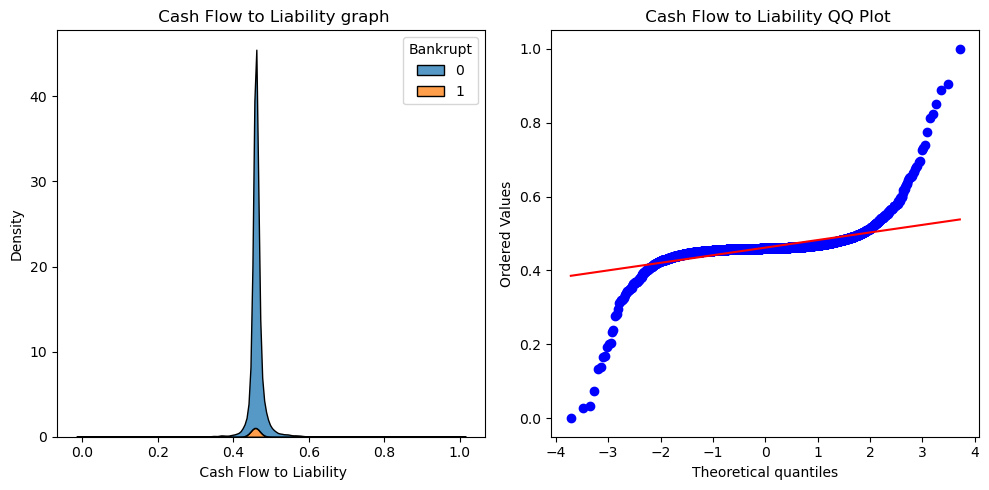

 CFO to Assets


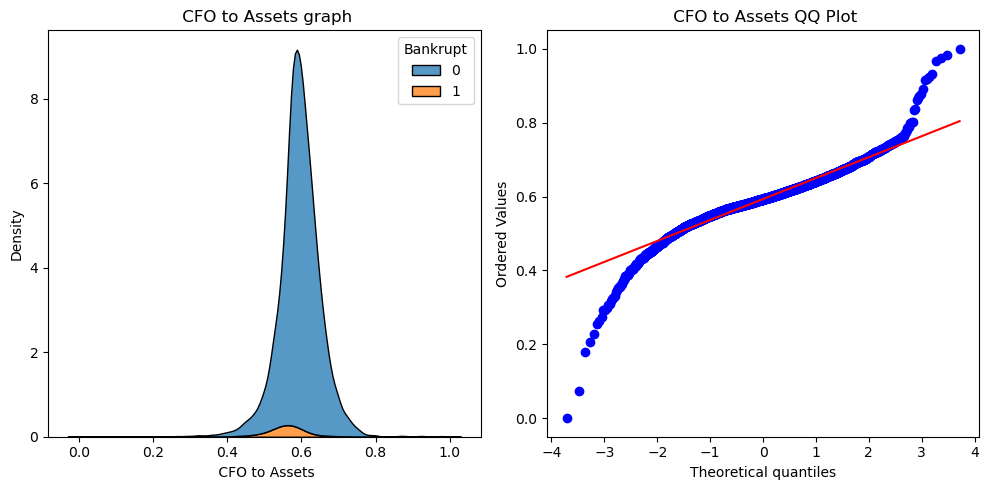

 Cash Flow to Equity


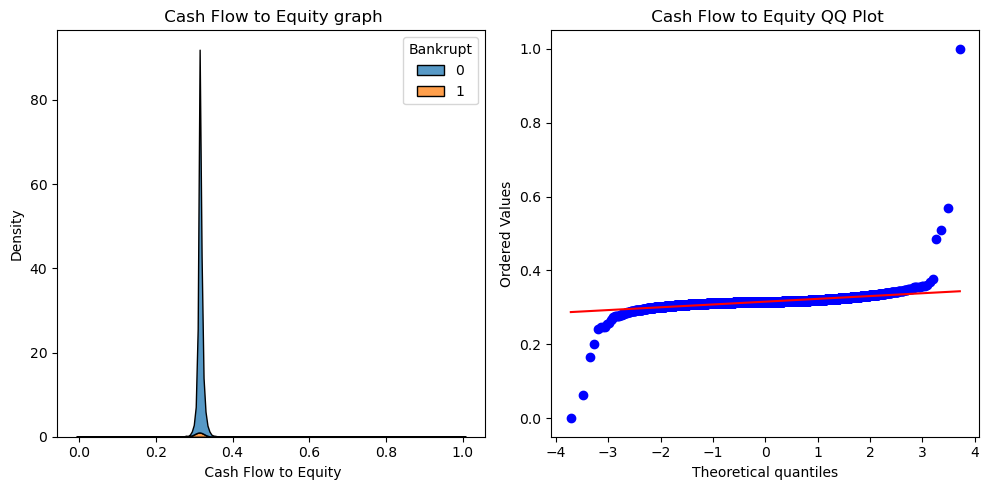

 Current Liability to Current Assets


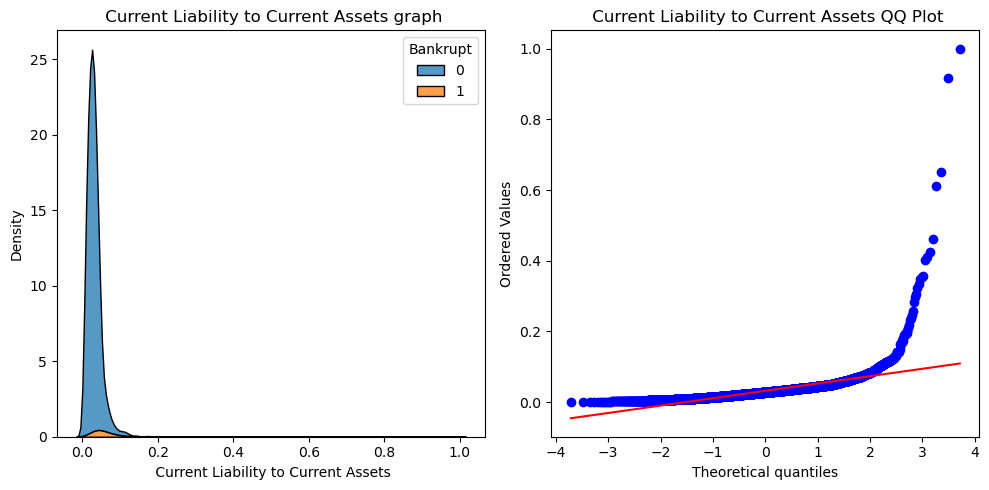

 Liability-Assets Flag


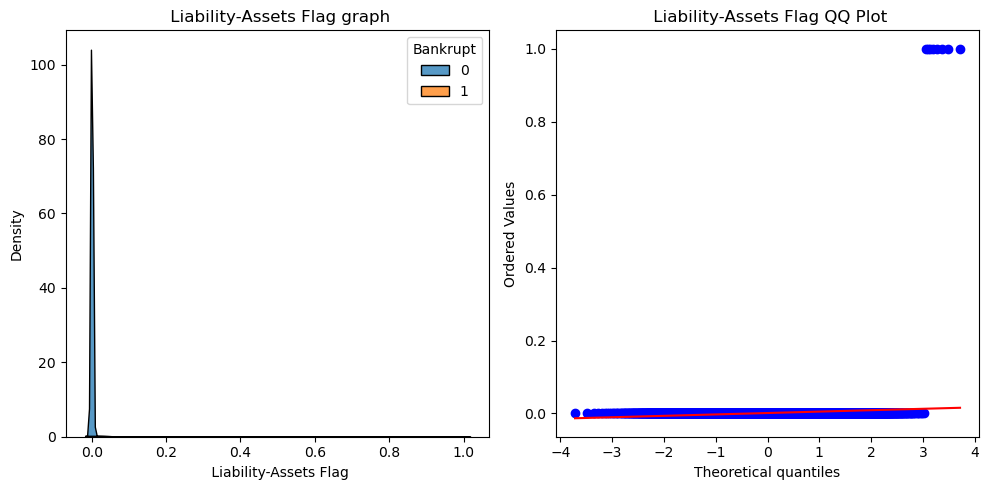

 Net Income to Total Assets


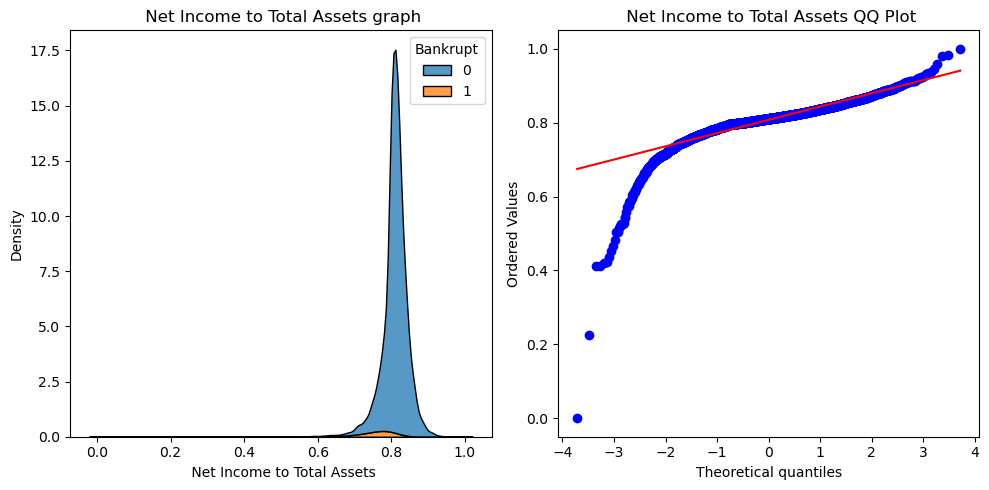

 Total assets to GNP price


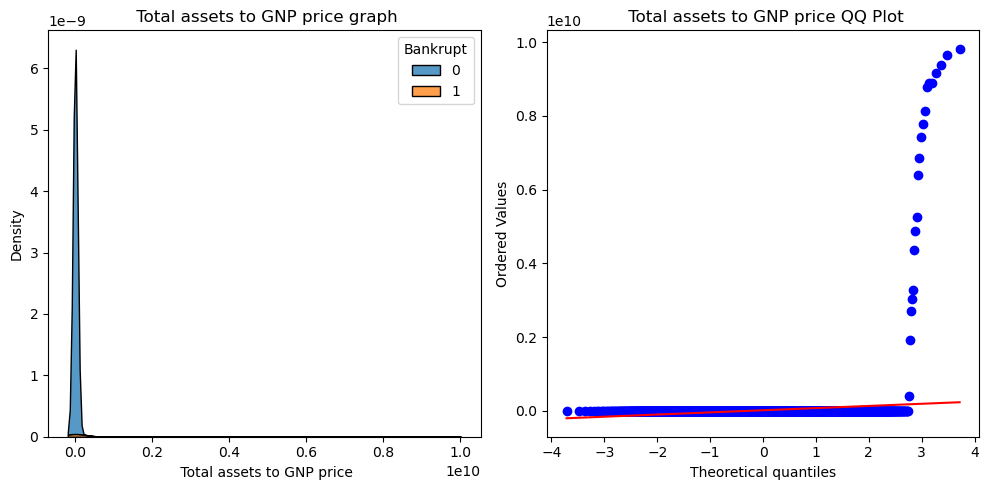

 No-credit Interval


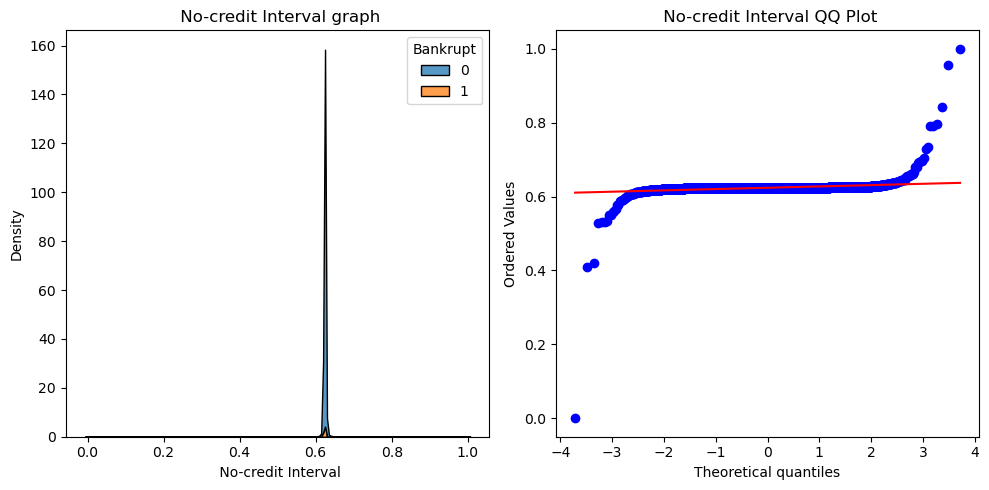

 Gross Profit to Sales


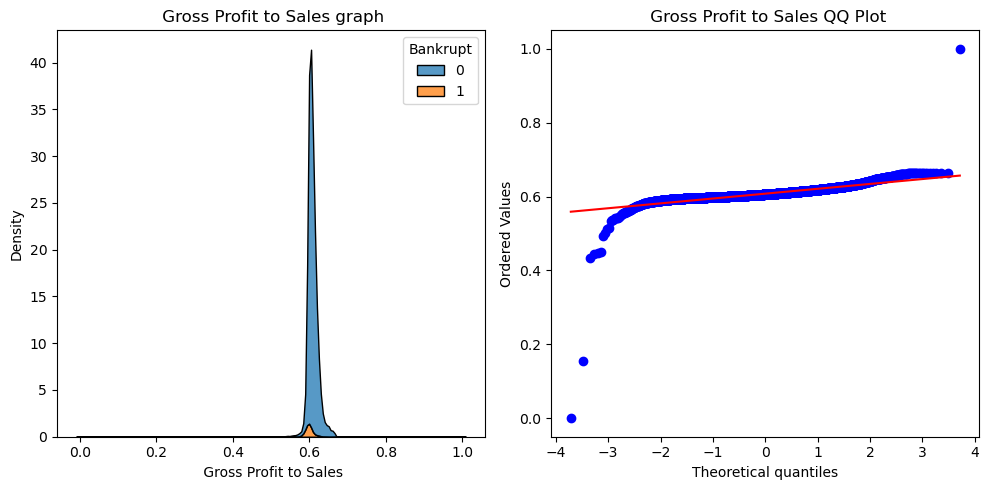

 Net Income to Stockholder's Equity


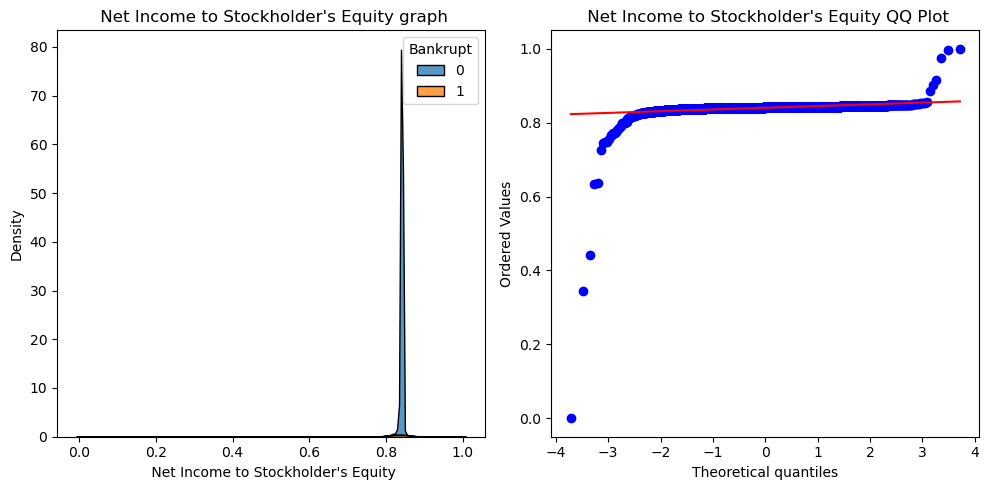

 Liability to Equity


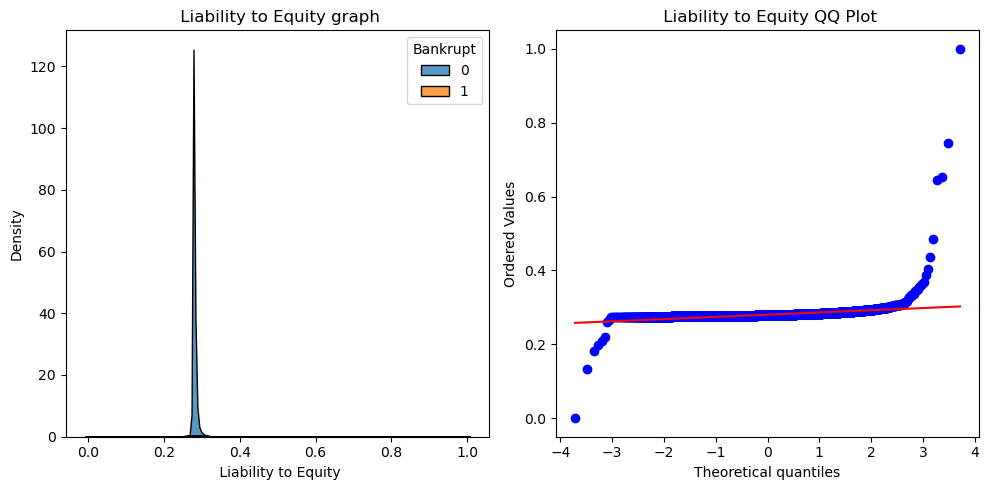

 Degree of Financial Leverage (DFL)


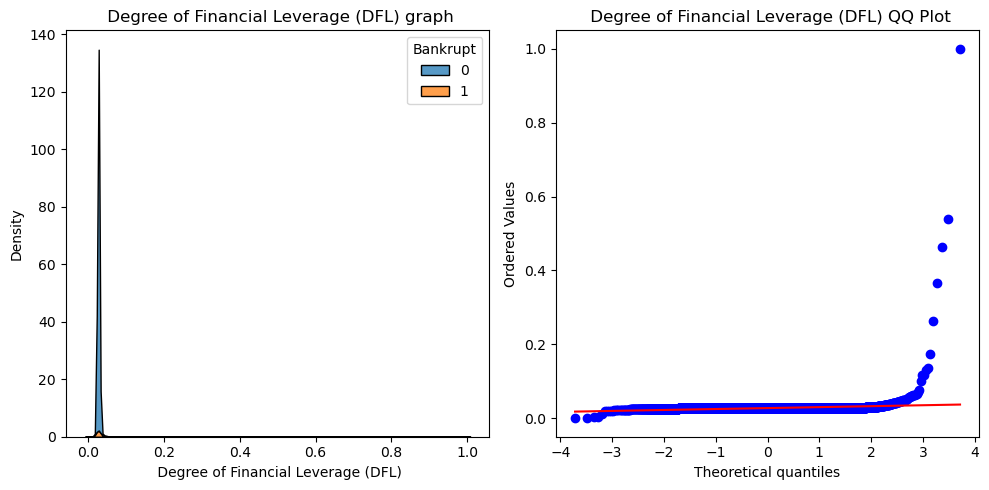

 Interest Coverage Ratio (Interest expense to EBIT)


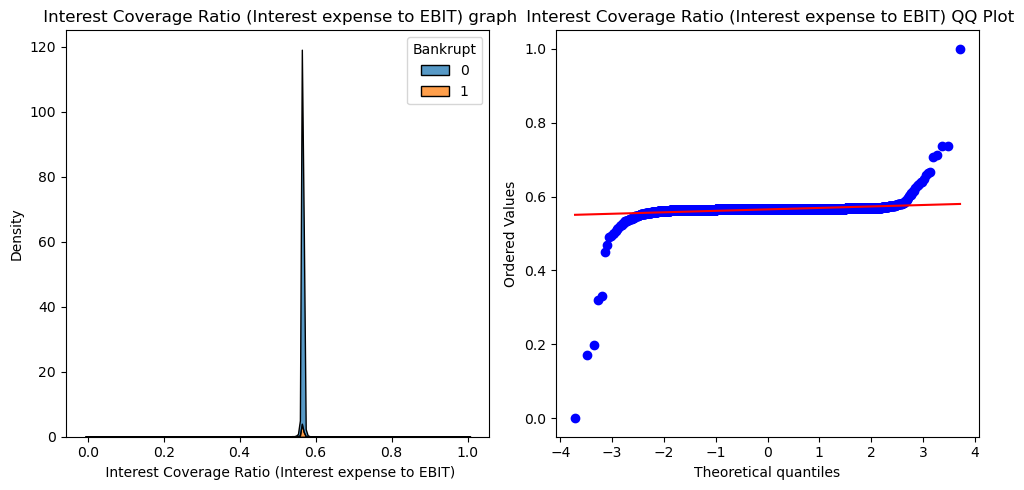

 Equity to Liability


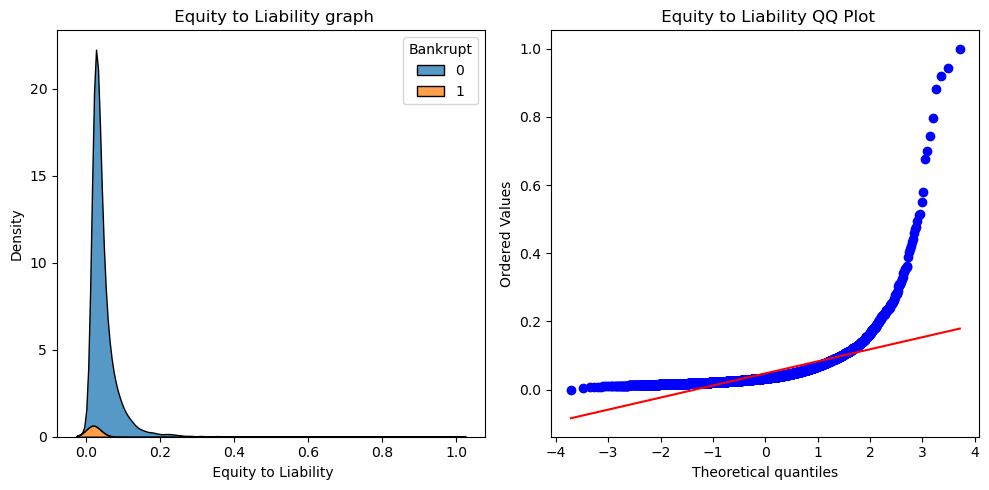

Bankrupt


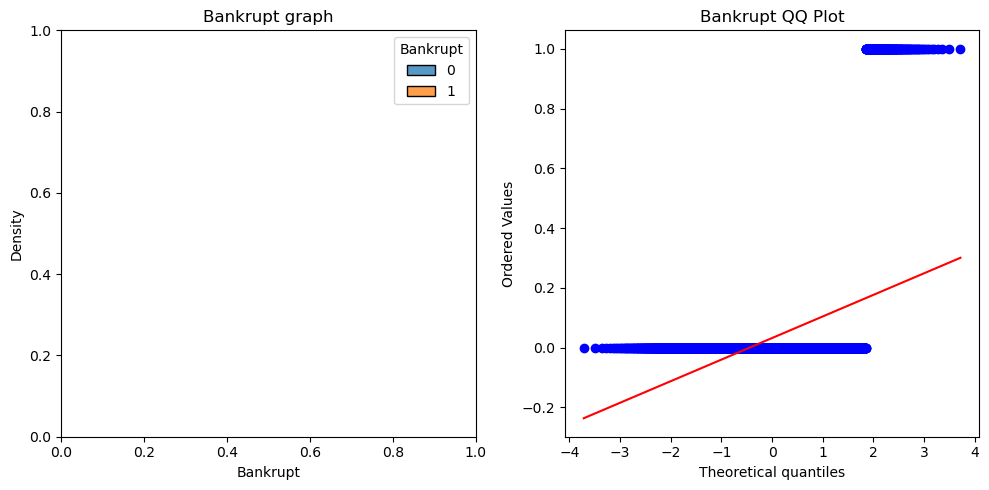

In [11]:
## Checking the distribution of each feature 
import scipy.stats as stats
for i in df.columns:
    plt.figure(figsize=(10, 5))
    print(i)
    plt.subplot(121)
    sns.kdeplot(x=i, data=df,hue='Bankrupt',multiple='stack')
   # df[i].plot(kind='hist')
    plt.title(i + ' '+ 'graph')

    plt.subplot(122)
    stats.probplot(df[i], dist='norm', plot=plt)
    plt.title(i + ' '+ "QQ Plot")
    plt.tight_layout()
    plt.show()

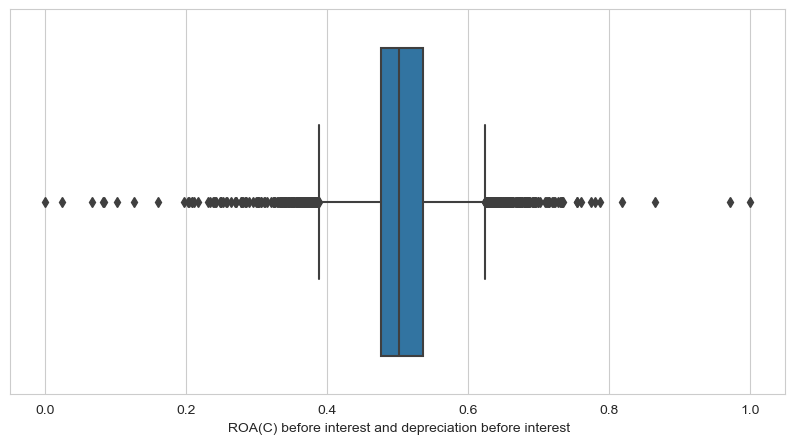

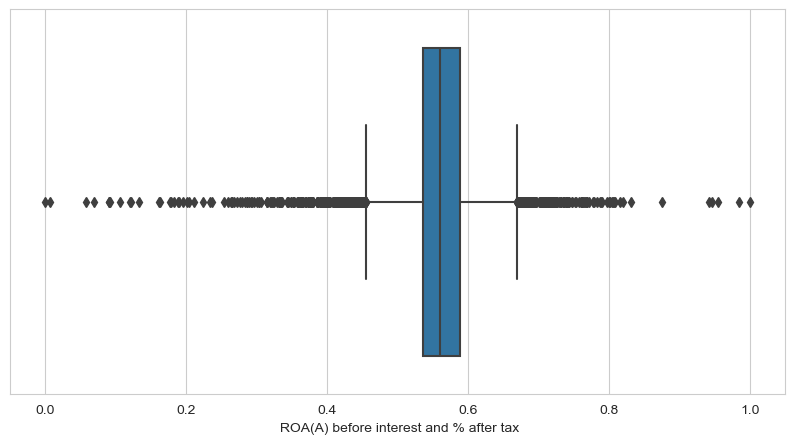

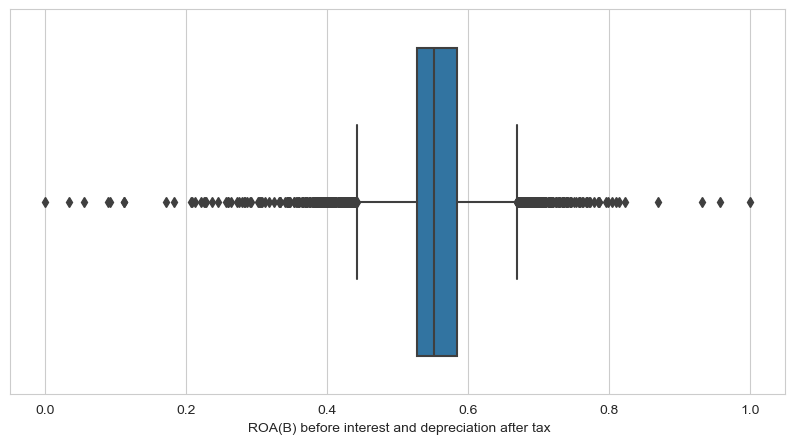

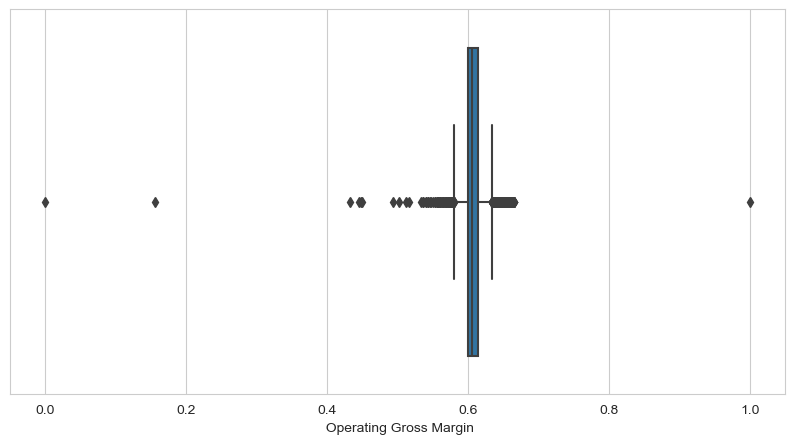

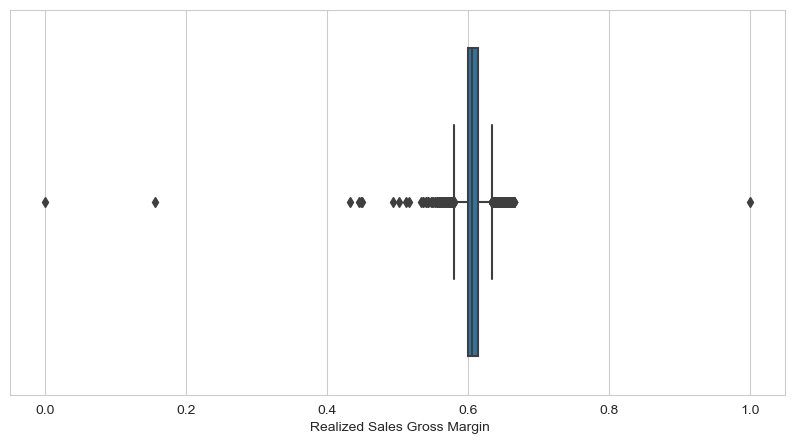

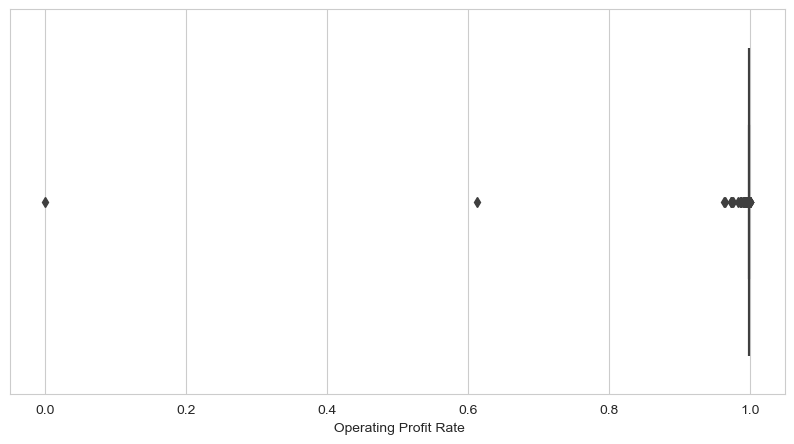

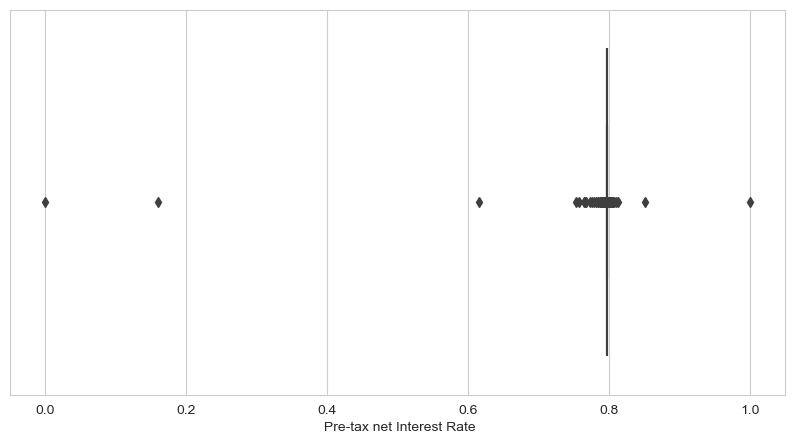

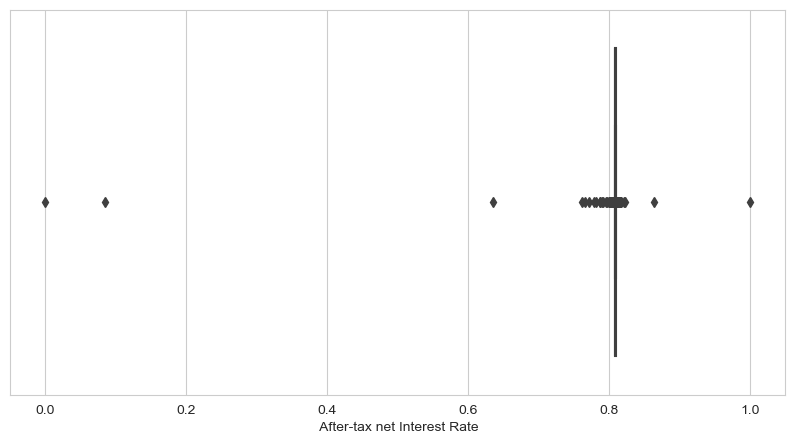

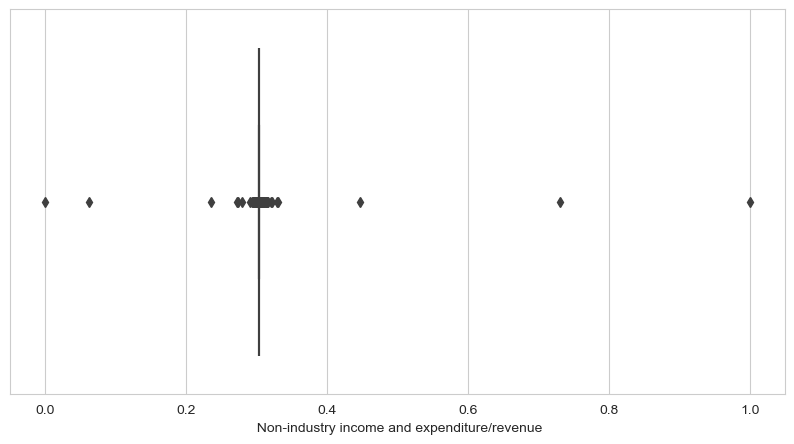

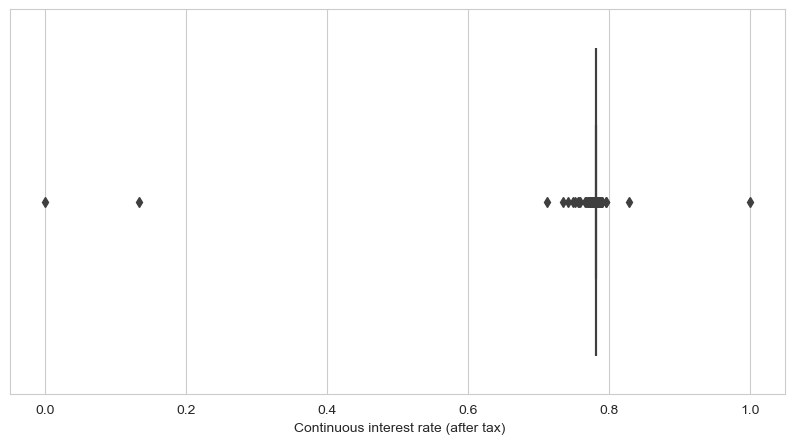

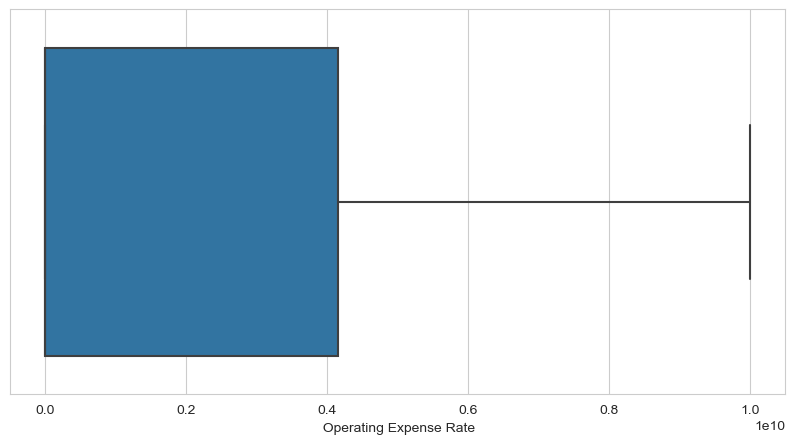

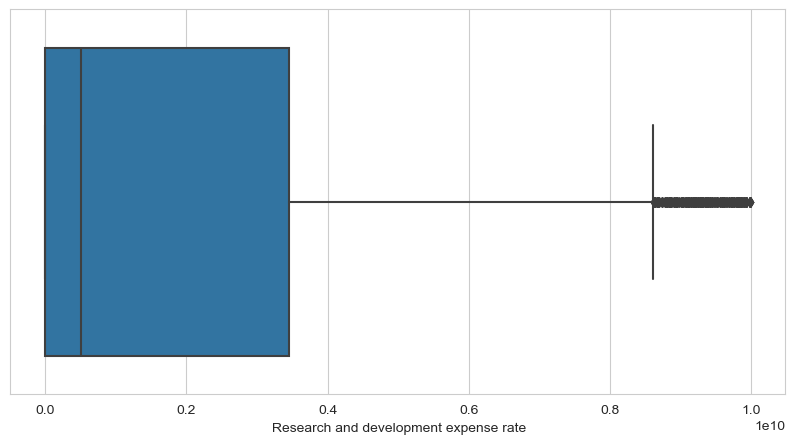

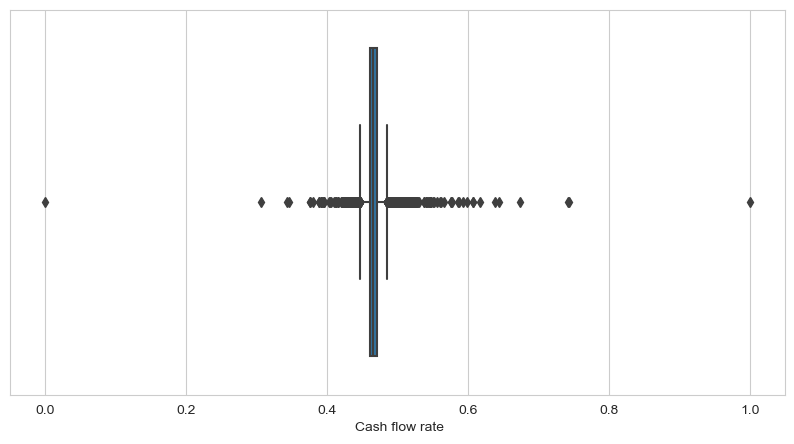

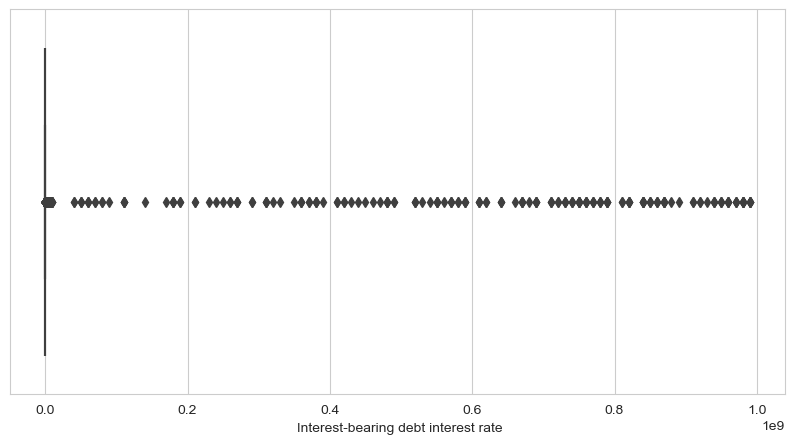

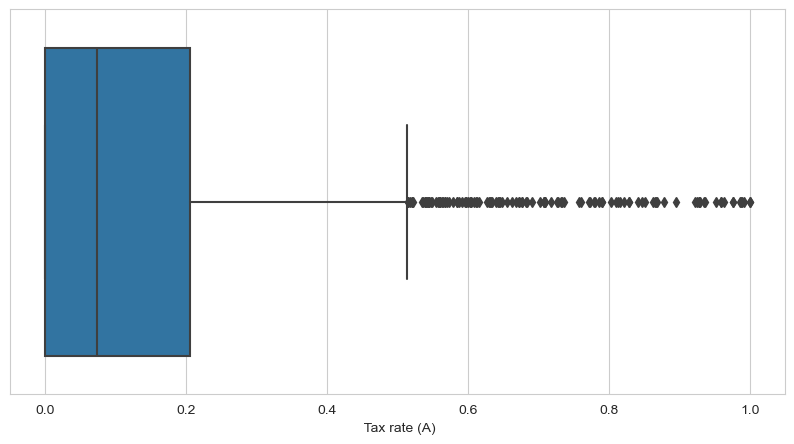

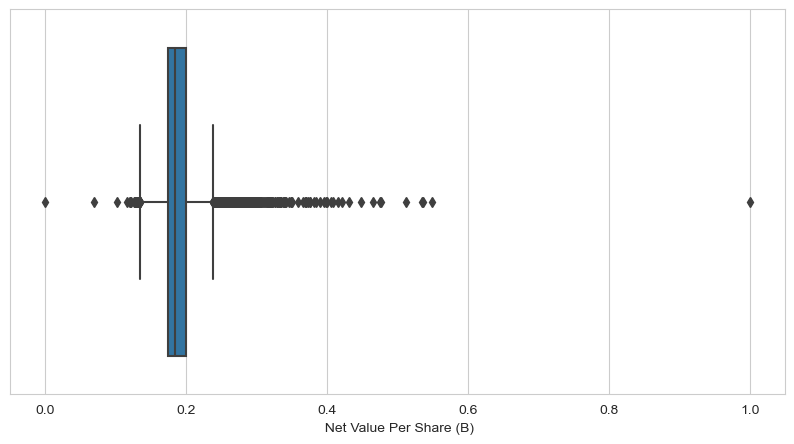

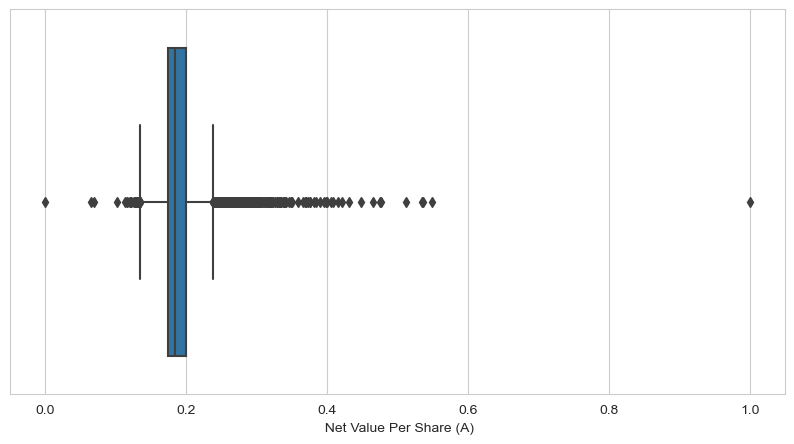

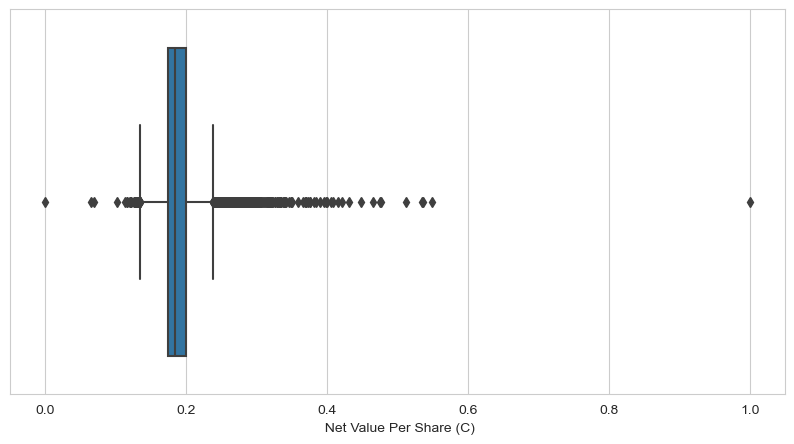

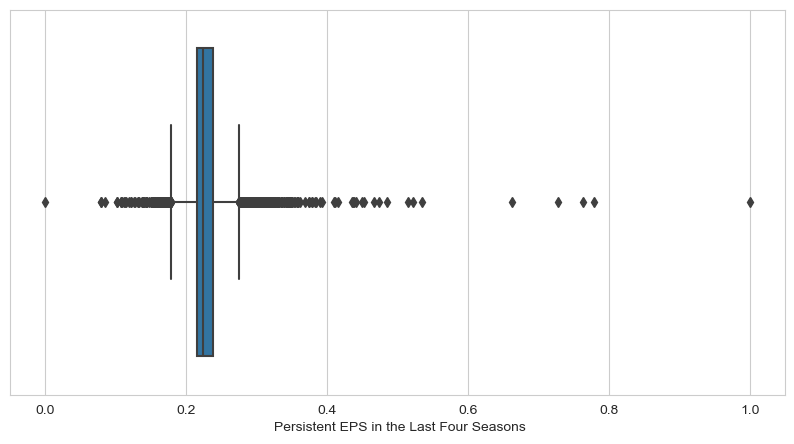

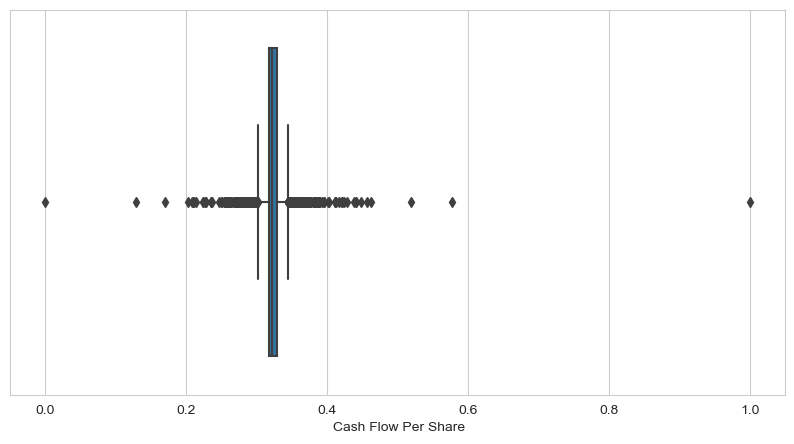

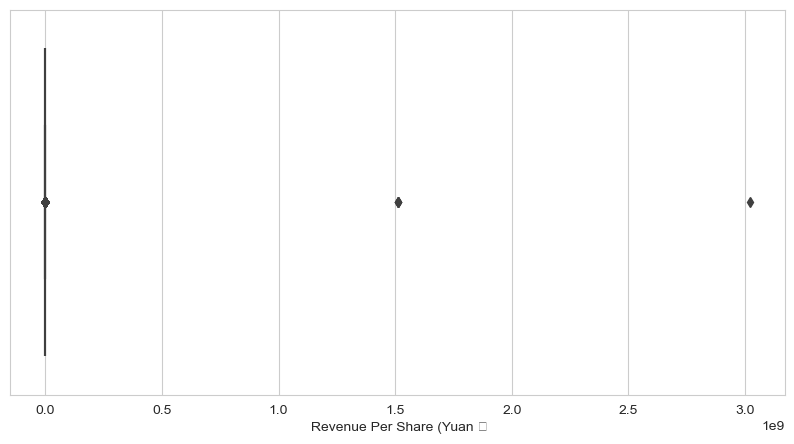

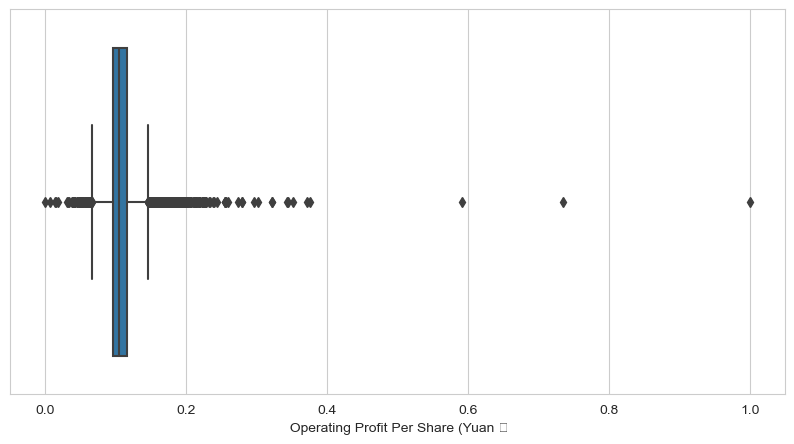

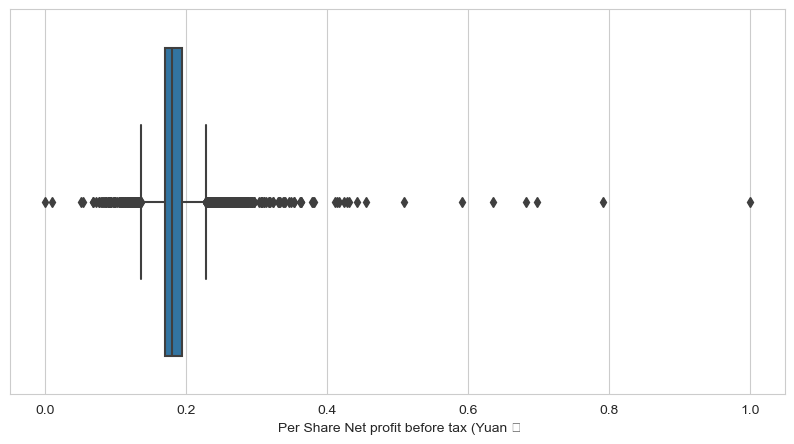

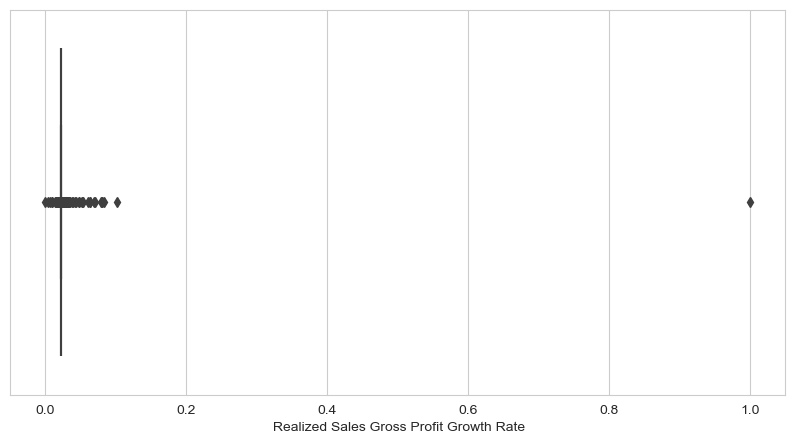

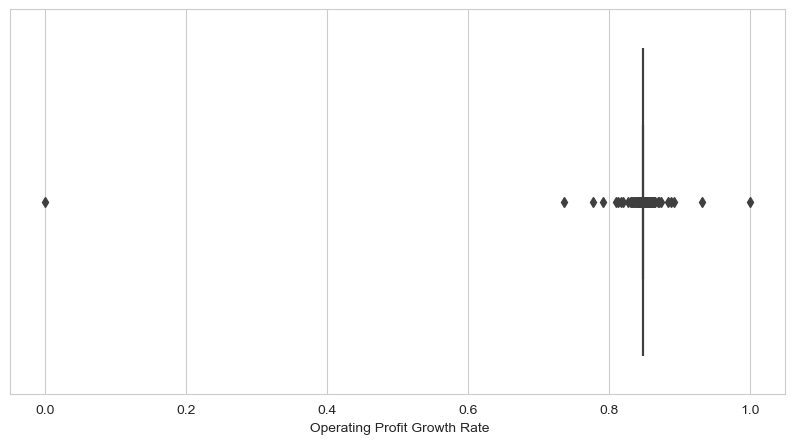

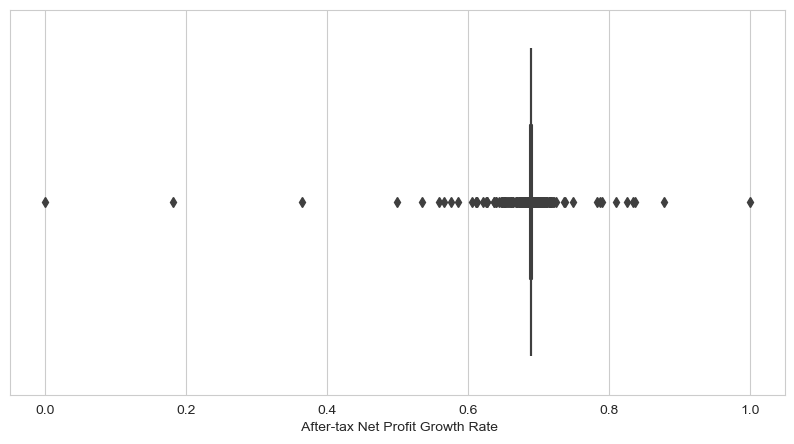

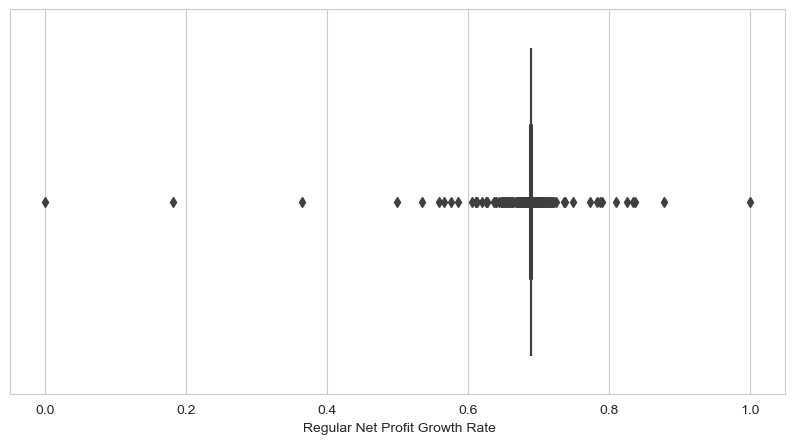

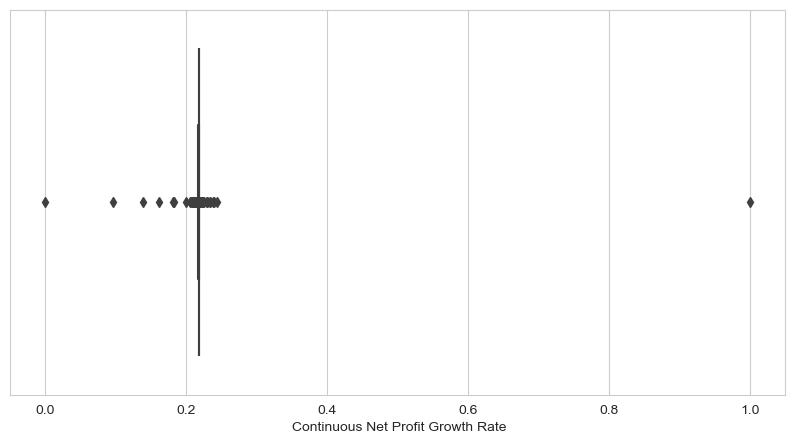

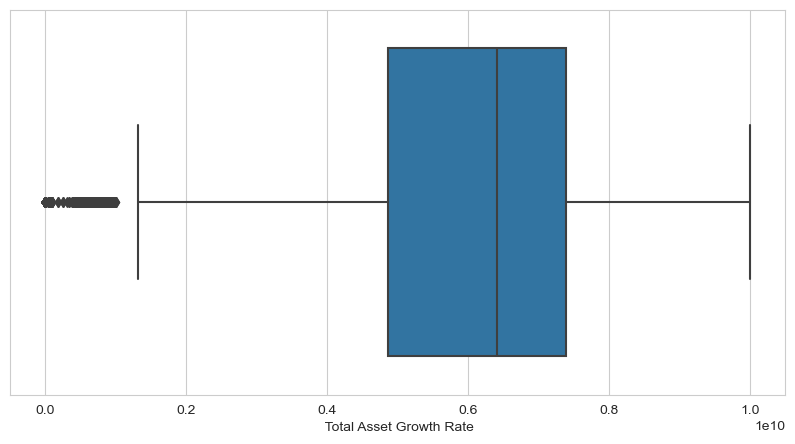

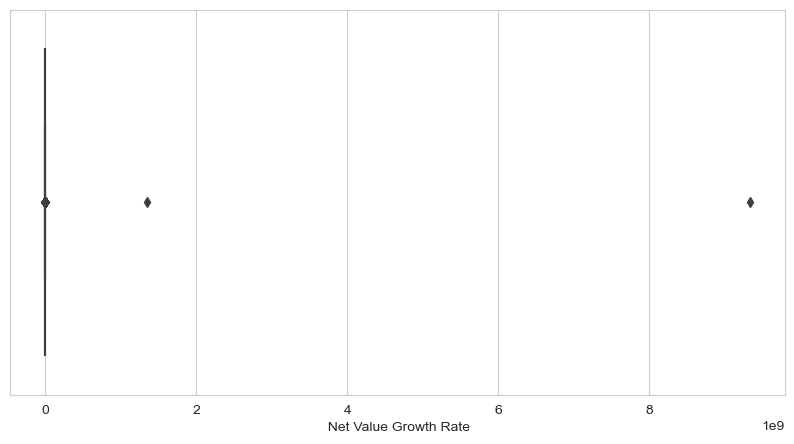

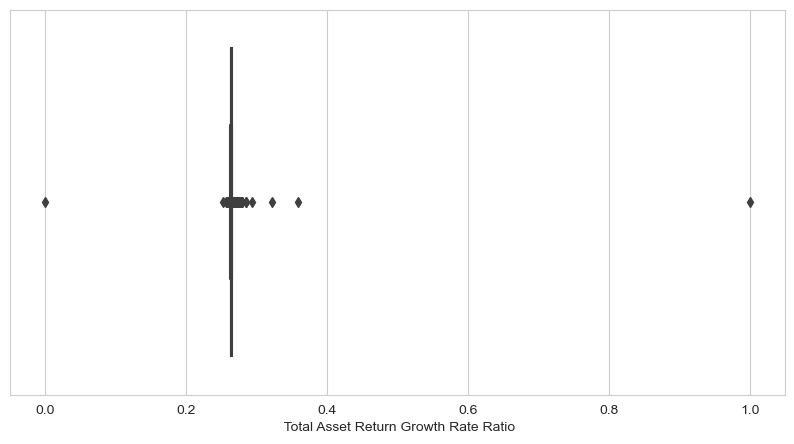

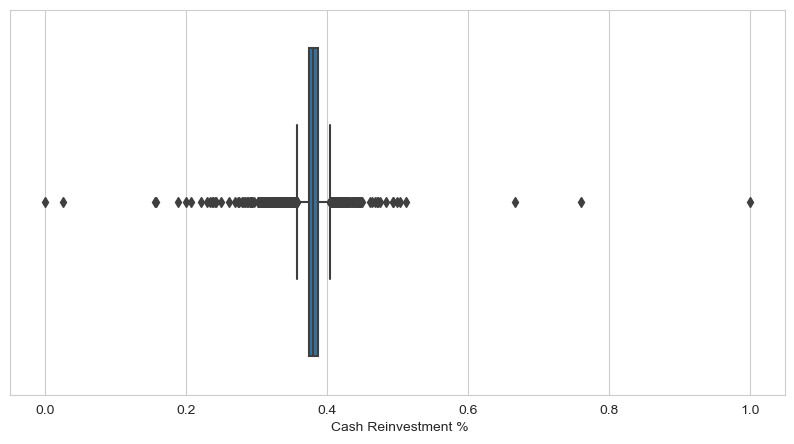

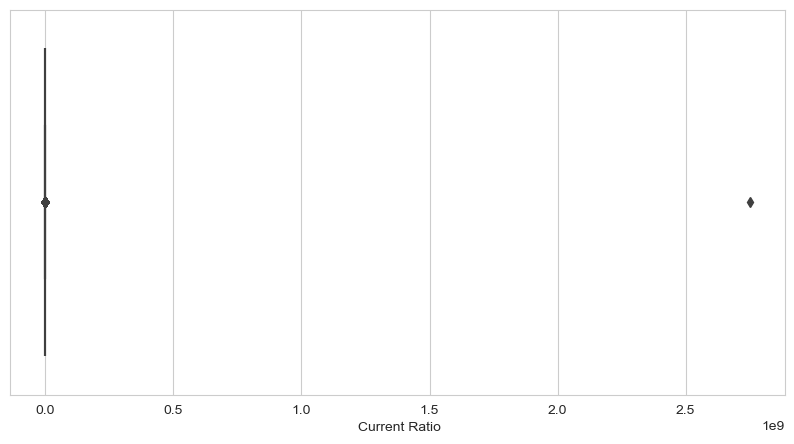

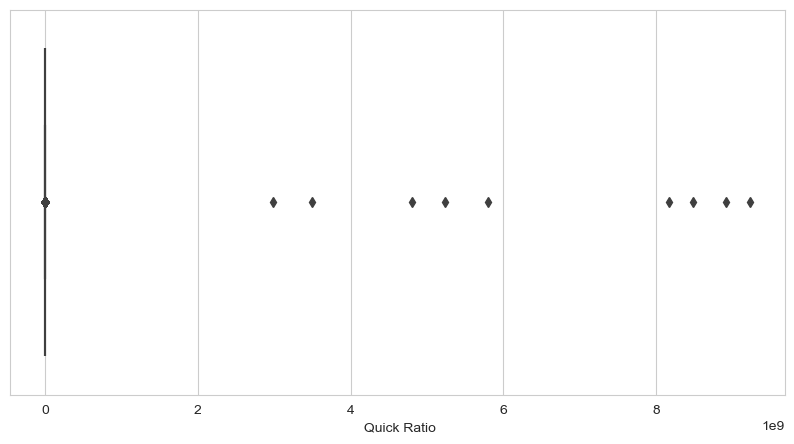

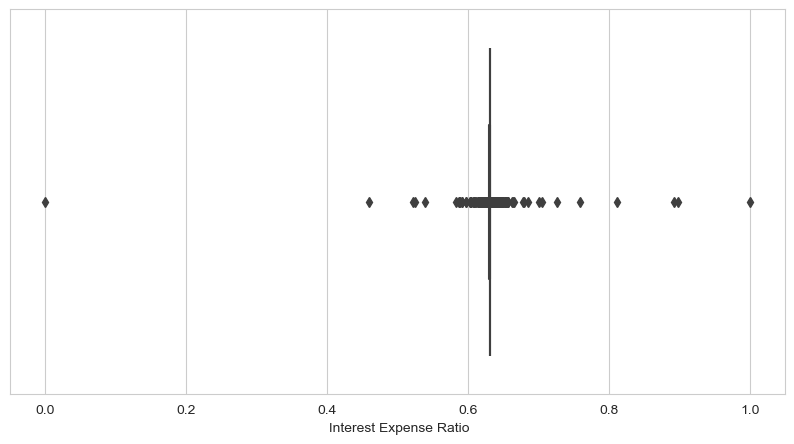

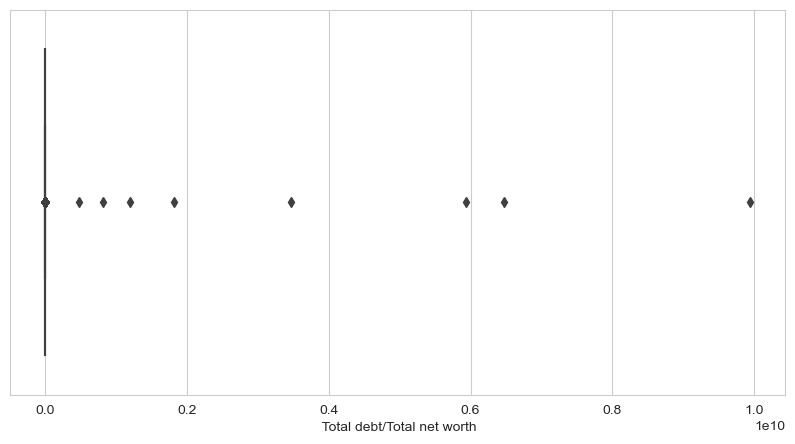

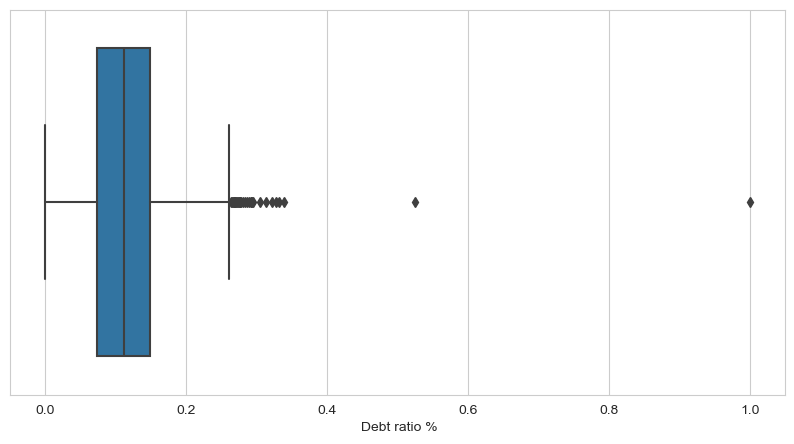

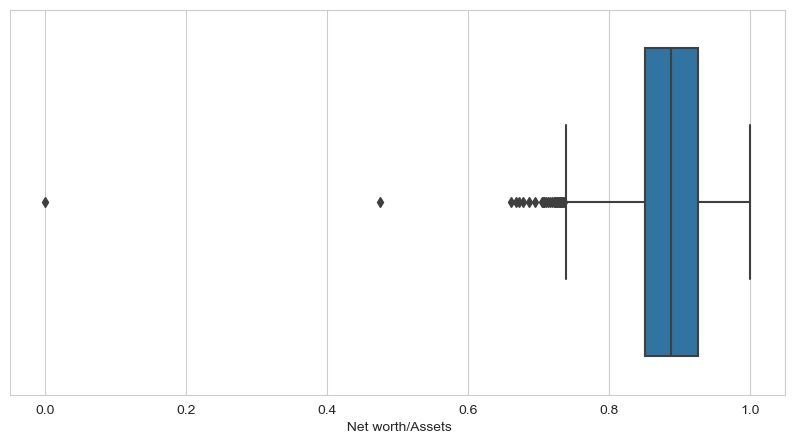

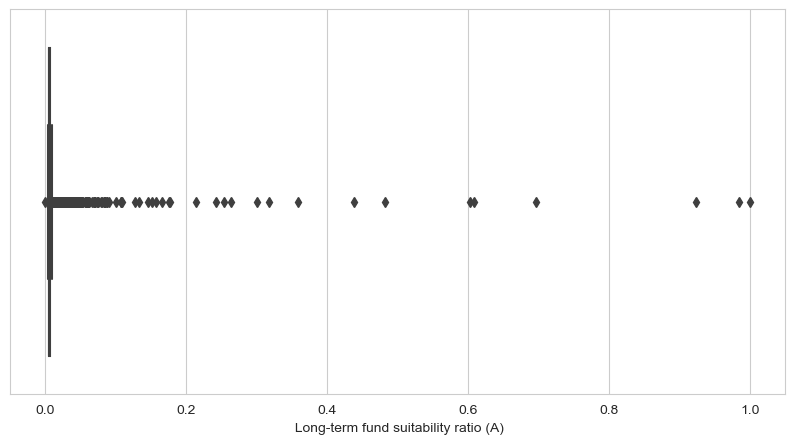

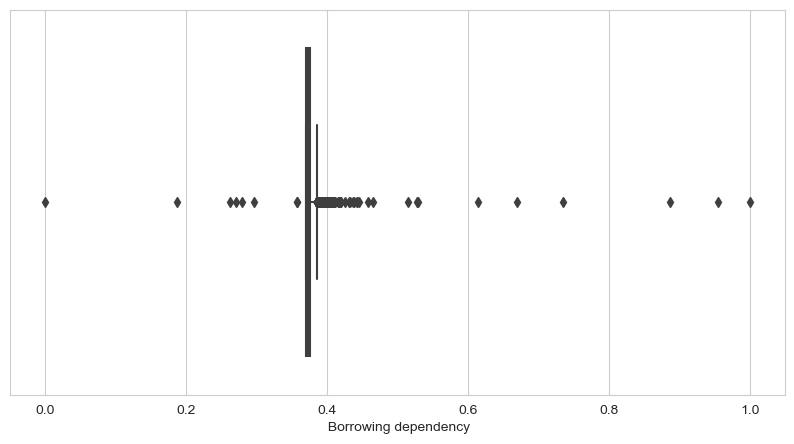

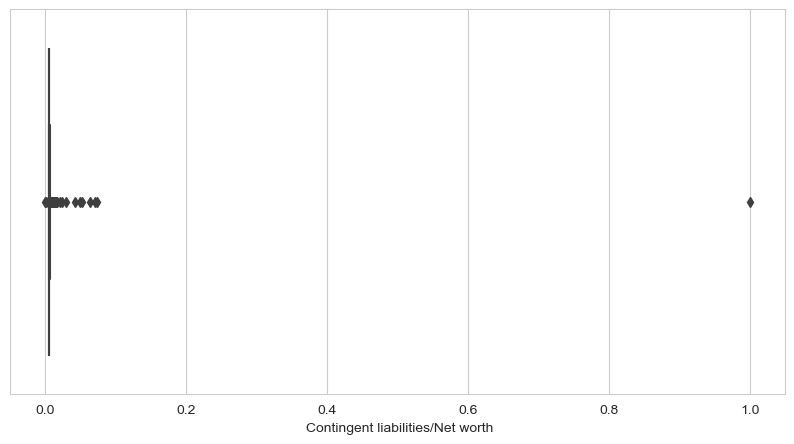

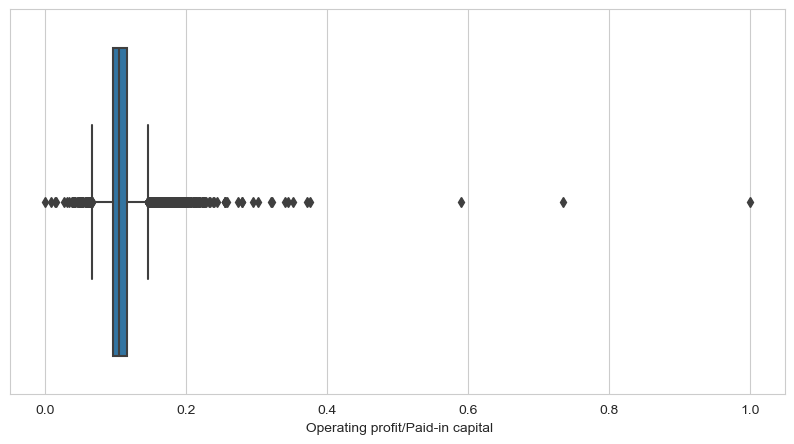

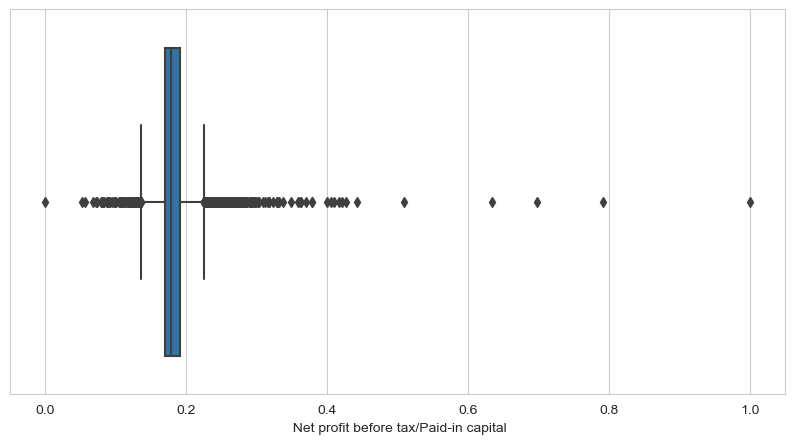

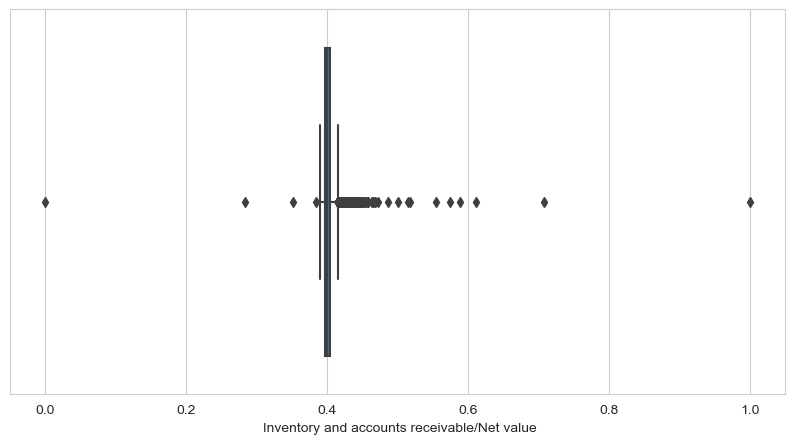

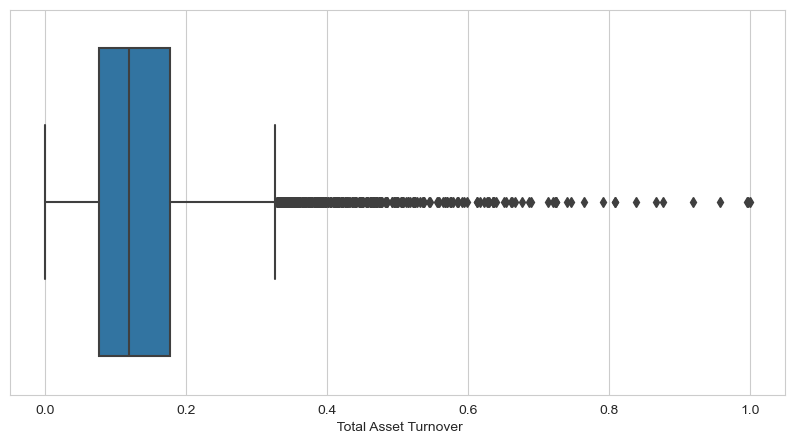

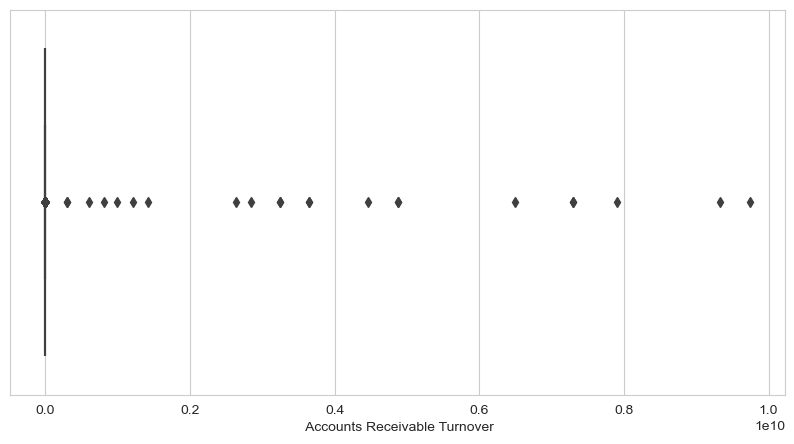

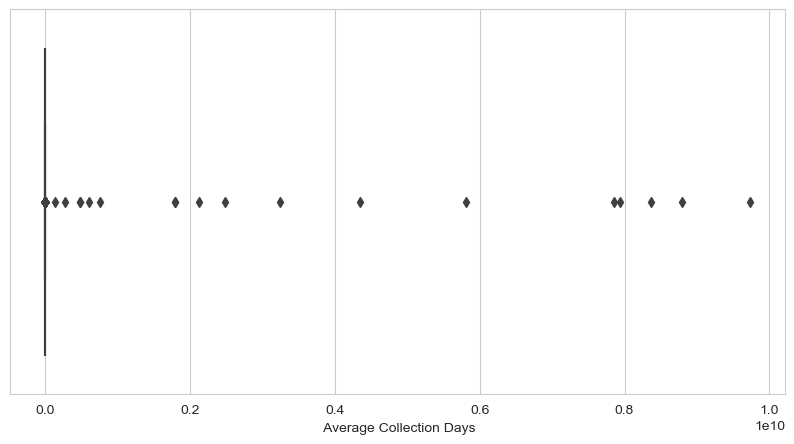

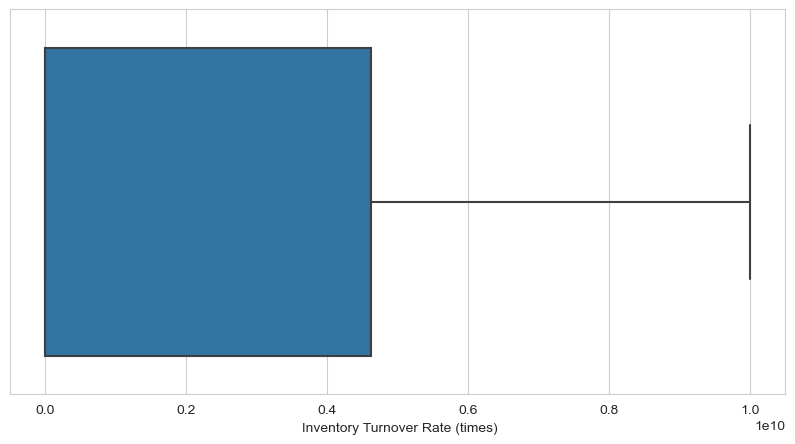

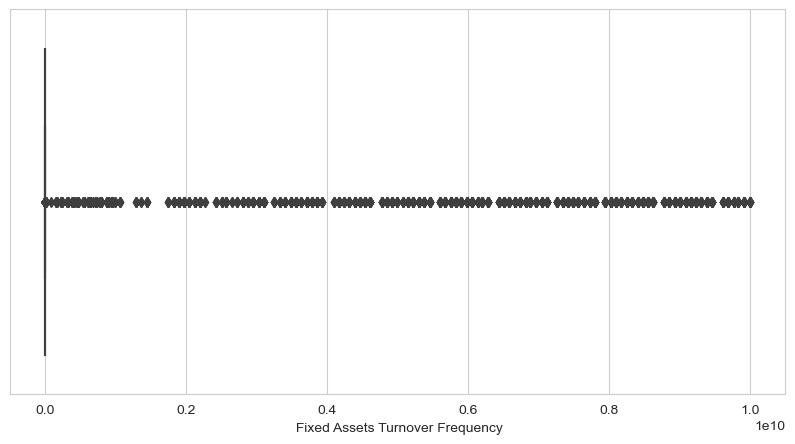

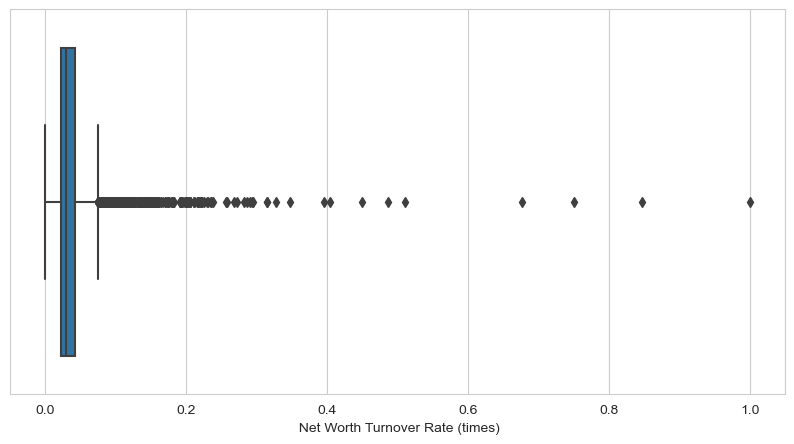

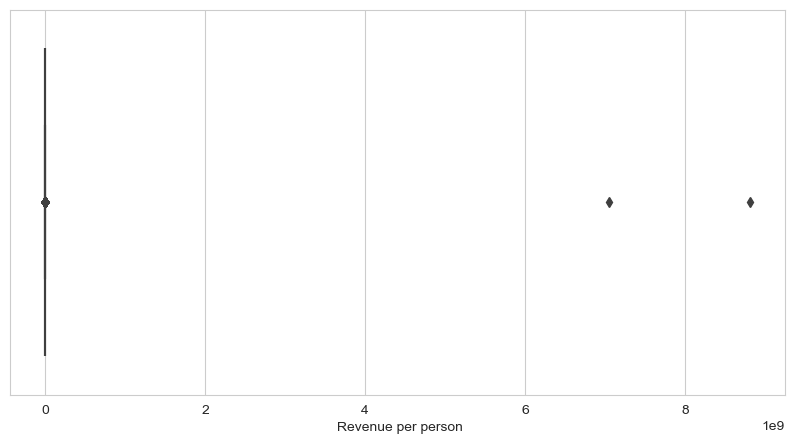

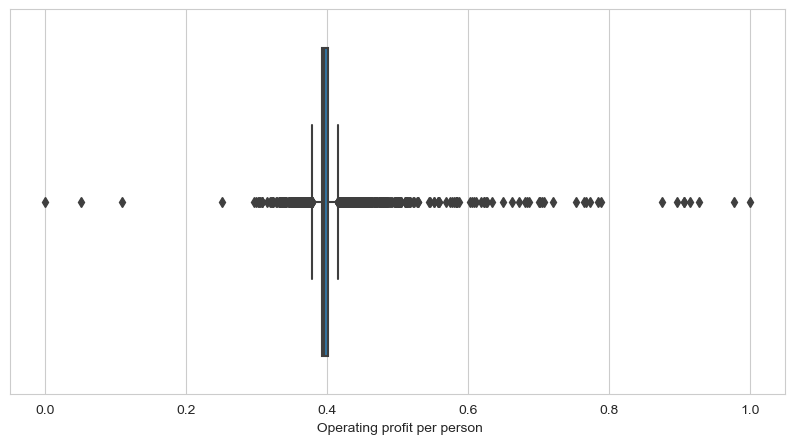

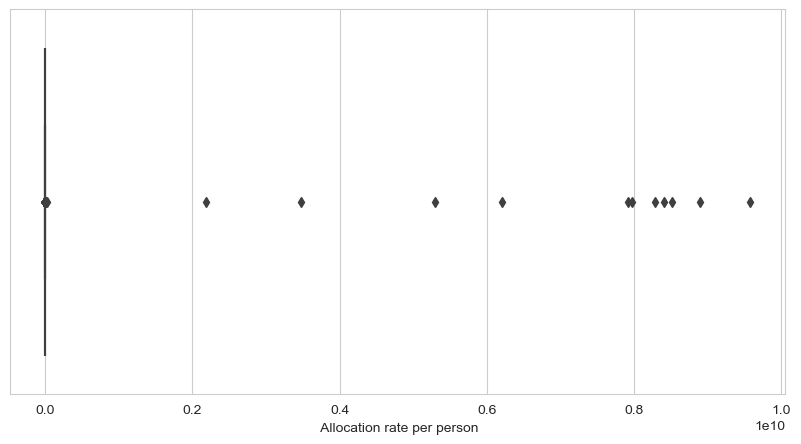

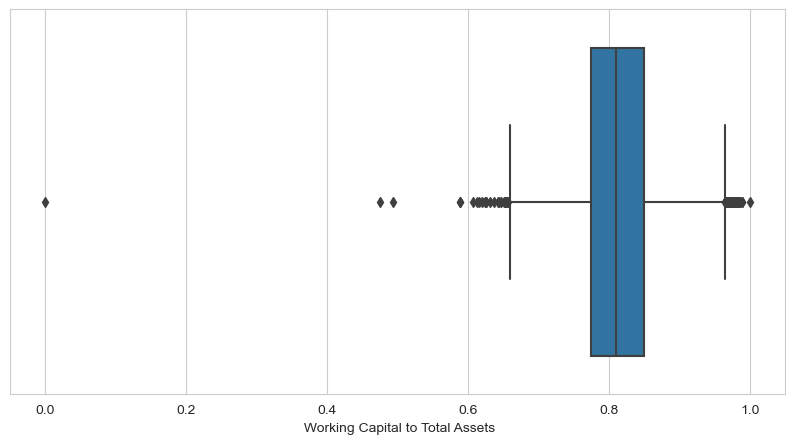

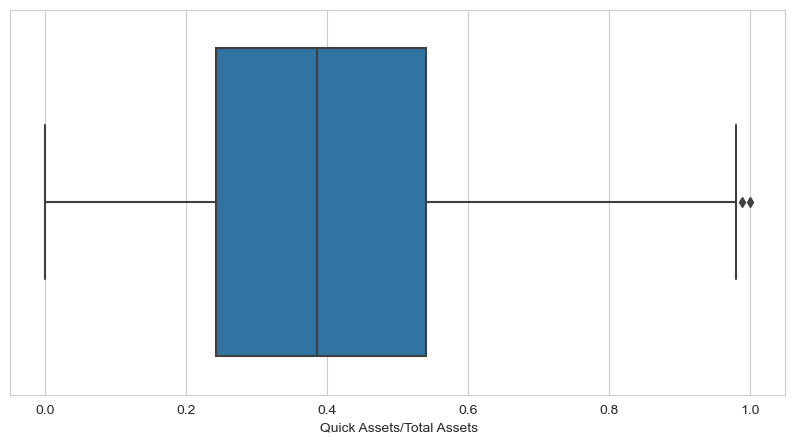

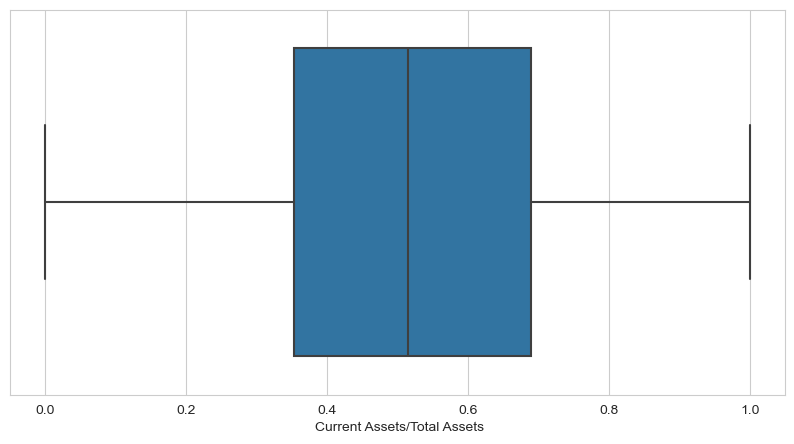

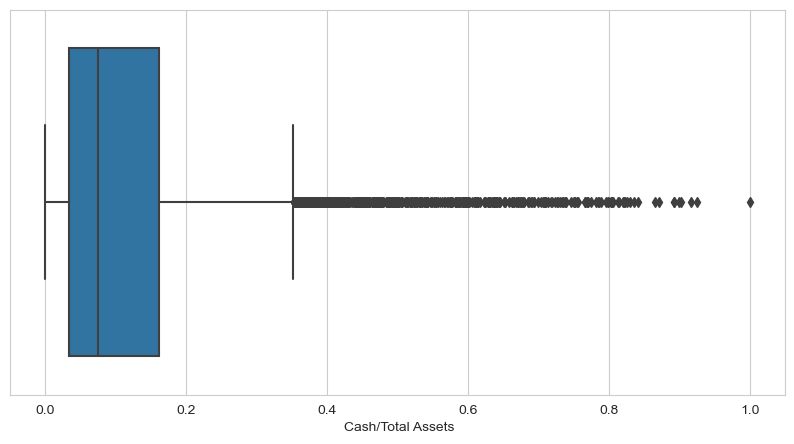

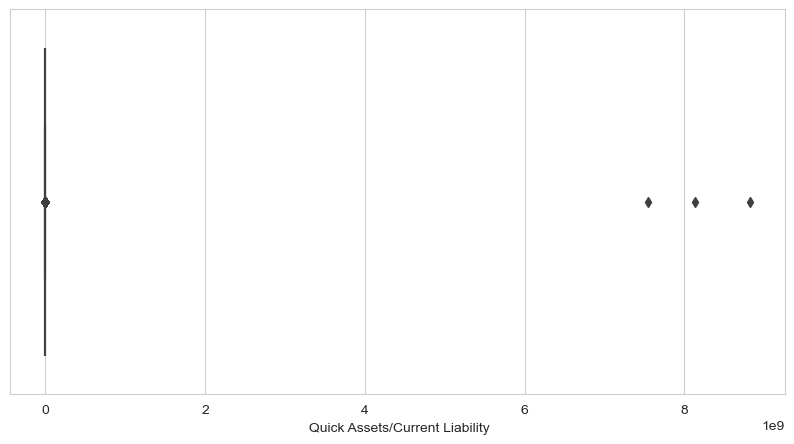

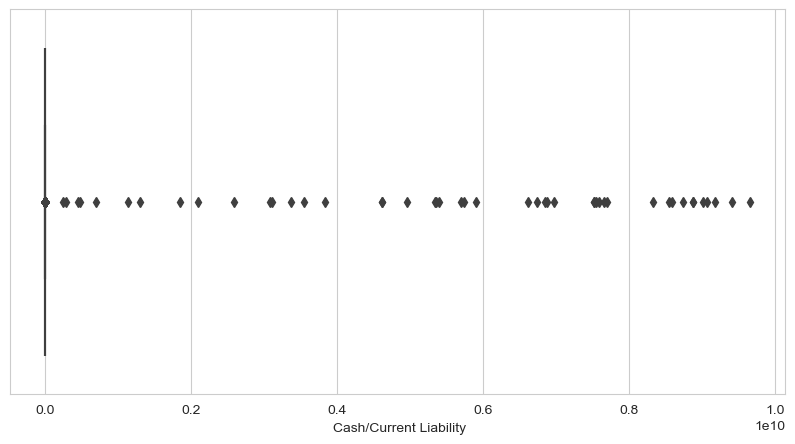

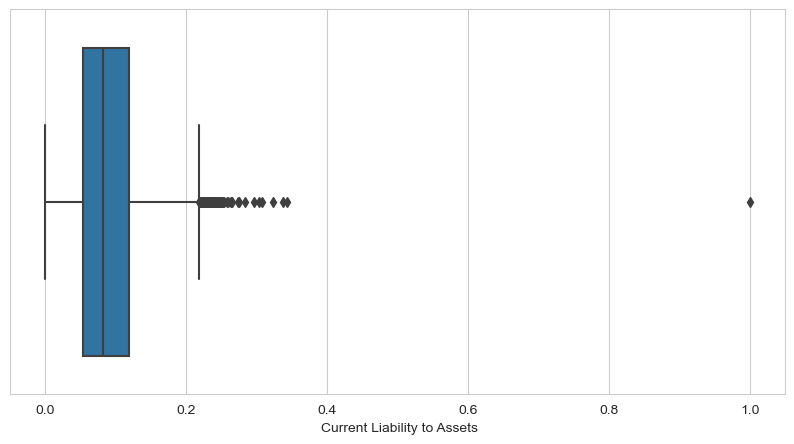

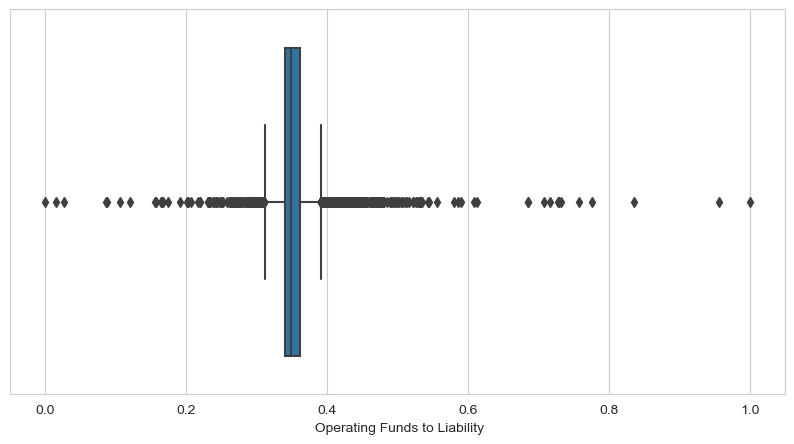

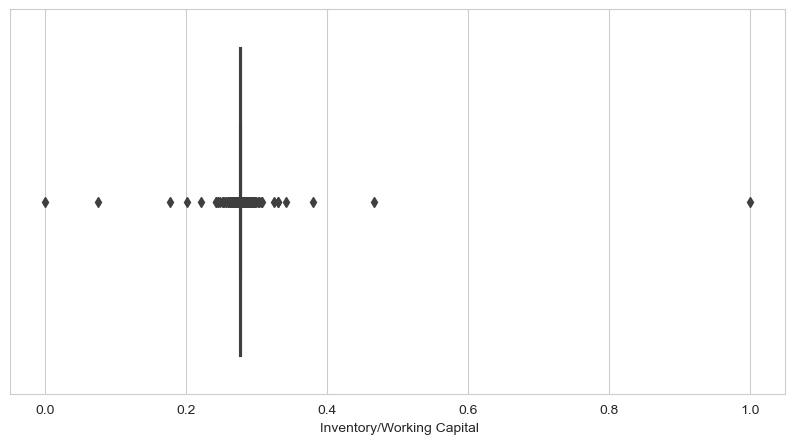

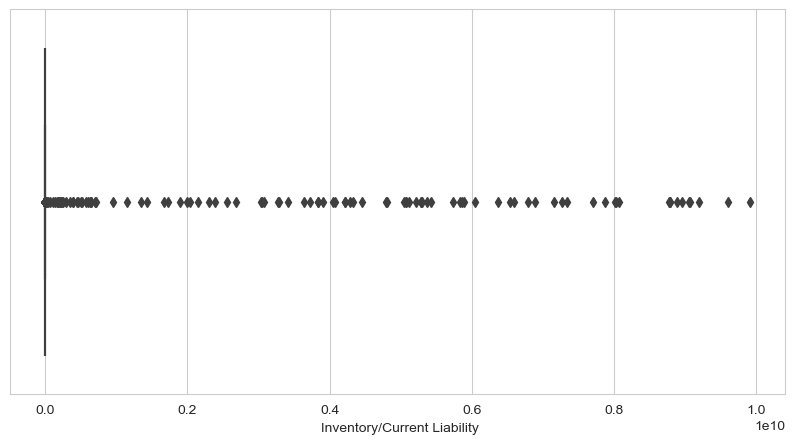

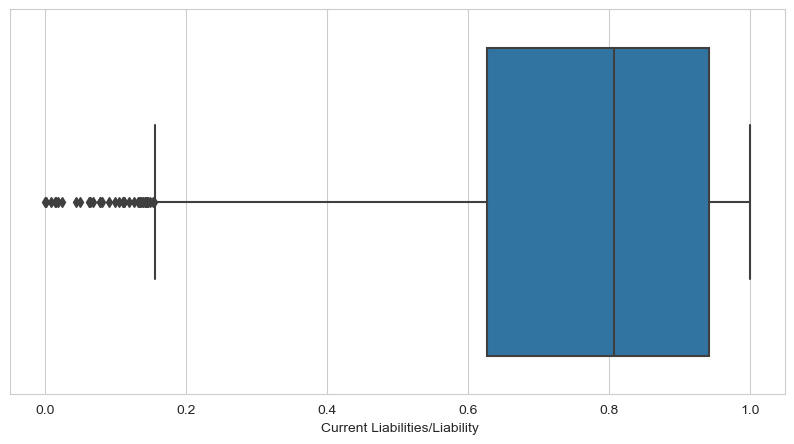

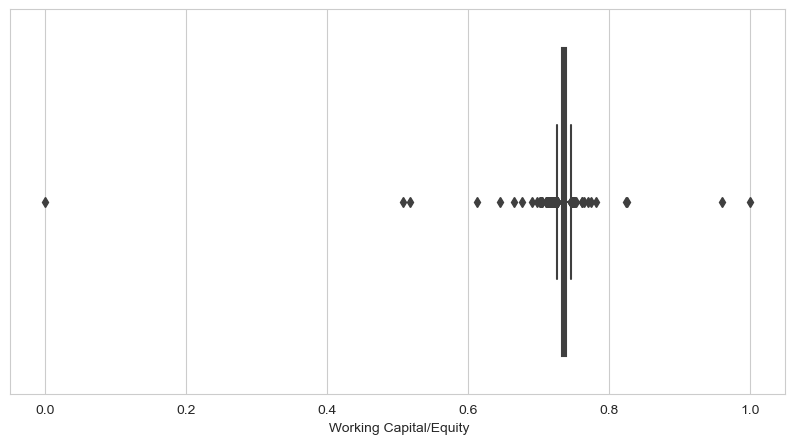

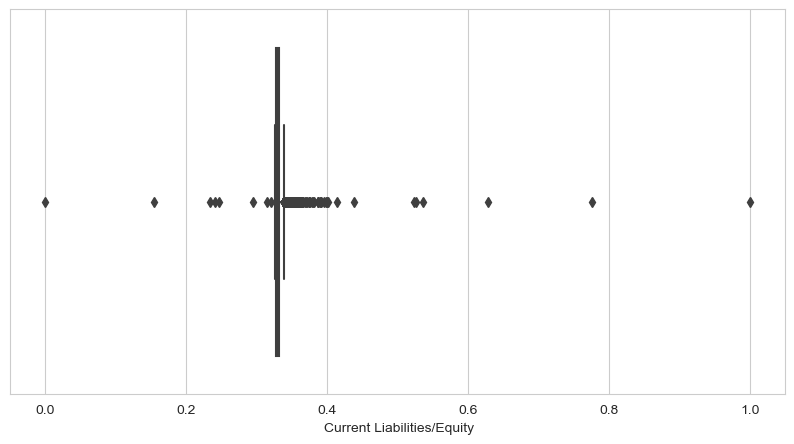

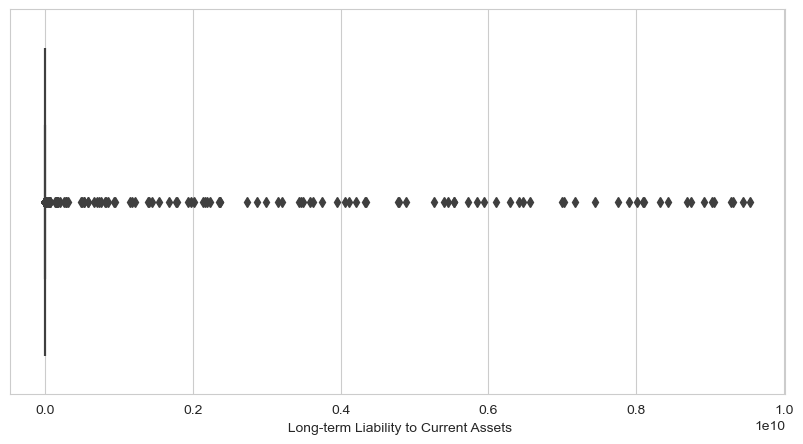

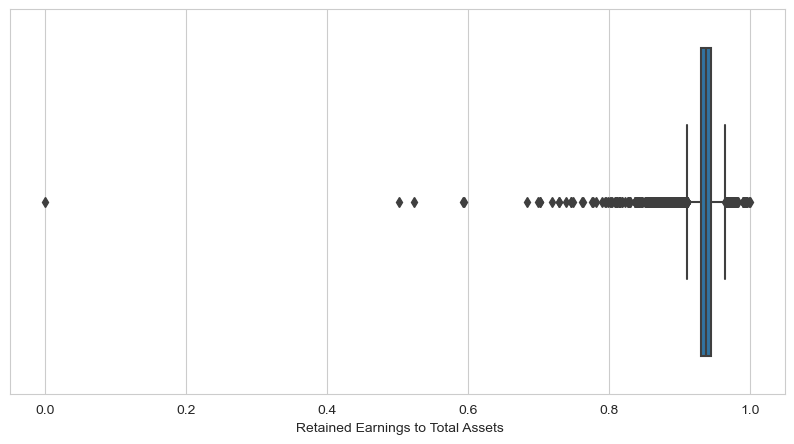

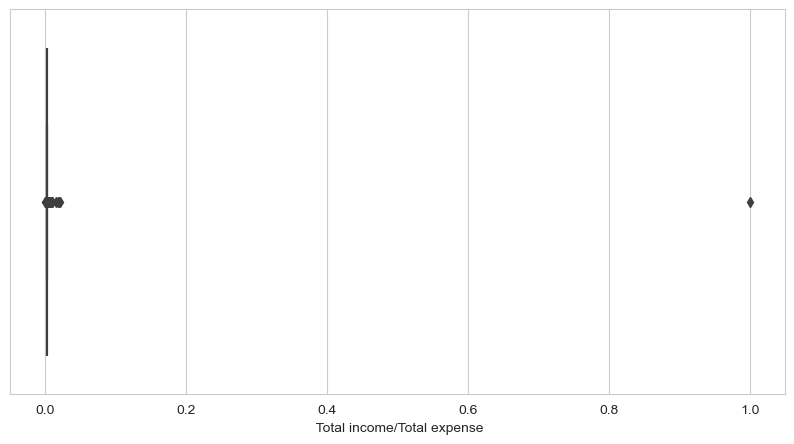

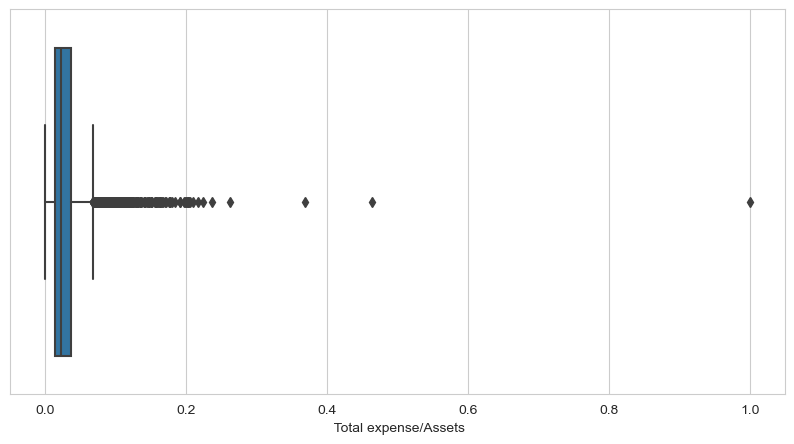

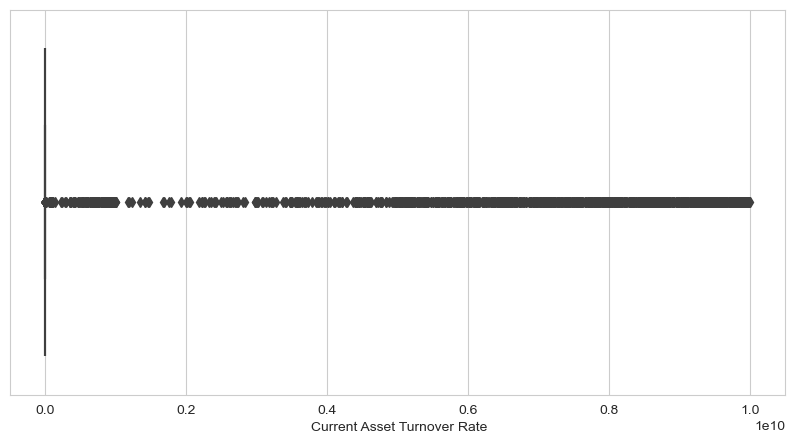

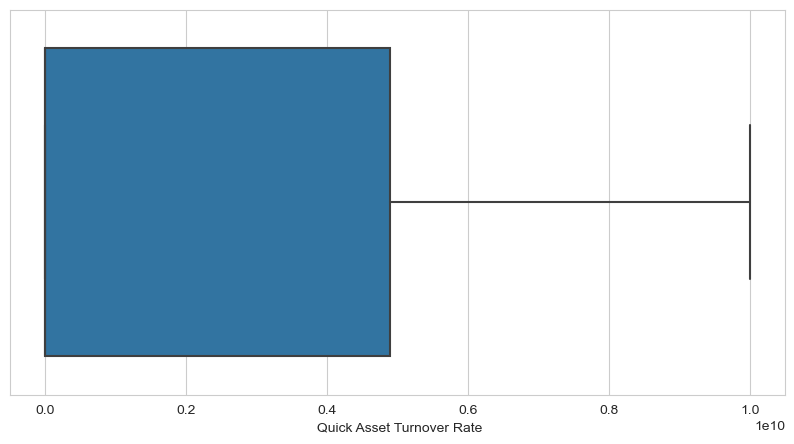

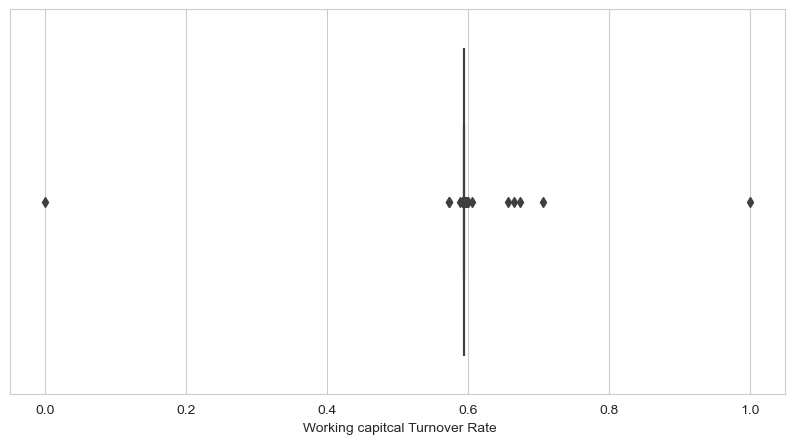

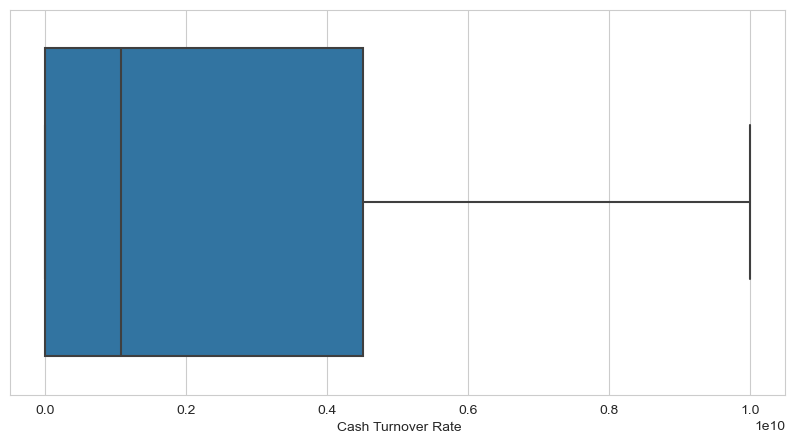

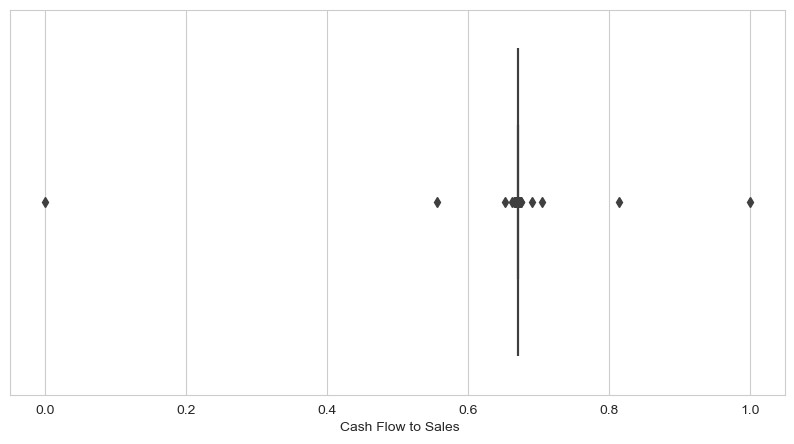

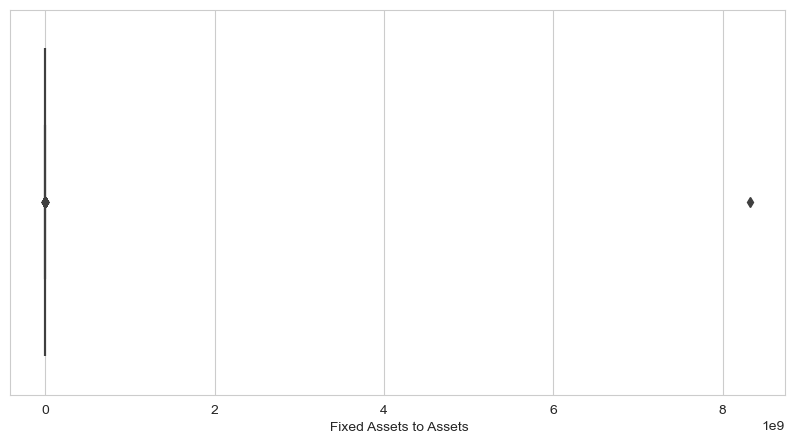

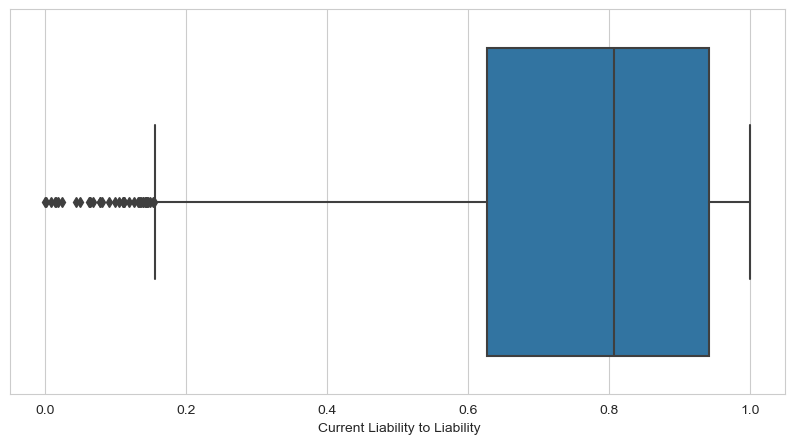

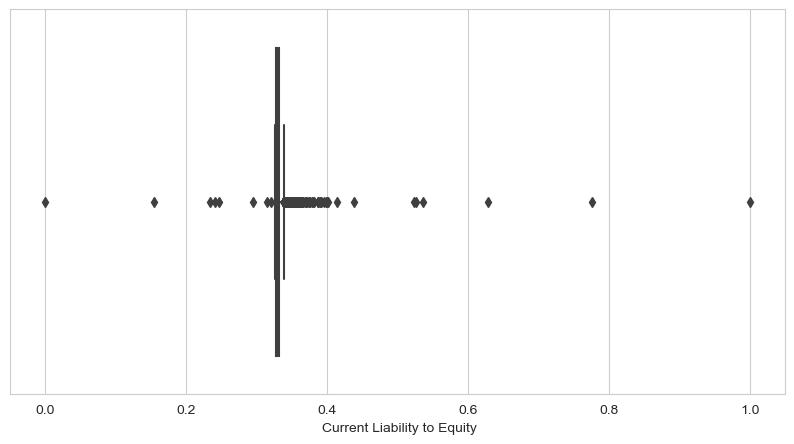

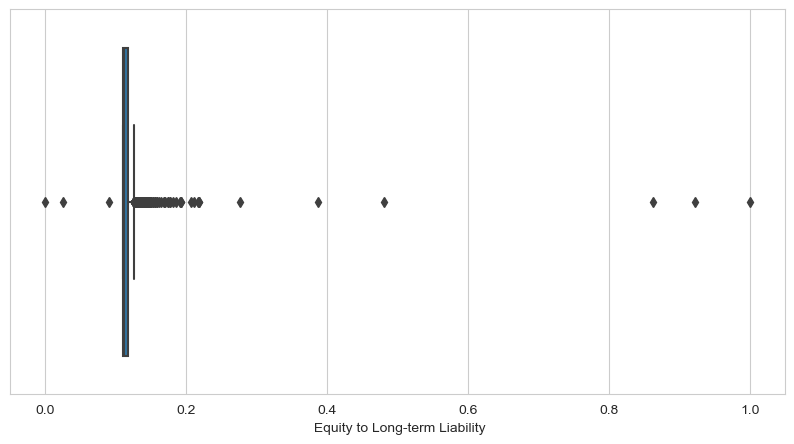

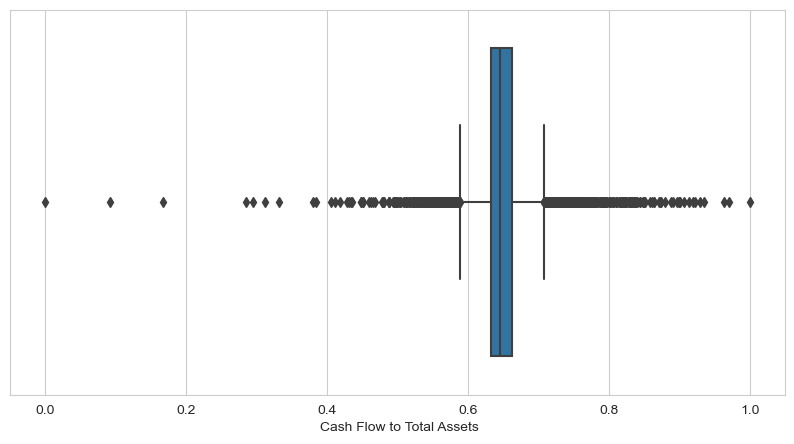

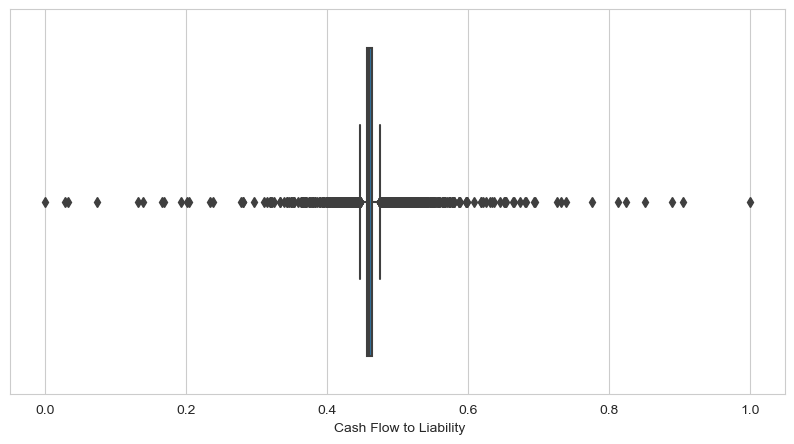

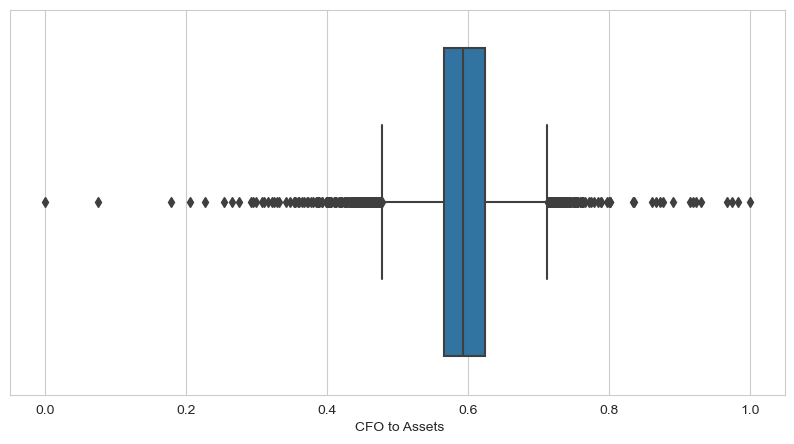

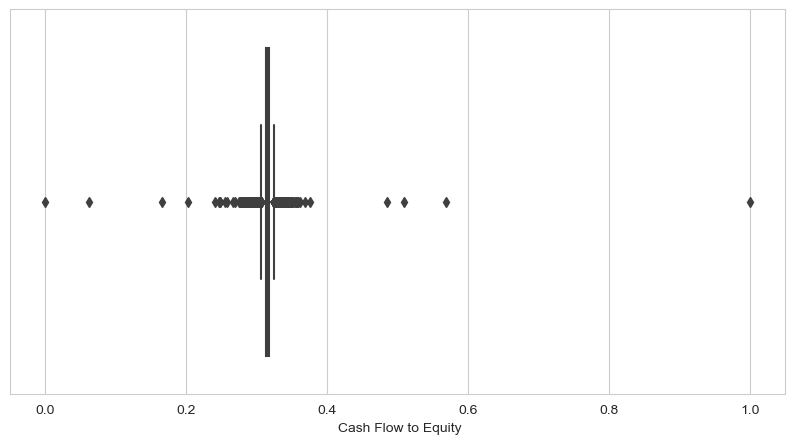

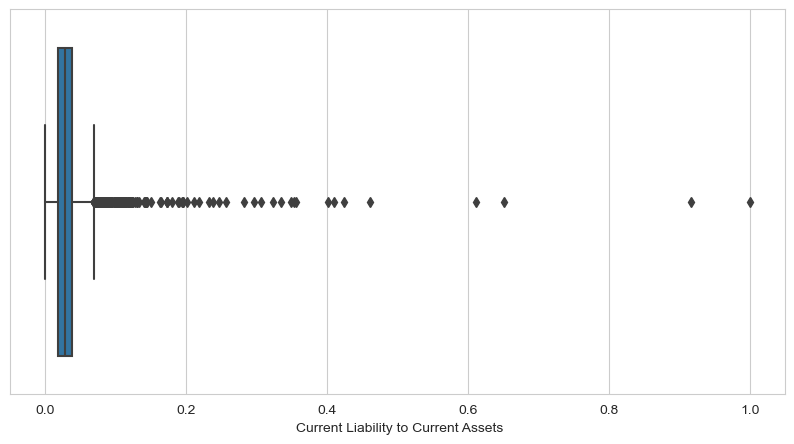

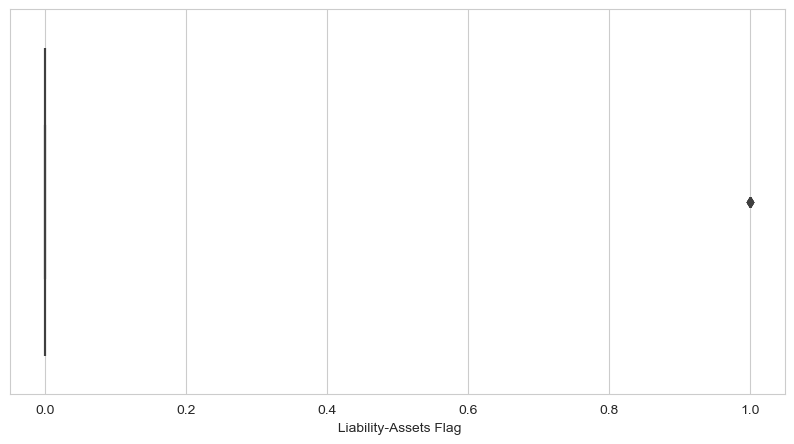

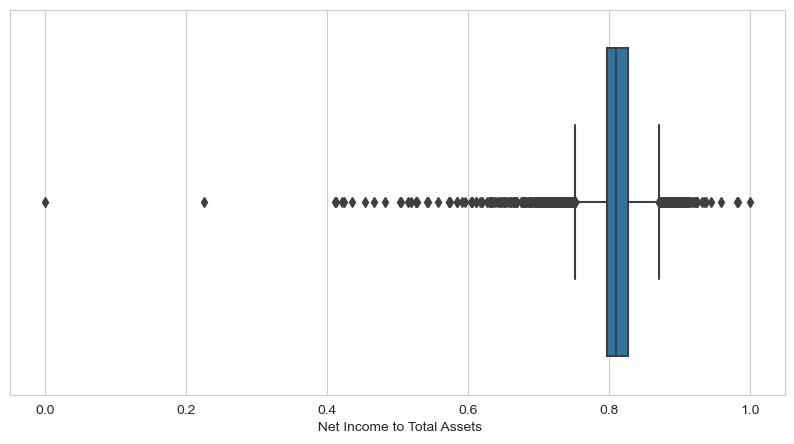

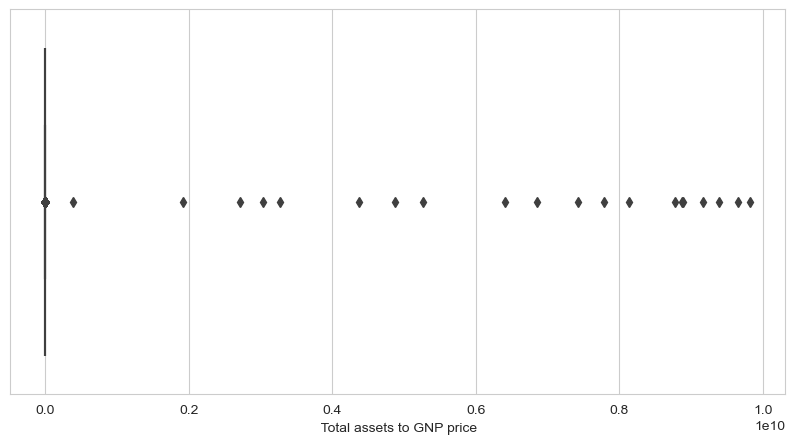

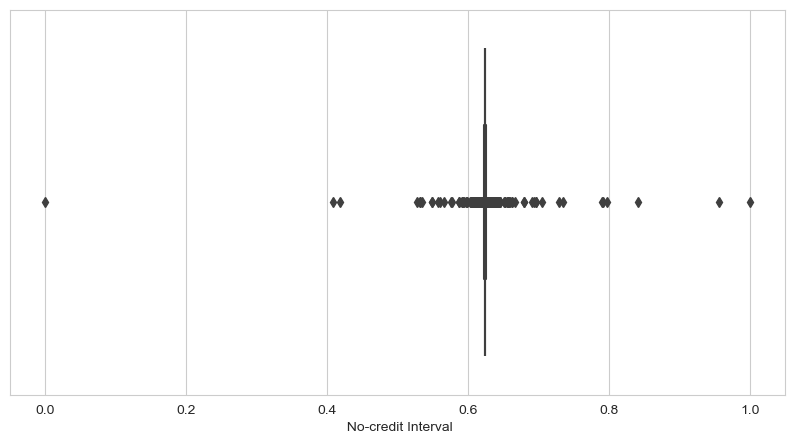

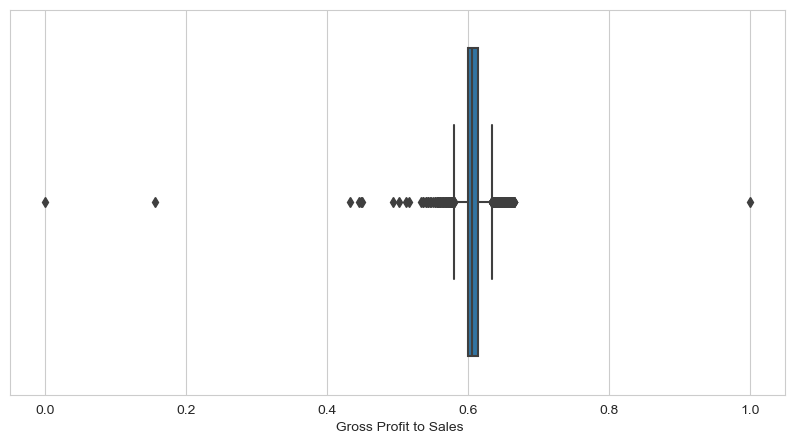

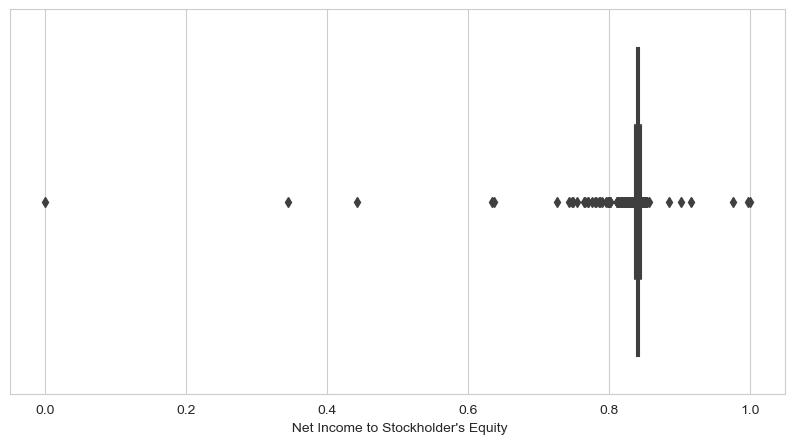

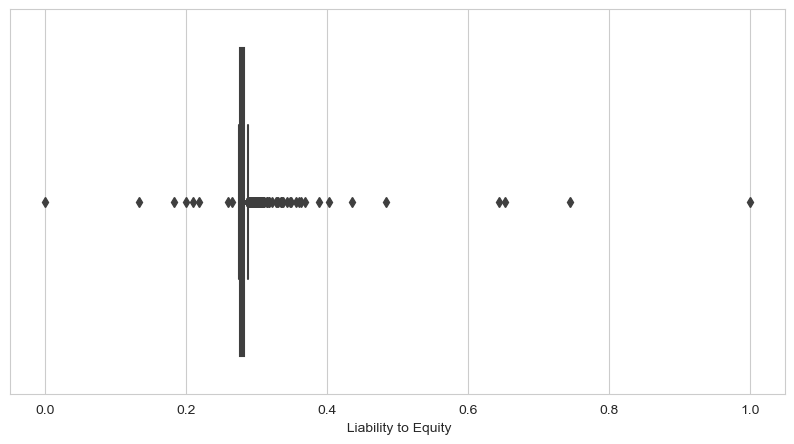

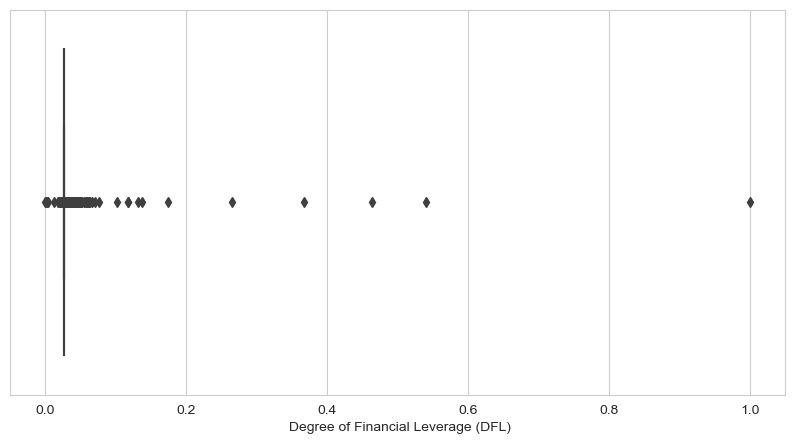

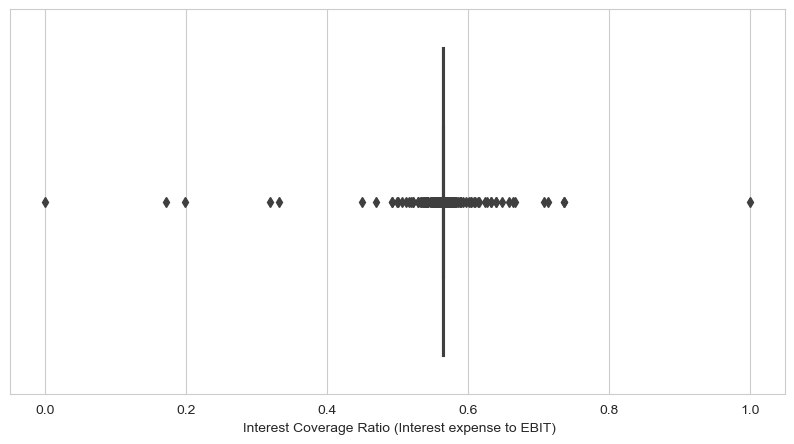

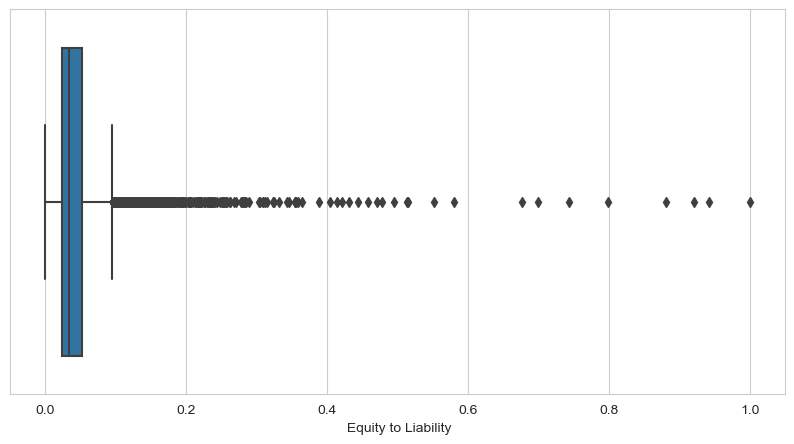

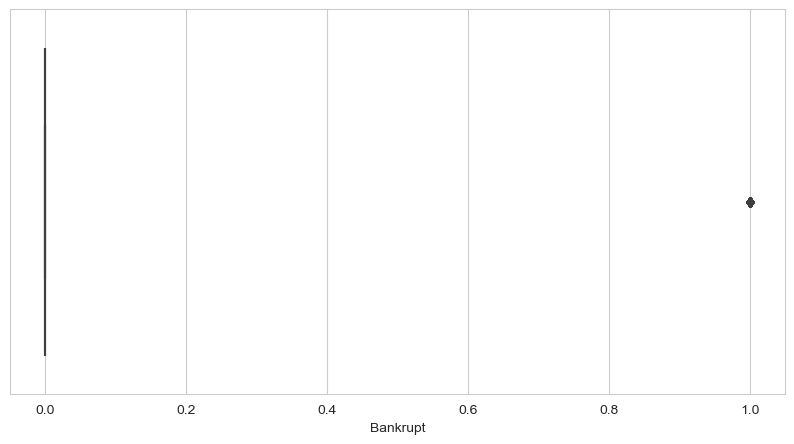

In [12]:
## Checking outliers
q=[]
for i in df.columns:
    sns.set_style("whitegrid")
    q1=np.percentile(df[i],25)
    q.append(q1)
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=i)
    plt.show()
    q1

In [ ]:
## No feature is required as data is already scaled

In [13]:
## Checking correlation
df_corr=df.corr()
df_corr

ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
 Realized Sales Gross Margin                                                                 0.332755          
 Operating Profit Rate                                                                       0.035725          
 Pre-tax net Interest Rate                                                                   0.053419          
 After-tax net Interest Rate                                                                 0.049222          
 Non-industry income and expenditure/revenue                                                 0.020501          
 Continuous interest rate (after tax)                                                        0.051328          
 Operating Expense Rate                                                                      0.066869          
 Research and development expense rate                                                       0.106461          
 Cash flow rate                                                                              0.323482          
 Interest-bearing debt interest rate                                                         0.048882          
 Tax rate (A)                                                                                0.250761          
 Net Value Per Share (B)                                                                     0.505580          
 Net Value Per Share (A)                                                                     0.505407          
 Net Value Per Share (C)                                                                     0.505281          
 Persistent EPS in the Last Four Seasons                                                     0.775006          
 Cash Flow Per Share                                                                         0.379839          
 Revenue Per Share (Yuan �                                                                  -0.015932          
 Operating Profit Per Share (Yuan �                                                          0.687201          
 Per Share Net profit before tax (Yuan �                                                     0.750564          
 Realized Sales Gross Profit Growth Rate                                                     0.000591          
 Operating Profit Growth Rate                                                                0.036511          
 After-tax Net Profit Growth Rate                                                            0.115083          
 Regular Net Profit Growth Rate                                                              0.115040          
 Continuous Net Profit Growth Rate                                                           0.025234          
 Total Asset Growth Rate                                                                     0.019635          
 Net Value Growth Rate                                                                      -0.021930          
 Total Asset Return Growth Rate Ratio                                                        0.079906          
 Cash Reinvestment %                                                                         0.296158          
 Current Ratio                                                                               0.013196          
 Quick Ratio                                                                                -0.026336          
 Interest Expense Ratio                                                                      0.003988          
 Total debt/Total net

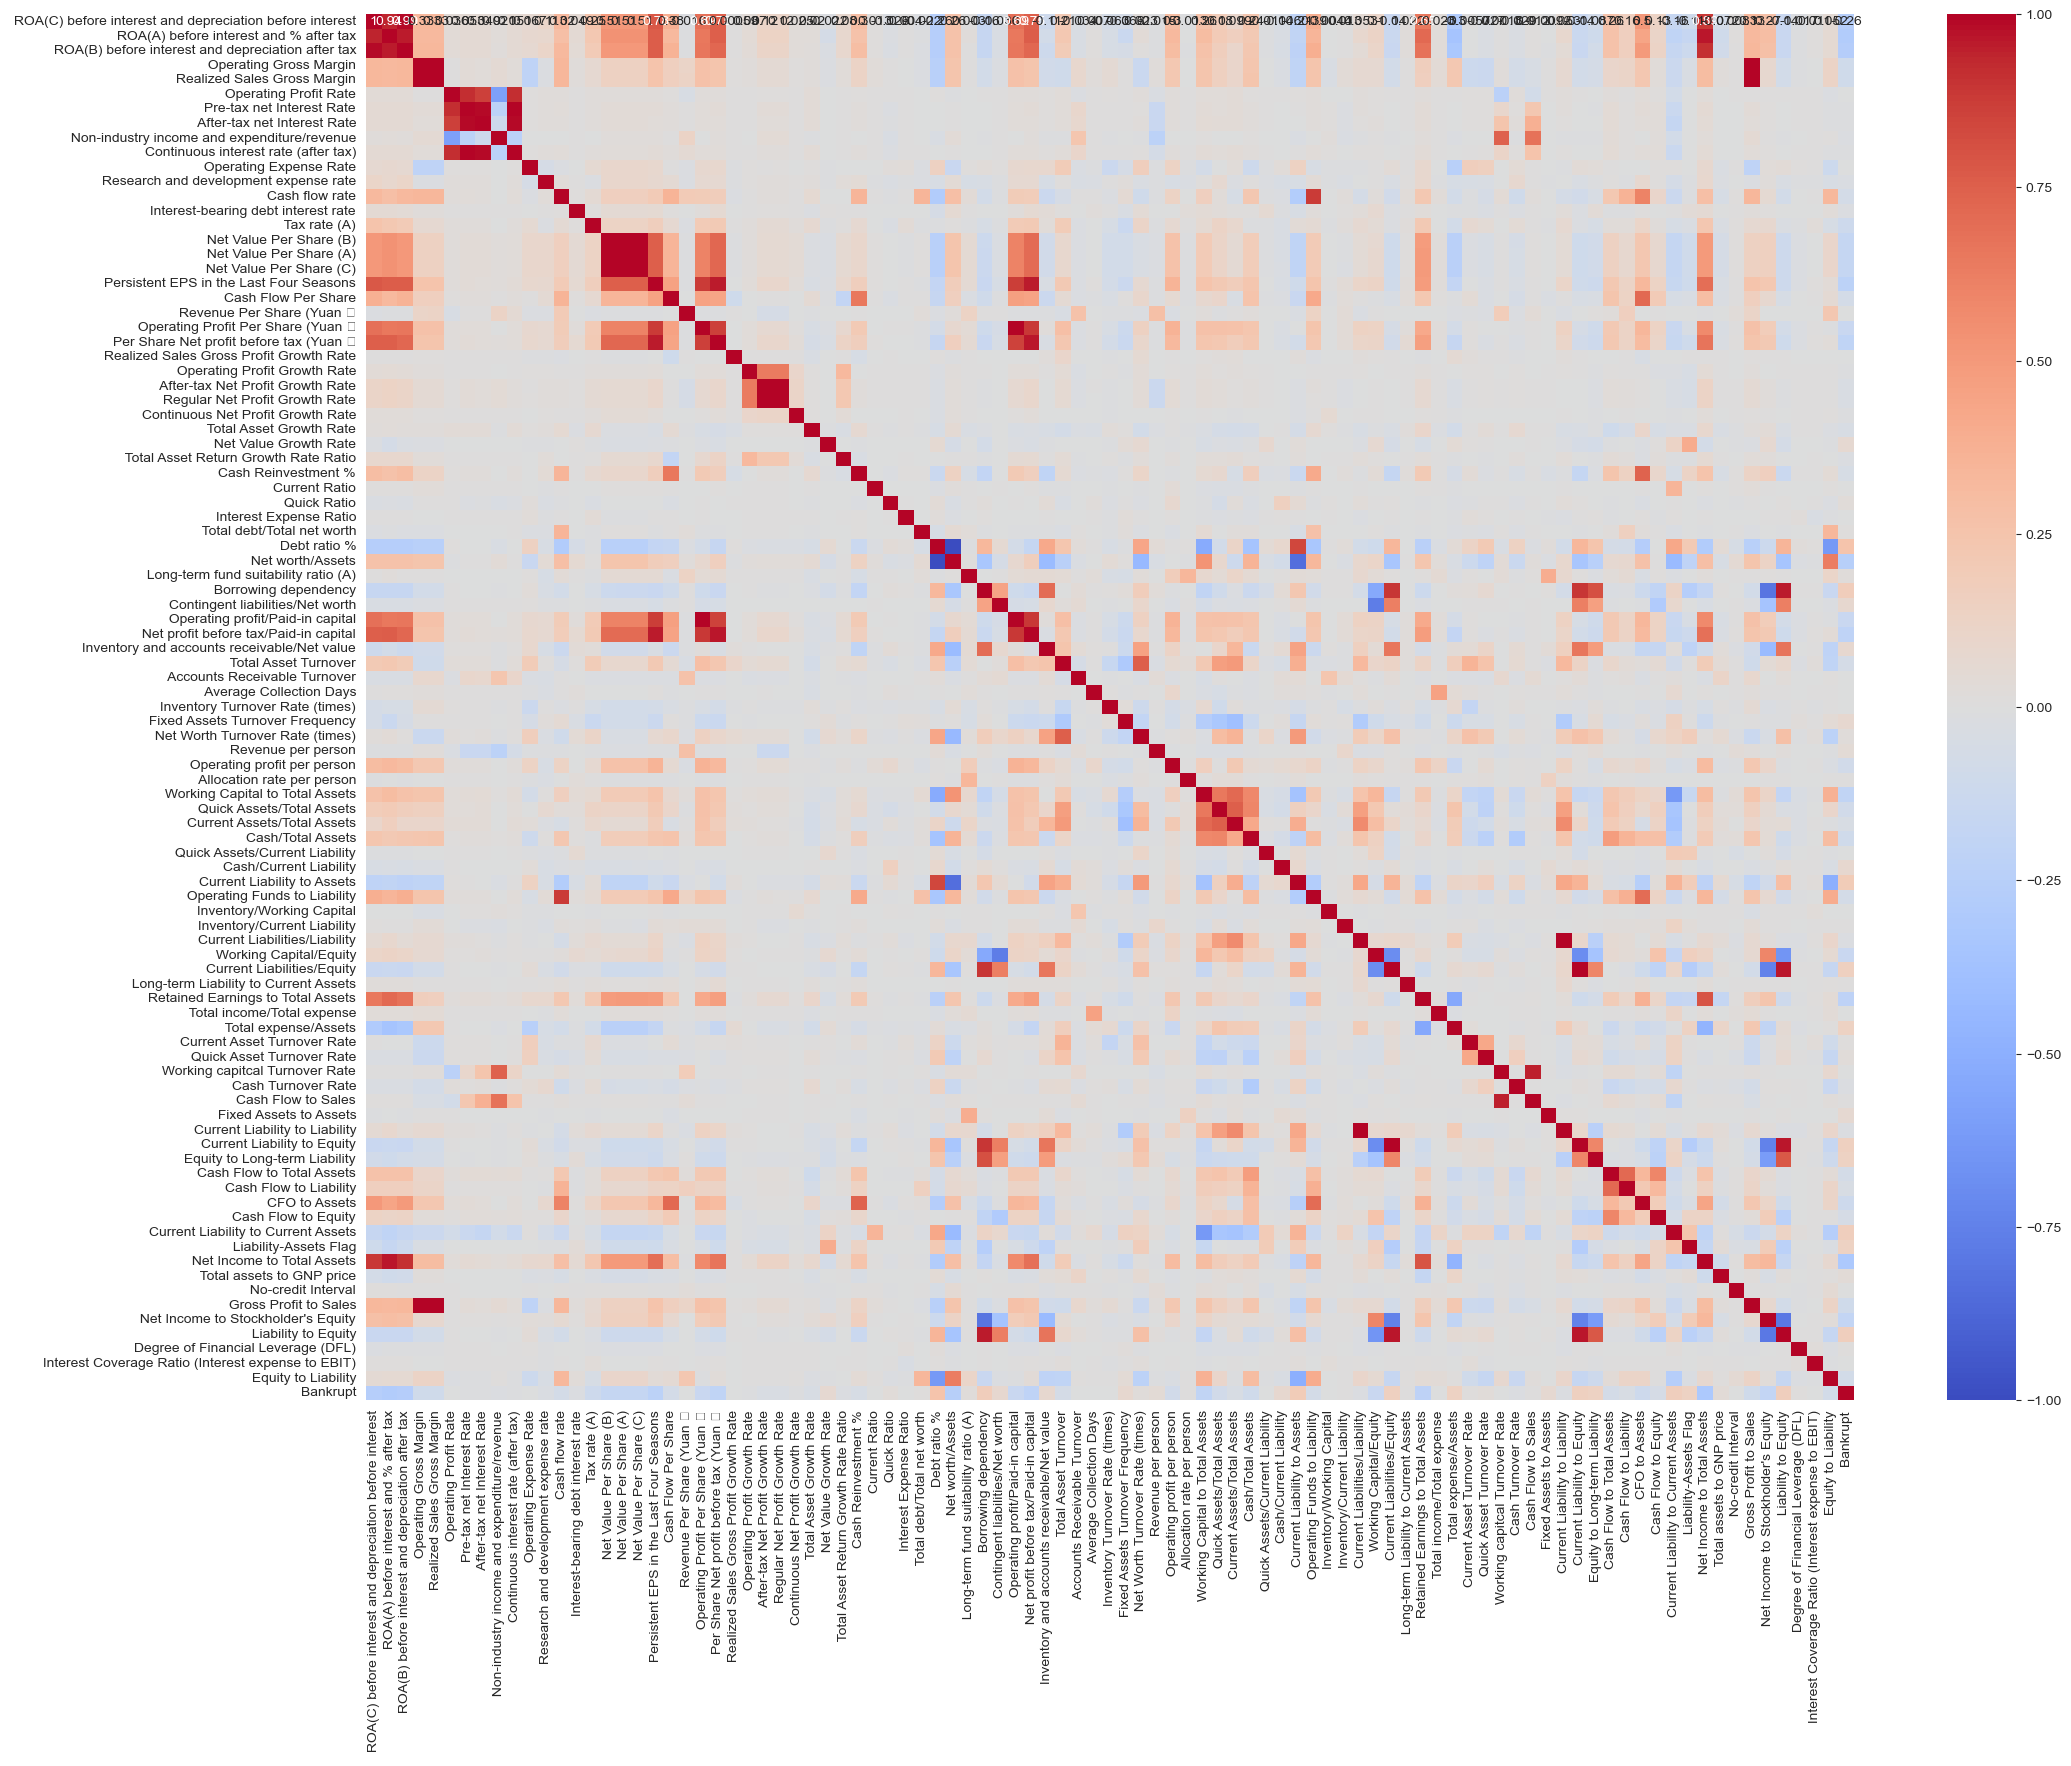

In [14]:
## Ploting heatmap to check correlation
plt.figure(figsize=(24,18))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

In [15]:
# Checking correlation of independent variables with dependent variables
dependent_corr=pd.DataFrame(df_corr['Bankrupt'])
dependent_corr=dependent_corr.reset_index().rename(columns={'index':'Features','Bankrupt':'Corr value with dependent variable'})
dependent_corr

Features  \
0    ROA(C) before interest and depreciation befor...   
1              ROA(A) before interest and % after tax   
2    ROA(B) before interest and depreciation after...   
3                              Operating Gross Margin   
4                         Realized Sales Gross Margin   
5                               Operating Profit Rate   
6                           Pre-tax net Interest Rate   
7                         After-tax net Interest Rate   
8         Non-industry income and expenditure/revenue   
9                Continuous interest rate (after tax)   
10                             Operating Expense Rate   
11              Research and development expense rate   
12                                     Cash flow rate   
13                Interest-bearing debt interest rate   
14                                       Tax rate (A)   
15                            Net Value Per Share (B)   
16                            Net Value Per Share (A)   
17                            Net Value Per Share (C)   
18            Persistent EPS in the Last Four Seasons   
19                                Cash Flow Per Share   
20                          Revenue Per Share (Yuan �   
21                 Operating Profit Per Share (Yuan �   
22            Per Share Net profit before tax (Yuan �   
23            Realized Sales Gross Profit Growth Rate   
24                       Operating Profit Growth Rate   
25                   After-tax Net Profit Growth Rate   
26                     Regular Net Profit Growth Rate   
27                  Continuous Net Profit Growth Rate   
28                            Total Asset Growth Rate   
29                              Net Value Growth Rate   
30               Total Asset Return Growth Rate Ratio   
31                                Cash Reinvestment %   
32                                      Current Ratio   
33                                        Quick Ratio   
34                             Interest Expense Ratio   
35                         Total debt/Total net worth   
36                                       Debt ratio %   
37                                   Net worth/Assets   
38               Long-term fund suitability ratio (A)   
39                               Borrowing dependency   
40                   Contingent liabilities/Net worth   
41                   Operating profit/Paid-in capital   
42              Net profit before tax/Paid-in capital   
43        Inventory and accounts receivable/Net value   
44                               Total Asset Turnover   
45                       Accounts Receivable Turnover   
46                            Average Collection Days   
47                    Inventory Turnover Rate (times)   
48                    Fixed Assets Turnover Frequency   
49                    Net Worth Turnover Rate (times)   
50                                 Revenue per person   
51                        Operating profit per person   
52                         Allocation rate per person   
53                    Working Capital to Total Assets   
54                          Quick Assets/Total Assets   
55                        Current Assets/Total Assets   
56                                  Cash/Total Assets   
57                     Quick Assets/Current Liability   
58                             Cash/Current Liability   
59                        Current Liability to Assets   
60                       Operating Funds to Liability   
61                          Inventory/Working Capital   
62                        Inventory/Current Liability   
63                      Current Liabilities/Liability   
64                             Working Capital/Equity   
65                         Current Liabilities/Equity   
66              Long-term Liability to Current Assets   
67                  Retained Earnings to Total Assets   
68                         Total income/Total expense   
69                               Total expense/Assets  

In [16]:
for i in range(len(dependent_corr)):
    for j in range(i+1,len(dependent_corr)):
        if dependent_corr.iloc[i]['Corr value with dependent variable'] == dependent_corr.iloc[j]['Corr value with dependent variable']:
            print(f"Duplicate correlation coefficient: {dependent_corr.iloc[i]['Corr value with dependent variable']} found for features: {dependent_corr.iloc[i]['Features']} and {dependent_corr.iloc[j]['Features']}")

Duplicate correlation coefficient: -0.020809326823165563 found for features:  Current Liabilities/Liability and  Current Liability to Liability
Duplicate correlation coefficient: 0.1538283617974813 found for features:  Current Liabilities/Equity and  Current Liability to Equity


In [17]:
## Split data into independent and dependent variables and deleting multicollinear features too
#x=df.drop('Bankrupt',axis=1)
x=df.drop(['Bankrupt'],axis=1)
y=df['Bankrupt']

In [18]:
print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (6819, 94)
Shape of y:  (6819,)


In [19]:
## split data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101,stratify=y)

In [20]:
print('Shape of x_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape)
print('*********'*10)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (5114, 94)
Shape of y_train:  (5114,)
******************************************************************************************
Shape of x_test:  (1705, 94)
Shape of y_test:  (1705,)


In [21]:
## Checking whether data is balanced or imbalnced
print("Training data:")
print(y_train.value_counts())
print("**********"*10)
print("Testing data:")
print(y_test.value_counts())

Training data:
Bankrupt
0    4949
1     165
Name: count, dtype: int64
****************************************************************************************************
Testing data:
Bankrupt
0    1650
1      55
Name: count, dtype: int64


In [22]:
## Balancing data 
from imblearn.over_sampling import SMOTE
over =SMOTE()
x_balance,y_balance=over.fit_resample(x_train,y_train)

In [23]:
### Dropping features after doing feature importance in tree model

In [24]:
x_balance.drop([' Operating Gross Margin',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash Flow Per Share',
 ' Operating Profit Per Share (Yuan �',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Long-term fund suitability ratio (A)',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnover',
 ' Inventory Turnover Rate (times)',
 ' Net Worth Turnover Rate (times)',
 ' Quick Assets/Total Assets',
 ' Current Assets/Total Assets',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Fixed Assets to Assets',
 ' Current Liability to Liability',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Liability-Assets Flag',
 ' No-credit Interval'],axis=1,inplace=True)

In [25]:
x_test.drop([' Operating Gross Margin',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash Flow Per Share',
 ' Operating Profit Per Share (Yuan �',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Long-term fund suitability ratio (A)',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnover',
 ' Inventory Turnover Rate (times)',
 ' Net Worth Turnover Rate (times)',
 ' Quick Assets/Total Assets',
 ' Current Assets/Total Assets',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Fixed Assets to Assets',
 ' Current Liability to Liability',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Liability-Assets Flag',
 ' No-credit Interval'],axis=1,inplace=True)

In [26]:
print("Before balancing Training data:")
print(y_train.value_counts())
print("**********"*10)
print("After balancing Training data:")
print(y_balance.value_counts())

Before balancing Training data:
Bankrupt
0    4949
1     165
Name: count, dtype: int64
****************************************************************************************************
After balancing Training data:
Bankrupt
0    4949
1    4949
Name: count, dtype: int64


In [27]:
## Function to evaulate model
def evaluation_matrix(y_balance,y_pred_train,y_test,y_pred_test):
    print("Accuracy Score :")
    print('Training Accuracy :',accuracy_score(y_balance,y_pred_train))
    print('Test Accuracy :',accuracy_score(y_test,y_pred_test))
    print(" ")
    print(" ")
    print("Classification Report :")
    print('Training Classification Report :\n',classification_report(y_balance,y_pred_train))
    print('Test Classification Report :\n',classification_report(y_test,y_pred_test))
    print(" ")
    print(" ")
    print("Confusion Matrix :")
    cm_train=confusion_matrix(y_balance,y_pred_train)
    plt.imshow(cm_train,cmap='winter')
    category_name=['Not-Bankrupt','Bankrupt']
    plt.title('Confusion Matrix for Training Data:')
    plt.xlabel('Predicted value')
    plt.ylabel('Actual value')
    ticks=np.arange(len(category_name))
    plt.xticks(ticks,category_name,rotation=45)
    plt.yticks(ticks,category_name)
    s=[['TN','FP'],['FN','TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" = "+str(cm_train[i][j]),fontsize=12)
    plt.show()
    print(" ")
    cm_test=confusion_matrix(y_test,y_pred_test)
    plt.imshow(cm_test,cmap='winter')
    plt.title('Confusion Matrix for Test Data:')
    plt.xlabel('Predicted value')
    plt.ylabel('Actual value')
    plt.xticks(ticks,category_name,rotation=45)
    plt.yticks(ticks,category_name)
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" = "+str(cm_test[i][j]),fontsize=12)
    plt.tight_layout()
    plt.show()

In [28]:
## Plotting ROC-AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc(y_test,y_pred_test):
    roc_auc = roc_auc_score(y_test, y_pred_test)
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_test)
    plt.figure(figsize=(15,15))
    plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % roc_auc)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("************Receiver Operating Characteristic with Area Under Curve************")
    plt.legend(loc='lower right')
    plt.show()

## Building the model

### 1) Logistic Regression model

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [30]:
lr.fit(x_balance,y_balance)

LogisticRegression()

In [31]:
y_pred_train_lr=lr.predict(x_balance)
y_pred_test_lr=lr.predict(x_test)

Accuracy Score :
Training Accuracy : 0.6246716508385532
Test Accuracy : 0.7483870967741936
 
 
Classification Report :
Training Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      4949
           1       0.66      0.50      0.57      4949

    accuracy                           0.62      9898
   macro avg       0.63      0.62      0.62      9898
weighted avg       0.63      0.62      0.62      9898

Test Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.76      0.85      1650
           1       0.06      0.45      0.10        55

    accuracy                           0.75      1705
   macro avg       0.52      0.61      0.48      1705
weighted avg       0.95      0.75      0.83      1705

 
 
Confusion Matrix :


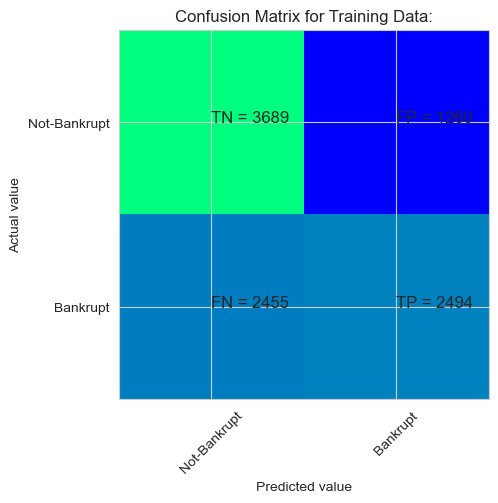

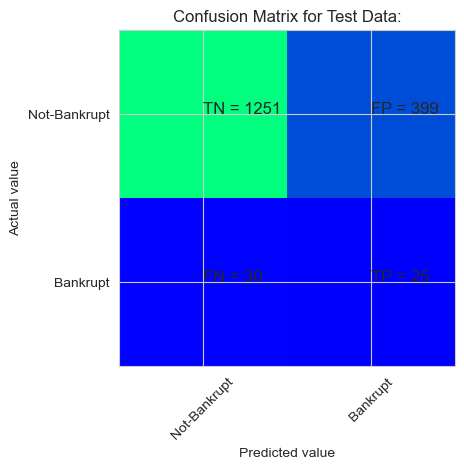

In [32]:
evaluation_matrix(y_balance,y_pred_train_lr,y_test,y_pred_test_lr)

<Figure size 1400x200 with 0 Axes>

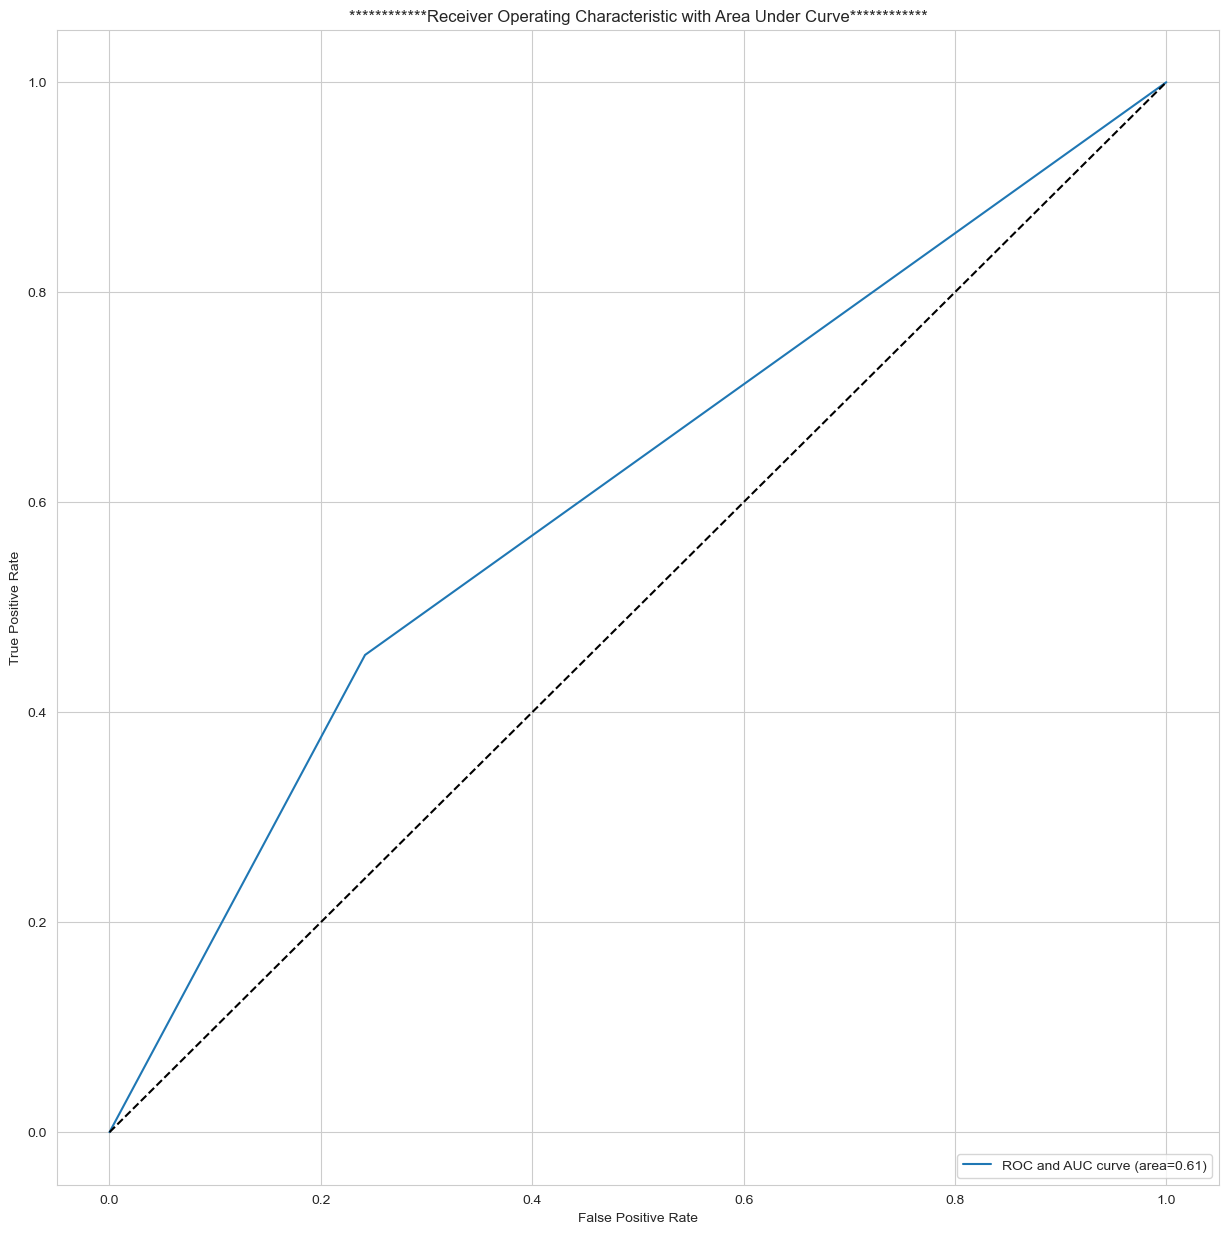

In [33]:
plt.figure(figsize=(14,2))
plot_roc(y_test,y_pred_test_lr)

### 2) Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth =9, min_samples_leaf =  1, min_samples_split = 10,random_state=101)
dt.fit(x_balance,y_balance)

DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=101)

In [42]:
y_train_predict_dt=dt.predict(x_balance)
y_test_predict_dt=dt.predict(x_test)

Accuracy Score :
Training Accuracy : 0.980400080824409
Test Accuracy : 0.9237536656891495
 
 
Classification Report :
Training Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4949
           1       0.96      1.00      0.98      4949

    accuracy                           0.98      9898
   macro avg       0.98      0.98      0.98      9898
weighted avg       0.98      0.98      0.98      9898

Test Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1650
           1       0.23      0.58      0.33        55

    accuracy                           0.92      1705
   macro avg       0.61      0.76      0.64      1705
weighted avg       0.96      0.92      0.94      1705

 
 
Confusion Matrix :


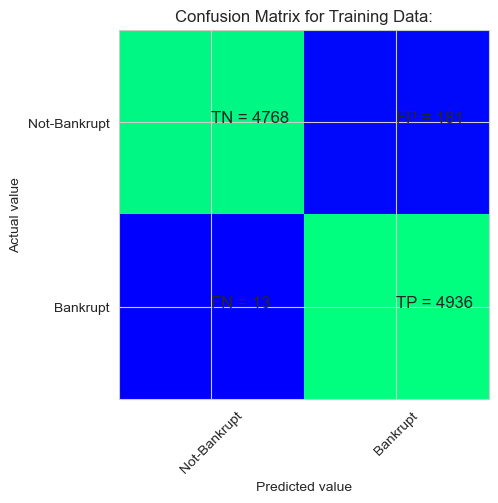

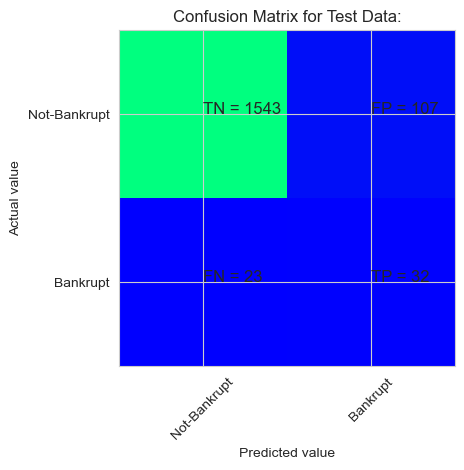

In [43]:
evaluation_matrix(y_balance,y_train_predict_dt,y_test,y_test_predict_dt)

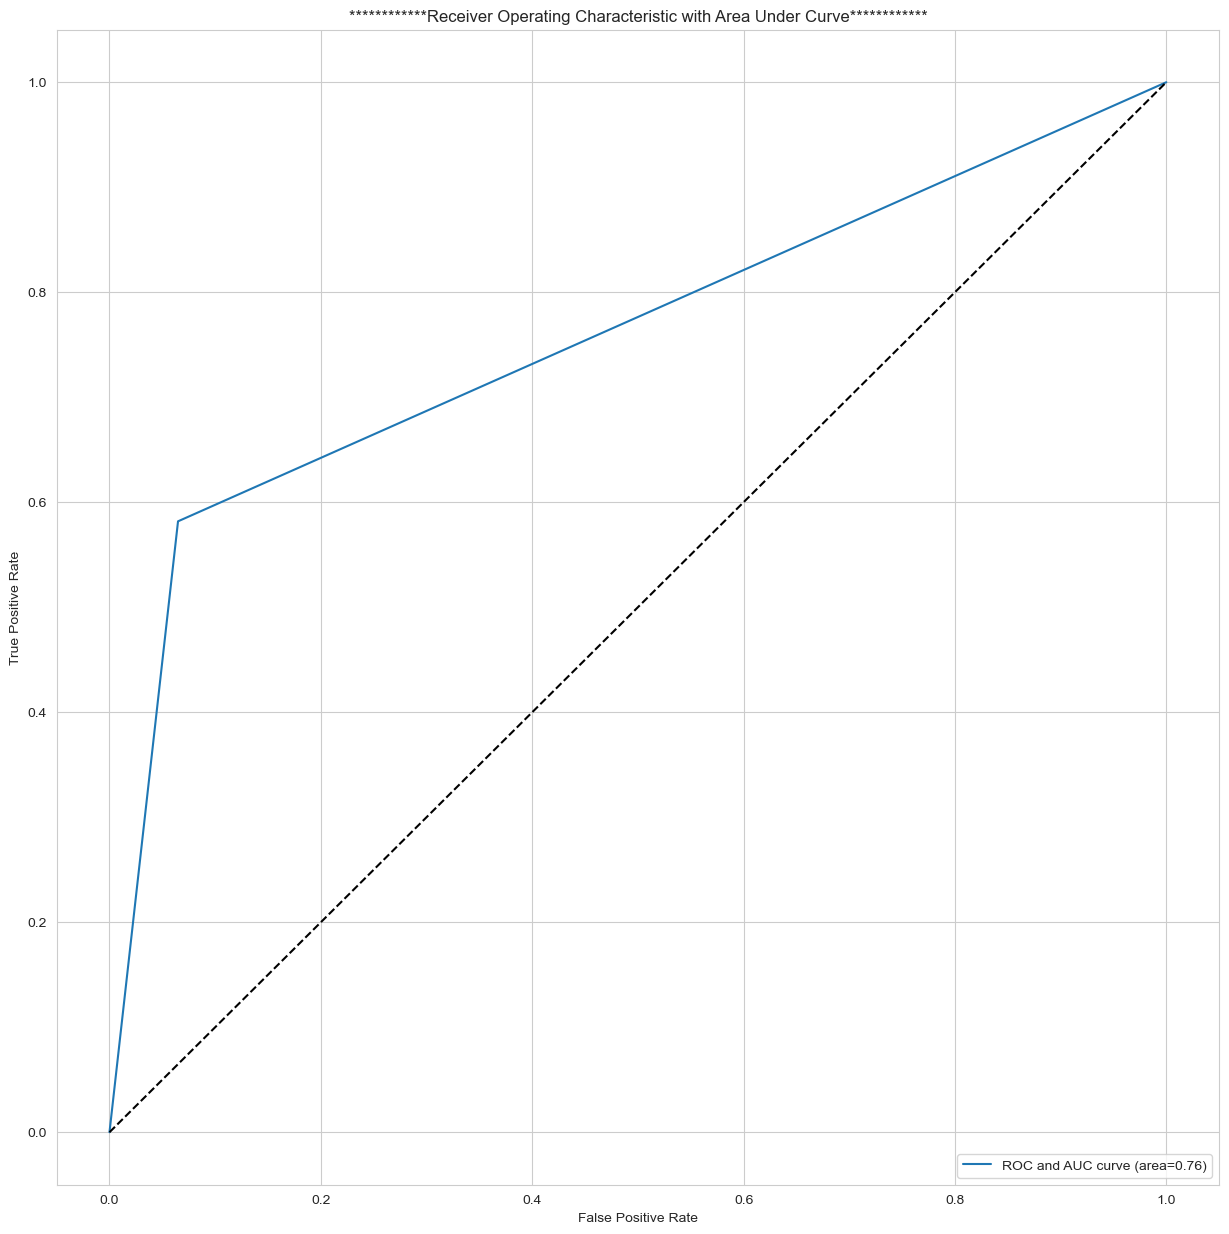

In [44]:
## Plotting ROC-AUC Curve
plot_roc(y_test,y_test_predict_dt)

In [38]:
## Model is overfitted so we need to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
gridesearch_cv=RandomizedSearchCV(estimator=dt,param_distributions=param_grid_dt)
gridesearch_cv.fit(x_balance,y_balance)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=7,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    random_state=101),
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [40]:
print("Best hyperparameters:",gridesearch_cv.best_params_)

Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 9}


### 3) Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, max_depth =5, min_samples_leaf =  2, min_samples_split = 5,random_state=101,criterion='gini')

In [64]:
rf.fit(x_balance,y_balance)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=101)

In [65]:
y_pred_train_rf=rf.predict(x_balance)
y_pred_test_rf=rf.predict(x_test)

In [66]:
test_f1_score = f1_score(y_balance, y_pred_train_rf)
test_f1_score

0.9498176082027013

In [67]:
report=classification_report(y_test, y_pred_test_rf).split()[-2]
report

'0.93'

Accuracy Score :
Training Accuracy : 0.9485754697918771
Test Accuracy : 0.9043988269794722
 
 
Classification Report :
Training Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      4949
           1       0.93      0.97      0.95      4949

    accuracy                           0.95      9898
   macro avg       0.95      0.95      0.95      9898
weighted avg       0.95      0.95      0.95      9898

Test Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1650
           1       0.21      0.73      0.33        55

    accuracy                           0.90      1705
   macro avg       0.60      0.82      0.64      1705
weighted avg       0.97      0.90      0.93      1705

 
 
Confusion Matrix :


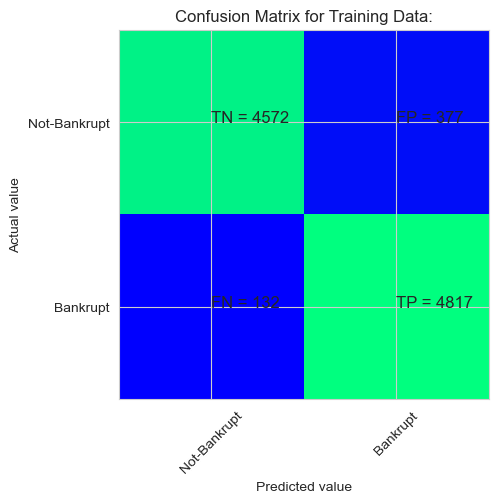

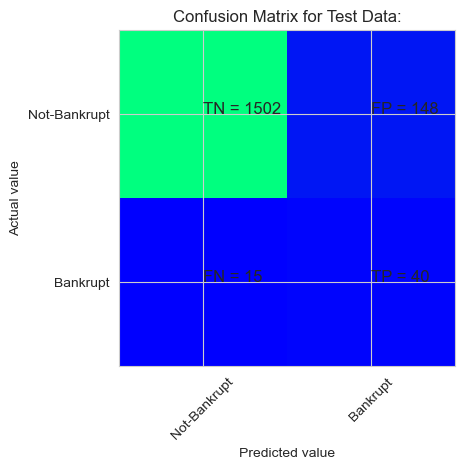

In [68]:
evaluation_matrix(y_balance,y_pred_train_rf,y_test,y_pred_test_rf)

<Figure size 1400x200 with 0 Axes>

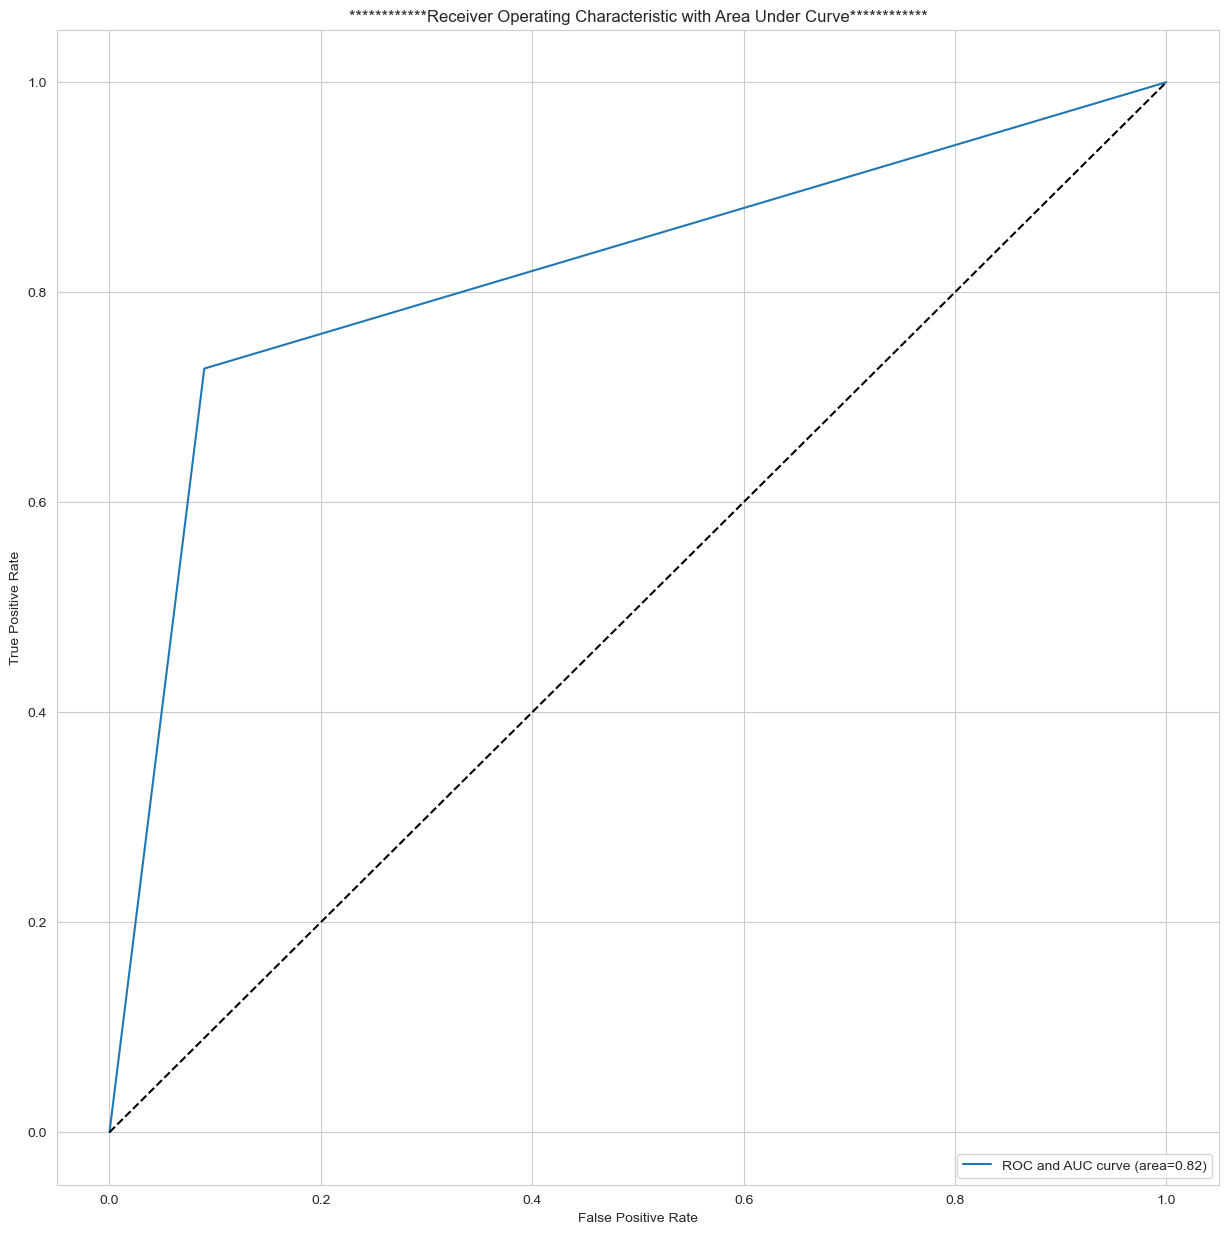

In [69]:
## Plotting ROC-AUC Curve
plt.figure(figsize=(14,2))
plot_roc(y_test,y_pred_test_rf)

In [53]:
## Model is overfitted so need to perform gyperparameter tuning
param_grid_rf = {
    'max_depth': [3, 5, 7,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators' : [100,200,300],
    'criterion' : ["gini", "entropy", "log_loss"]
}

In [54]:
randomsearch_cv_rf=RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf)
randomsearch_cv_rf.fit(x_balance,y_balance)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=5,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [55]:
print("Best hyperparameters:",randomsearch_cv_rf.best_params_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'}


In [70]:
#pd.DataFrame(rf.feature_importances_)
feature_importance=pd.DataFrame()
feature_importance['features']=x_balance.columns
feature_importance['importance']=rf.feature_importances_
feature_importance

features  importance
0    ROA(C) before interest and depreciation befor...    0.010051
1              ROA(A) before interest and % after tax    0.018114
2    ROA(B) before interest and depreciation after...    0.038721
3                         Realized Sales Gross Margin    0.001617
4                               Operating Profit Rate    0.004924
5                           Pre-tax net Interest Rate    0.050198
6                         After-tax net Interest Rate    0.073724
7         Non-industry income and expenditure/revenue    0.028608
8                Continuous interest rate (after tax)    0.065426
9                                      Cash flow rate    0.001725
10                Interest-bearing debt interest rate    0.013209
11                                       Tax rate (A)    0.001772
12                            Net Value Per Share (B)    0.001154
13                            Net Value Per Share (A)    0.005864
14                            Net Value Per Share (C)    0.003320
15            Persistent EPS in the Last Four Seasons    0.068599
16                          Revenue Per Share (Yuan �    0.001454
17            Per Share Net profit before tax (Yuan �    0.067597
18                   After-tax Net Profit Growth Rate    0.001295
19                  Continuous Net Profit Growth Rate    0.003087
20                            Total Asset Growth Rate    0.003005
21                              Net Value Growth Rate    0.030988
22                                Cash Reinvestment %    0.001479
23                                      Current Ratio    0.001216
24                                        Quick Ratio    0.019187
25                             Interest Expense Ratio    0.009746
26                         Total debt/Total net worth    0.024242
27                                       Debt ratio %    0.025420
28                                   Net worth/Assets    0.013058
29                               Borrowing dependency    0.023505
30                   Contingent liabilities/Net worth    0.003262
31                   Operating profit/Paid-in capital    0.000663
32              Net profit before tax/Paid-in capital    0.051265
33                            Average Collection Days    0.003211
34                    Fixed Assets Turnover Frequency    0.001802
35                                 Revenue per person    0.001704
36                        Operating profit per person    0.001636
37                         Allocation rate per person    0.005331
38                    Working Capital to Total Assets    0.001116
39                                  Cash/Total Assets    0.004797
40                     Quick Assets/Current Liability    0.005539
41                             Cash/Current Liability    0.001600
42                        Current Liability to Assets    0.007495
43                       Operating Funds to Liability    0.000847
44                          Inventory/Working Capital    0.002041
45                             Working Capital/Equity    0.001521
46                         Current Liabilities/Equity    0.007937
47              Long-term Liability to Current Assets    0.003535
48                  Retained Earnings to Total Assets    0.041929
49                         Total income/Total expense    0.034608
50                               Total expense/Assets    0.001474
51                        Current Asset Turnover Rate    0.001559
52                          Quick Asset Turnover Rate    0.001163
53                     Working capitcal Turnover Rate    0.001374
54                                 Cash Turnover Rate    0.005310
55                                 Cash Flow to Sales    0.001919
56                        Current Liability to Equity    0.006046
57                      Equity to Long-term Liability    0.001910
58                          Cash Flow to Total Assets    0.001199
59                             Cash Flow to Liability    0.001421
60                C

In [71]:
non_significant=[]
for i in range(len(feature_importance)):
    if feature_importance.iloc[i]['importance']< 0.001:
       non_significant.append(feature_importance.iloc[i]['features']) 
non_significant

[' Operating profit/Paid-in capital',
 ' Operating Funds to Liability',
 ' Gross Profit to Sales']

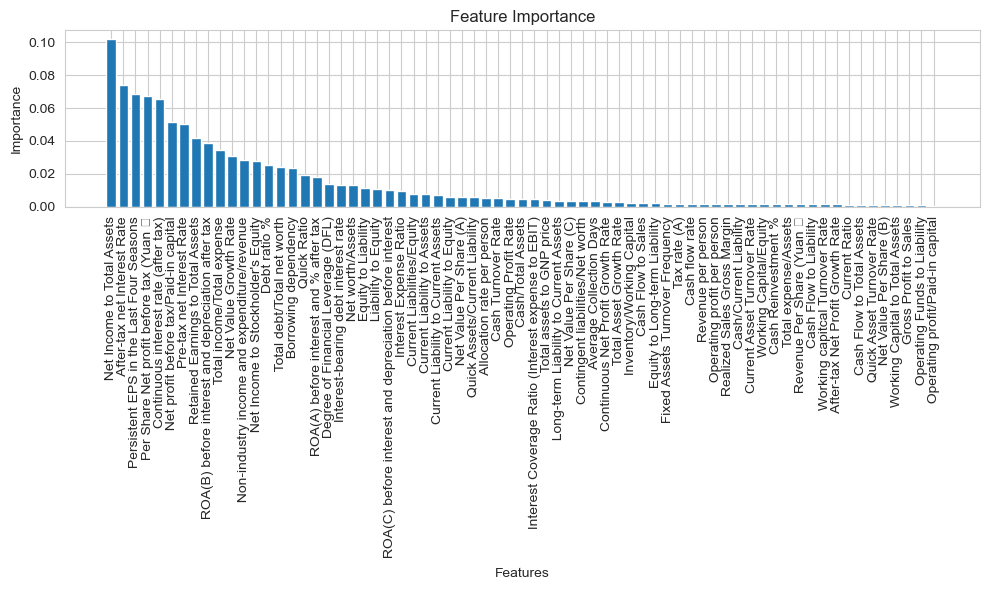

In [72]:
import matplotlib.pyplot as plt
# Assuming feature_importance is a DataFrame with 'features' and 'importance' columns
# Sort features based on importance in descending order
feature_importance_sorted = feature_importance.sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_sorted['features'], feature_importance_sorted['importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### 4) XGBoost Model

In [73]:
import xgboost as xgb

In [83]:
xgb_model=xgb.XGBClassifier(n_estimators=300, max_depth= 3, learning_rate= 0.1)
xgb_model.fit(x_balance,y_balance)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_train_predict_xgb=xgb_model.predict(x_balance)
y_test_predict_xgb=xgb_model.predict(x_test)

Accuracy Score :
Training Accuracy : 0.9978783592644979
Test Accuracy : 0.9524926686217009
 
 
Classification Report :
Training Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00      4949

    accuracy                           1.00      9898
   macro avg       1.00      1.00      1.00      9898
weighted avg       1.00      1.00      1.00      9898

Test Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.33      0.47      0.39        55

    accuracy                           0.95      1705
   macro avg       0.66      0.72      0.68      1705
weighted avg       0.96      0.95      0.96      1705

 
 
Confusion Matrix :


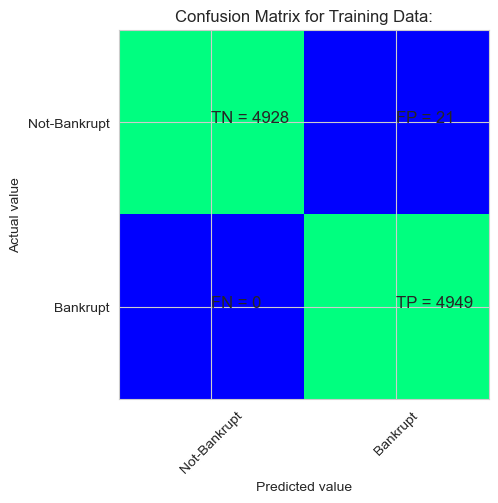

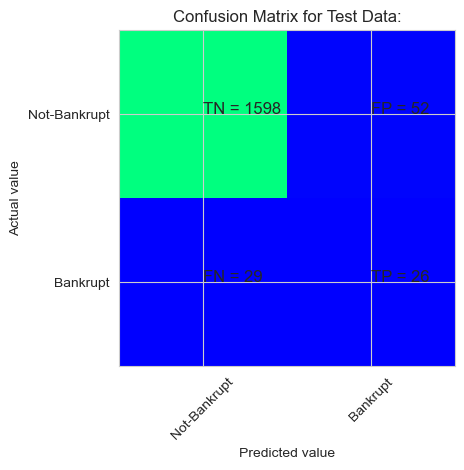

In [85]:
evaluation_matrix(y_balance,y_train_predict_xgb,y_test,y_test_predict_xgb)

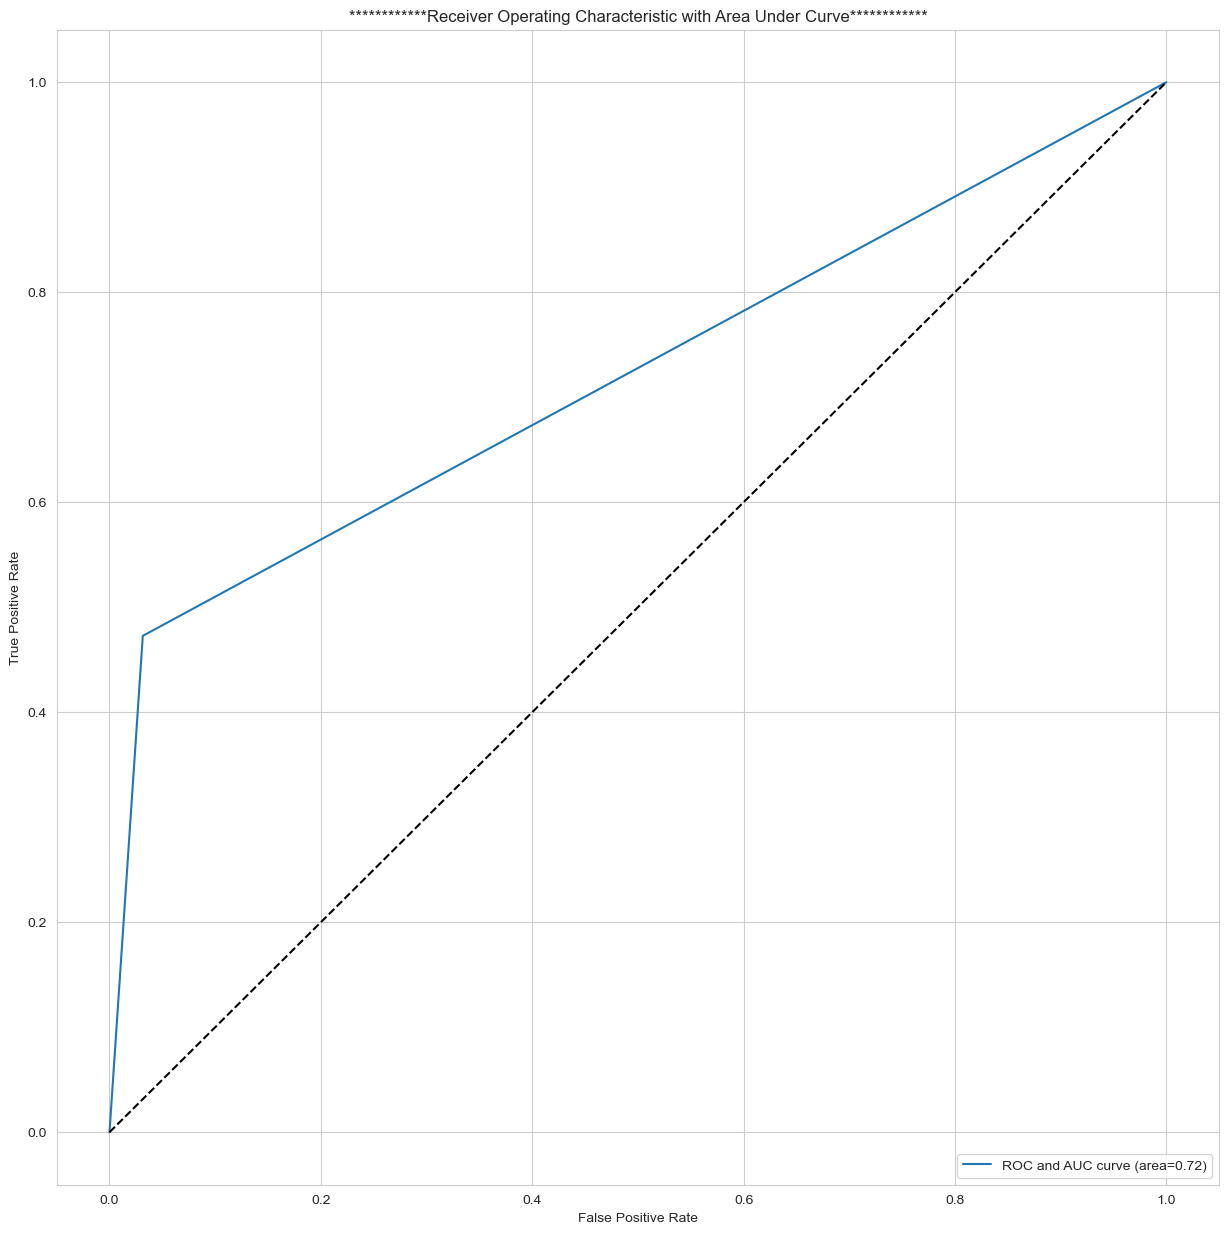

In [86]:
## Plotting ROC-AUC Curve
plot_roc(y_test,y_test_predict_xgb)

In [78]:
param_grid_xbg = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}
randomsearch_cv_rf = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xbg, cv=3, scoring='accuracy')
randomsearch_cv_rf.fit(x_balance, y_balance)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=3,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=300, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [79]:
print("Best hyperparameters:", randomsearch_cv_rf.best_params_)

Best hyperparameters: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}


In [87]:
models = ['logistic Regression', 'Random Forest','Decision Tree','XGBoost']
accuracy_train = [accuracy_score(y_balance, y_pred_train_lr), accuracy_score(y_balance, y_pred_train_rf),accuracy_score(y_balance, y_train_predict_dt),accuracy_score(y_balance, y_train_predict_xgb)]
accuracy_test = [accuracy_score(y_test, y_pred_test_lr), accuracy_score(y_test, y_pred_test_rf),accuracy_score(y_test, y_test_predict_dt),accuracy_score(y_test, y_test_predict_xgb)]

f1_train = [f1_score(y_balance, y_pred_train_lr), f1_score(y_balance, y_pred_train_rf),f1_score(y_balance, y_train_predict_dt),f1_score(y_balance, y_train_predict_xgb)]
f1_test = [f1_score(y_test, y_pred_test_lr), f1_score(y_test, y_pred_test_rf),f1_score(y_test, y_test_predict_dt),f1_score(y_test, y_test_predict_xgb)]

auc_train = [roc_auc_score(y_balance, y_pred_train_lr), roc_auc_score(y_balance, y_pred_train_rf),roc_auc_score(y_balance, y_train_predict_dt),roc_auc_score(y_balance, y_train_predict_xgb)]
auc_test = [roc_auc_score(y_test, y_pred_test_lr), roc_auc_score(y_test, y_pred_test_rf),roc_auc_score(y_test, y_test_predict_dt),roc_auc_score(y_test, y_test_predict_xgb)]
# Create a DataFrame to store the evaluation metrics
summary_table = pd.DataFrame({'Model': models, 'Training Accuracy': accuracy_train,'Test Accuracy': accuracy_test, 'Training F1-score': f1_train, 
                              'Test F1-score': f1_test,'Training AUC': auc_train,'Test_AUC': auc_test,})

# Print the summary table
summary_table

Model  Training Accuracy  Test Accuracy  Training F1-score  \
0  logistic Regression           0.624672       0.748387           0.573136   
1        Random Forest           0.948575       0.904399           0.949818   
2        Decision Tree           0.980400       0.923754           0.980727   
3              XGBoost           0.997878       0.952493           0.997883   

   Test F1-score  Training AUC  Test_AUC  
0       0.104384      0.624672  0.606364  
1       0.329218      0.948575  0.818788  
2       0.329897      0.980400  0.758485  
3       0.390977      0.997878  0.720606

In [ ]:
## Random Forest is best model out off all